In [317]:
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [339]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrix
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, roc_curve, auc, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid, RandomizedSearchCV
from sklearn.ensemble import BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier
from sklearn.ensemble import VotingRegressor, StackingRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
import datetime 
import holidays
from statsmodels.tsa.stattools import pacf
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
import statsmodels.formula.api as sm
import itertools
import time
from prophet import Prophet
from xgboost import plot_importance
import numpy as np
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, ParameterGrid, RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit


# suppressing warnings
import warnings
warnings.filterwarnings("ignore")

In [319]:
data = pd.read_csv('finaldataall.csv', parse_dates=[0])
data

,date,location,year,mmwr_week,covid_19_deaths,distributed,distributed_janssen,distributed_moderna,distributed_pfizer,distributed_novavax,...,quarter,dayofyear,dayofmonth,weekofyear,holidays_Holiday,holidays_Normal_day,month_sin,month_cos,dayofweek_sin,dayofweek_cos
0,2020-01-04,AL,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1,4,4,1,0,1,0.500000,0.866025,-0.974928,-0.222521
1,2020-01-04,LA,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1,4,4,1,0,1,0.500000,0.866025,-0.974928,-0.222521
2,2020-01-04,VA,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1,4,4,1,0,1,0.500000,0.866025,-0.974928,-0.222521
3,2020-01-04,KY,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1,4,4,1,0,1,0.500000,0.866025,-0.974928,-0.222521
4,2020-01-04,KS,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1,4,4,1,0,1,0.500000,0.866025,-0.974928,-0.222521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7301,2023-02-25,CO,2023,8,22.0,17340235.0,501900.0,6060640.0,10749595.0,28100.0,...,1,56,25,8,0,1,0.866025,0.500000,-0.974928,-0.222521
7302,2023-02-25,MI,2023,8,69.0,28917130.0,967600.0,11182320.0,16740610.0,26600.0,...,1,56,25,8,0,1,0.866025,0.500000,-0.974928,-0.222521
7303,2023-02-25,MD,2023,8,45.0,21829280.0,616400.0,7305760.0,13876420.0,30700.0,...,1,56,25,8,0,1,0.866025,0.500000,-0.974928,-0.222521
7304,2023-02-25,LA,2023,8,24.0,10141420.0,330300.0,4094680.0,5707940.0,8500.0,...,1,56,25,8,0,1,0.866025,0.500000,-0.974928,-0.222521


In [320]:
data = data.drop(['location', 'date.1'], axis = 1)

In [321]:
data.fillna(0, inplace = True)
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)  

In [322]:
data

,year,mmwr_week,covid_19_deaths,distributed,distributed_janssen,distributed_moderna,distributed_pfizer,distributed_novavax,distributed_unk_manuf,dist_per_100k,...,quarter,dayofyear,dayofmonth,weekofyear,holidays_Holiday,holidays_Normal_day,month_sin,month_cos,dayofweek_sin,dayofweek_cos
date,,,,,,,,,,,,,,,,,,,,,
2020-01-04,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,4,4,1,0,1,0.500000,0.866025,-0.974928,-0.222521
2020-01-04,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,4,4,1,0,1,0.500000,0.866025,-0.974928,-0.222521
2020-01-04,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,4,4,1,0,1,0.500000,0.866025,-0.974928,-0.222521
2020-01-04,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,4,4,1,0,1,0.500000,0.866025,-0.974928,-0.222521
2020-01-04,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,4,4,1,0,1,0.500000,0.866025,-0.974928,-0.222521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-25,2023,8,22.0,17340235.0,501900.0,6060640.0,10749595.0,28100.0,0.0,301112.0,...,1,56,25,8,0,1,0.866025,0.500000,-0.974928,-0.222521
2023-02-25,2023,8,69.0,28917130.0,967600.0,11182320.0,16740610.0,26600.0,0.0,289552.0,...,1,56,25,8,0,1,0.866025,0.500000,-0.974928,-0.222521
2023-02-25,2023,8,45.0,21829280.0,616400.0,7305760.0,13876420.0,30700.0,0.0,361072.0,...,1,56,25,8,0,1,0.866025,0.500000,-0.974928,-0.222521


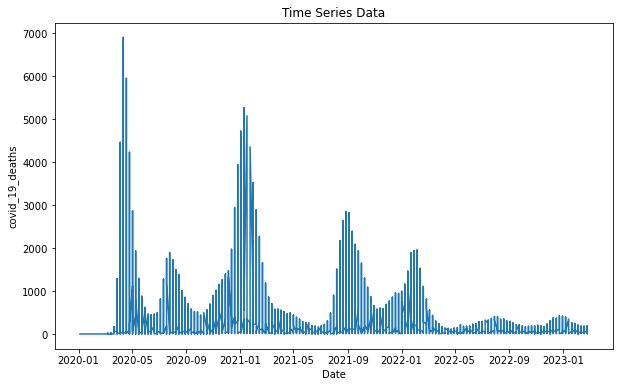

Mean: 152.28811935395566
Variance: 96433.29890605855
ADF Test p-value: 0.0014460960716783033


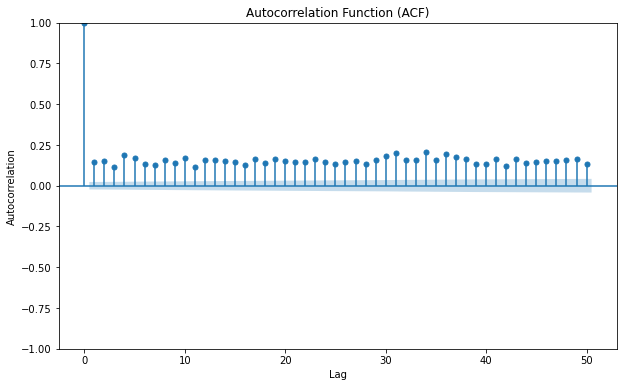

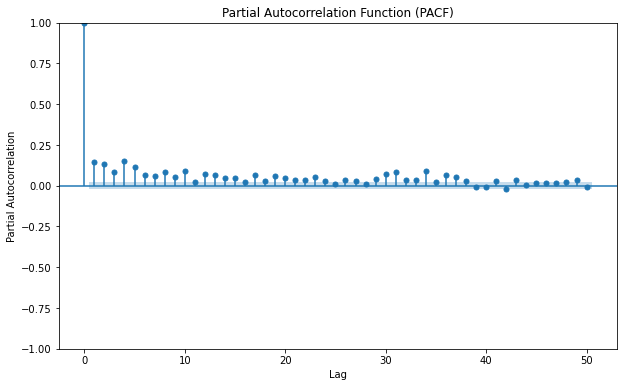

In [323]:
ts = data['covid_19_deaths']

# 1. Visual Inspection
plt.figure(figsize=(10, 6))
plt.plot(ts)
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('covid_19_deaths')
plt.show()

# 2. Summary Statistics
print("Mean:", ts.mean())
print("Variance:", ts.var())

# 3. Augmented Dickey-Fuller (ADF) Test
adf_result = adfuller(ts)
print("ADF Test p-value:", adf_result[1])

# 5. Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)
plt.figure(figsize=(10, 6))
plot_acf(ts, lags=50, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

plt.figure(figsize=(10, 6))
plot_pacf(ts, lags=50, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [324]:
# Compute correlation between features and target
correlation_matrix = data.corr()

# Extract correlations with the target variable
correlation_with_target = correlation_matrix['covid_19_deaths']

# Print out the correlations
print(correlation_with_target)

year                  -0.077633
mmwr_week              0.021036
covid_19_deaths        1.000000
distributed            0.132591
distributed_janssen    0.158470
                         ...   
holidays_Normal_day    0.026625
month_sin              0.011471
month_cos              0.123950
dayofweek_sin               NaN
dayofweek_cos               NaN
Name: covid_19_deaths, Length: 143, dtype: float64


# XGBoost 

In [325]:
def MASE(Actual, Predicted):
    n = len(Actual)
    
    mae = mean_absolute_error(Actual, Predicted)

    # Calculate the denominator
    denominator = (1 / (n - 1)) * np.sum(np.abs(Predicted[1:] - Actual[:-1]))

    # Avoid division by zero or small denominators
    if denominator > 1e-6:
        mase = mae / denominator
    else:
        mase = np.inf

    return mase

In [326]:
# One-hot encode categorical columns
X_encoded = pd.get_dummies(data.drop(['covid_19_deaths'], axis=1))

X_train = train.drop(['covid_19_deaths'], axis = 1)
y_train = train[['covid_19_deaths']]

X_test = test.drop(['covid_19_deaths'], axis = 1)
y_test = test[['covid_19_deaths']]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Scale the features
scaler = StandardScaler()

# Fit and transform the training data
xscaler_train = scaler.fit_transform(X_train)

# Only transform the test data (do not fit again)
xscaler_test = scaler.transform(X_test)

In [327]:
features_and_target3 = data[['dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear', 'deaths_half_year_lag',
 'deaths_1_year_lag',
 'deaths_1_andhalf_year_lag',
 'deaths_2_years_lag',
 'deaths_half_year_lag_mean',
 'deaths_1_year_lag_mean',
 'deaths_1_andhalf_year_lag_mean',
 'deaths_2_years_lag_mean',
 'deaths_half_year_lag_std',
 'deaths_1_year_lag_std',
 'deaths_1_andhalf_year_lag_std',
 'deaths_2_years_lag_std',
 'deaths_half_year_lag_max',
 'deaths_1_year_lag_max',
 'deaths_1_andhalf_year_lag_max',
 'deaths_2_years_lag_max',
 'deaths_half_year_lag_min',
 'deaths_1_year_lag_min',
 'deaths_1_andhalf_year_lag_min',
 'deaths_2_years_lag_min','covid_19_deaths']]


features_and_target3   

,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,deaths_half_year_lag,deaths_1_year_lag,deaths_1_andhalf_year_lag,...,deaths_2_years_lag_std,deaths_half_year_lag_max,deaths_1_year_lag_max,deaths_1_andhalf_year_lag_max,deaths_2_years_lag_max,deaths_half_year_lag_min,deaths_1_year_lag_min,deaths_1_andhalf_year_lag_min,deaths_2_years_lag_min,covid_19_deaths
date,,,,,,,,,,,,,,,,,,,,,
2020-01-04,5,1,1,2020,4,4,1,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-04,5,1,1,2020,4,4,1,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-04,5,1,1,2020,4,4,1,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-04,5,1,1,2020,4,4,1,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-04,5,1,1,2020,4,4,1,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-25,5,1,2,2023,56,25,8,20.0,108.0,96.0,...,79.121166,65.0,82.0,293.0,293.0,20.0,16.0,16.0,16.0,22.0
2023-02-25,5,1,2,2023,56,25,8,91.0,238.0,107.0,...,204.130762,138.0,157.0,857.0,857.0,69.0,52.0,52.0,19.0,69.0
2023-02-25,5,1,2,2023,56,25,8,55.0,106.0,69.0,...,83.571897,86.0,86.0,481.0,481.0,34.0,20.0,20.0,15.0,45.0


In [328]:
reg = xgb.XGBRegressor(learning_rate=0.3,n_estimators=1000, early_stopping_rounds=10)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)], 
       verbose=True) 

[0]	validation_0-rmse:273.25726	validation_1-rmse:210.37288
[1]	validation_0-rmse:237.49049	validation_1-rmse:181.75559
[2]	validation_0-rmse:214.40239	validation_1-rmse:161.17252
[3]	validation_0-rmse:200.44529	validation_1-rmse:150.42094
[4]	validation_0-rmse:189.28786	validation_1-rmse:142.17676
[5]	validation_0-rmse:182.58497	validation_1-rmse:137.01187
[6]	validation_0-rmse:177.39209	validation_1-rmse:133.54213
[7]	validation_0-rmse:174.72676	validation_1-rmse:132.46325
[8]	validation_0-rmse:172.93750	validation_1-rmse:130.28302
[9]	validation_0-rmse:171.44955	validation_1-rmse:128.65506
[10]	validation_0-rmse:170.29157	validation_1-rmse:127.69556
[11]	validation_0-rmse:169.00246	validation_1-rmse:126.23844
[12]	validation_0-rmse:168.32027	validation_1-rmse:125.11959
[13]	validation_0-rmse:167.80171	validation_1-rmse:124.36762
[14]	validation_0-rmse:167.01639	validation_1-rmse:123.41315
[15]	validation_0-rmse:166.48754	validation_1-rmse:122.77381
[16]	validation_0-rmse:165.83824	v

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

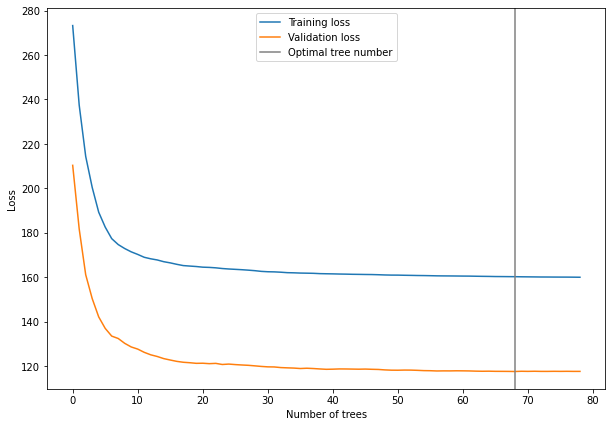

In [329]:
results = reg.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["rmse"], label="Training loss")
plt.plot(results["validation_1"]["rmse"], label="Validation loss")
plt.axvline(reg.best_iteration, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

In [330]:
reg.best_iteration

68

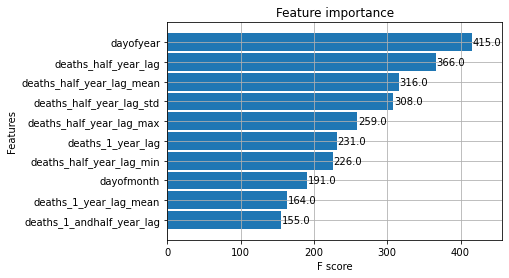

In [331]:
_ = plot_importance(reg, height=0.9 ,max_num_features = 10)

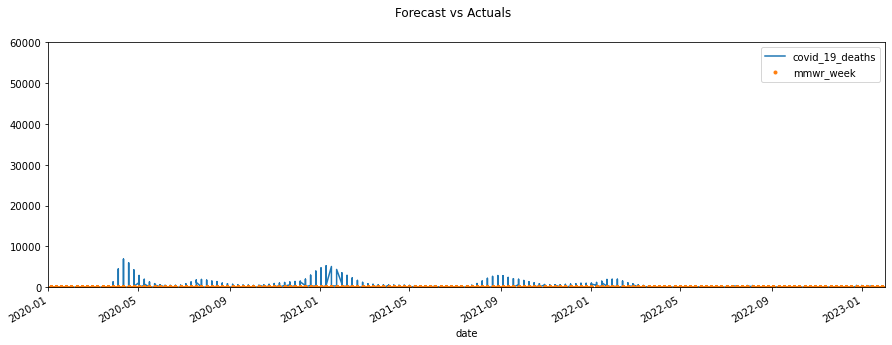

In [332]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = data[['covid_19_deaths','mmwr_week']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower='01-01-2020', upper='02-01-2023')
ax.set_ylim(0, 60000)
plot = plt.suptitle('Forecast vs Actuals')

In [333]:
# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 350, 500, 1000],
}

reg = XGBRegressor(early_stopping_rounds = 10)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=reg, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train, 
               eval_set=[(X_train, y_train), (X_test, y_test)], 
       verbose=True)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

[0]	validation_0-rmse:321.33148	validation_1-rmse:252.79730
[1]	validation_0-rmse:319.61477	validation_1-rmse:251.28285
[2]	validation_0-rmse:317.92009	validation_1-rmse:249.78839
[3]	validation_0-rmse:316.24528	validation_1-rmse:248.28277
[4]	validation_0-rmse:314.59376	validation_1-rmse:246.82015
[5]	validation_0-rmse:312.96065	validation_1-rmse:245.35670
[6]	validation_0-rmse:311.35037	validation_1-rmse:243.93603
[7]	validation_0-rmse:309.75220	validation_1-rmse:242.51360
[8]	validation_0-rmse:308.18278	validation_1-rmse:241.11026
[9]	validation_0-rmse:306.47987	validation_1-rmse:239.64853
[10]	validation_0-rmse:304.94780	validation_1-rmse:238.31579
[11]	validation_0-rmse:303.28183	validation_1-rmse:236.90427
[12]	validation_0-rmse:301.77902	validation_1-rmse:235.58116
[13]	validation_0-rmse:300.16639	validation_1-rmse:234.08877
[14]	validation_0-rmse:298.70832	validation_1-rmse:232.83298
[15]	validation_0-rmse:297.11679	validation_1-rmse:231.47485
[16]	validation_0-rmse:295.69260	v

[35]	validation_0-rmse:271.46083	validation_1-rmse:206.39968
[36]	validation_0-rmse:270.24221	validation_1-rmse:205.40972
[37]	validation_0-rmse:269.17230	validation_1-rmse:204.36545
[38]	validation_0-rmse:267.98907	validation_1-rmse:203.42785
[39]	validation_0-rmse:266.93323	validation_1-rmse:202.38242
[40]	validation_0-rmse:265.77150	validation_1-rmse:201.46302
[41]	validation_0-rmse:264.73830	validation_1-rmse:200.48763
[42]	validation_0-rmse:263.63405	validation_1-rmse:199.60032
[43]	validation_0-rmse:262.60851	validation_1-rmse:198.60913
[44]	validation_0-rmse:261.51706	validation_1-rmse:197.73142
[45]	validation_0-rmse:260.52564	validation_1-rmse:196.82813
[46]	validation_0-rmse:259.47869	validation_1-rmse:196.01443
[47]	validation_0-rmse:258.38701	validation_1-rmse:195.12459
[48]	validation_0-rmse:257.31814	validation_1-rmse:194.24947
[49]	validation_0-rmse:256.35230	validation_1-rmse:193.34300
[50]	validation_0-rmse:255.30432	validation_1-rmse:192.48011
[51]	validation_0-rmse:2

[70]	validation_0-rmse:239.62839	validation_1-rmse:177.29980
[71]	validation_0-rmse:238.82365	validation_1-rmse:176.66114
[72]	validation_0-rmse:238.13256	validation_1-rmse:176.06811
[73]	validation_0-rmse:237.38633	validation_1-rmse:175.44281
[74]	validation_0-rmse:236.62946	validation_1-rmse:174.79723
[75]	validation_0-rmse:235.95879	validation_1-rmse:174.22595
[76]	validation_0-rmse:235.22325	validation_1-rmse:173.64954
[77]	validation_0-rmse:234.50919	validation_1-rmse:173.05096
[78]	validation_0-rmse:233.87428	validation_1-rmse:172.48401
[79]	validation_0-rmse:233.14624	validation_1-rmse:171.90655
[80]	validation_0-rmse:232.36047	validation_1-rmse:171.32650
[81]	validation_0-rmse:231.58459	validation_1-rmse:170.75837
[82]	validation_0-rmse:230.81560	validation_1-rmse:170.19655
[83]	validation_0-rmse:230.09748	validation_1-rmse:169.66574
[84]	validation_0-rmse:229.35789	validation_1-rmse:169.12976
[85]	validation_0-rmse:228.72933	validation_1-rmse:168.57777
[86]	validation_0-rmse:2

[5]	validation_0-rmse:313.14316	validation_1-rmse:245.35380
[6]	validation_0-rmse:311.55715	validation_1-rmse:243.93817
[7]	validation_0-rmse:309.88643	validation_1-rmse:242.51787
[8]	validation_0-rmse:308.34588	validation_1-rmse:241.14181
[9]	validation_0-rmse:306.71453	validation_1-rmse:239.75388
[10]	validation_0-rmse:305.10103	validation_1-rmse:238.36682
[11]	validation_0-rmse:303.60579	validation_1-rmse:237.02585
[12]	validation_0-rmse:302.02793	validation_1-rmse:235.67205
[13]	validation_0-rmse:300.47212	validation_1-rmse:234.33633
[14]	validation_0-rmse:299.02520	validation_1-rmse:233.06066
[15]	validation_0-rmse:297.49422	validation_1-rmse:231.76633
[16]	validation_0-rmse:295.97602	validation_1-rmse:230.48636
[17]	validation_0-rmse:294.58802	validation_1-rmse:229.26538
[18]	validation_0-rmse:293.10509	validation_1-rmse:228.00120
[19]	validation_0-rmse:291.74618	validation_1-rmse:226.81301
[20]	validation_0-rmse:290.29734	validation_1-rmse:225.60497
[21]	validation_0-rmse:288.96

[40]	validation_0-rmse:264.32727	validation_1-rmse:202.40744
[41]	validation_0-rmse:263.28954	validation_1-rmse:201.41425
[42]	validation_0-rmse:262.15985	validation_1-rmse:200.43075
[43]	validation_0-rmse:261.04933	validation_1-rmse:199.50159
[44]	validation_0-rmse:259.99848	validation_1-rmse:198.49942
[45]	validation_0-rmse:258.91281	validation_1-rmse:197.57222
[46]	validation_0-rmse:257.78694	validation_1-rmse:196.55225
[47]	validation_0-rmse:256.75981	validation_1-rmse:195.60477
[48]	validation_0-rmse:255.74174	validation_1-rmse:194.66529
[49]	validation_0-rmse:254.73333	validation_1-rmse:193.74660
[50]	validation_0-rmse:253.73768	validation_1-rmse:192.83664
[51]	validation_0-rmse:252.72996	validation_1-rmse:192.00576
[52]	validation_0-rmse:251.76554	validation_1-rmse:191.12686
[53]	validation_0-rmse:250.80798	validation_1-rmse:190.25016
[54]	validation_0-rmse:249.86663	validation_1-rmse:189.39473
[55]	validation_0-rmse:248.93242	validation_1-rmse:188.54441
[56]	validation_0-rmse:2

[174]	validation_0-rmse:190.05414	validation_1-rmse:143.38414
[175]	validation_0-rmse:189.85418	validation_1-rmse:143.17321
[176]	validation_0-rmse:189.63295	validation_1-rmse:143.02968
[177]	validation_0-rmse:189.40783	validation_1-rmse:142.82106
[178]	validation_0-rmse:189.19632	validation_1-rmse:142.69016
[179]	validation_0-rmse:188.98887	validation_1-rmse:142.56279
[180]	validation_0-rmse:188.79039	validation_1-rmse:142.42666
[181]	validation_0-rmse:188.58688	validation_1-rmse:142.30240
[182]	validation_0-rmse:188.37536	validation_1-rmse:142.09000
[183]	validation_0-rmse:188.17726	validation_1-rmse:141.96308
[184]	validation_0-rmse:187.98331	validation_1-rmse:141.83479
[185]	validation_0-rmse:187.77711	validation_1-rmse:141.64503
[186]	validation_0-rmse:187.60561	validation_1-rmse:141.47525
[187]	validation_0-rmse:187.40890	validation_1-rmse:141.30234
[188]	validation_0-rmse:187.24299	validation_1-rmse:141.13777
[189]	validation_0-rmse:187.06159	validation_1-rmse:141.01544
[190]	va

[108]	validation_0-rmse:214.42145	validation_1-rmse:157.50722
[109]	validation_0-rmse:213.92373	validation_1-rmse:157.09335
[110]	validation_0-rmse:213.45361	validation_1-rmse:156.69254
[111]	validation_0-rmse:212.96842	validation_1-rmse:156.32995
[112]	validation_0-rmse:212.50999	validation_1-rmse:156.00447
[113]	validation_0-rmse:212.05003	validation_1-rmse:155.60464
[114]	validation_0-rmse:211.58669	validation_1-rmse:155.27983
[115]	validation_0-rmse:211.11589	validation_1-rmse:154.89494
[116]	validation_0-rmse:210.63171	validation_1-rmse:154.51167
[117]	validation_0-rmse:210.20776	validation_1-rmse:154.12329
[118]	validation_0-rmse:209.73731	validation_1-rmse:153.75366
[119]	validation_0-rmse:209.31844	validation_1-rmse:153.37000
[120]	validation_0-rmse:208.88084	validation_1-rmse:153.07453
[121]	validation_0-rmse:208.43394	validation_1-rmse:152.71862
[122]	validation_0-rmse:208.04425	validation_1-rmse:152.37913
[123]	validation_0-rmse:207.62985	validation_1-rmse:152.04310
[124]	va

[41]	validation_0-rmse:266.13538	validation_1-rmse:200.99642
[42]	validation_0-rmse:265.01697	validation_1-rmse:200.05319
[43]	validation_0-rmse:264.02365	validation_1-rmse:199.10651
[44]	validation_0-rmse:262.92735	validation_1-rmse:198.09964
[45]	validation_0-rmse:261.88598	validation_1-rmse:197.08748
[46]	validation_0-rmse:260.83846	validation_1-rmse:196.21802
[47]	validation_0-rmse:259.89883	validation_1-rmse:195.31731
[48]	validation_0-rmse:258.84749	validation_1-rmse:194.38164
[49]	validation_0-rmse:257.81516	validation_1-rmse:193.48986
[50]	validation_0-rmse:256.90404	validation_1-rmse:192.66160
[51]	validation_0-rmse:255.90733	validation_1-rmse:191.75847
[52]	validation_0-rmse:254.91643	validation_1-rmse:190.92133
[53]	validation_0-rmse:254.00853	validation_1-rmse:190.06358
[54]	validation_0-rmse:253.05315	validation_1-rmse:189.20366
[55]	validation_0-rmse:252.18648	validation_1-rmse:188.37823
[56]	validation_0-rmse:251.26041	validation_1-rmse:187.51758
[57]	validation_0-rmse:2

[175]	validation_0-rmse:191.32307	validation_1-rmse:141.29148
[176]	validation_0-rmse:191.11413	validation_1-rmse:141.14181
[177]	validation_0-rmse:190.88288	validation_1-rmse:140.97375
[178]	validation_0-rmse:190.67947	validation_1-rmse:140.80920
[179]	validation_0-rmse:190.47488	validation_1-rmse:140.67958
[180]	validation_0-rmse:190.24860	validation_1-rmse:140.50851
[181]	validation_0-rmse:190.05336	validation_1-rmse:140.35734
[182]	validation_0-rmse:189.84760	validation_1-rmse:140.20895
[183]	validation_0-rmse:189.66626	validation_1-rmse:140.06565
[184]	validation_0-rmse:189.46838	validation_1-rmse:139.95615
[185]	validation_0-rmse:189.28478	validation_1-rmse:139.81180
[186]	validation_0-rmse:189.09140	validation_1-rmse:139.70823
[187]	validation_0-rmse:188.91201	validation_1-rmse:139.55030
[188]	validation_0-rmse:188.70576	validation_1-rmse:139.39730
[189]	validation_0-rmse:188.51957	validation_1-rmse:139.29669
[190]	validation_0-rmse:188.32843	validation_1-rmse:139.13948
[191]	va

[109]	validation_0-rmse:213.23237	validation_1-rmse:156.16740
[110]	validation_0-rmse:212.74765	validation_1-rmse:155.78296
[111]	validation_0-rmse:212.26956	validation_1-rmse:155.33990
[112]	validation_0-rmse:211.84387	validation_1-rmse:155.01155
[113]	validation_0-rmse:211.40388	validation_1-rmse:154.59270
[114]	validation_0-rmse:210.94558	validation_1-rmse:154.23661
[115]	validation_0-rmse:210.49188	validation_1-rmse:153.83651
[116]	validation_0-rmse:210.06533	validation_1-rmse:153.45044
[117]	validation_0-rmse:209.63650	validation_1-rmse:153.12854
[118]	validation_0-rmse:209.20347	validation_1-rmse:152.74004
[119]	validation_0-rmse:208.79502	validation_1-rmse:152.40907
[120]	validation_0-rmse:208.39331	validation_1-rmse:152.03762
[121]	validation_0-rmse:207.97111	validation_1-rmse:151.67962
[122]	validation_0-rmse:207.56506	validation_1-rmse:151.36145
[123]	validation_0-rmse:207.15760	validation_1-rmse:151.00809
[124]	validation_0-rmse:206.77021	validation_1-rmse:150.66281
[125]	va

[42]	validation_0-rmse:263.58571	validation_1-rmse:202.46794
[43]	validation_0-rmse:262.56434	validation_1-rmse:201.54867
[44]	validation_0-rmse:261.56064	validation_1-rmse:200.69632
[45]	validation_0-rmse:260.47055	validation_1-rmse:199.83567
[46]	validation_0-rmse:259.49135	validation_1-rmse:198.96515
[47]	validation_0-rmse:258.52609	validation_1-rmse:198.17040
[48]	validation_0-rmse:257.47930	validation_1-rmse:197.34189
[49]	validation_0-rmse:256.53520	validation_1-rmse:196.54198
[50]	validation_0-rmse:255.60403	validation_1-rmse:195.72764
[51]	validation_0-rmse:254.59357	validation_1-rmse:194.95645
[52]	validation_0-rmse:253.68267	validation_1-rmse:194.19032
[53]	validation_0-rmse:252.70003	validation_1-rmse:193.41546
[54]	validation_0-rmse:251.81764	validation_1-rmse:192.62485
[55]	validation_0-rmse:250.93992	validation_1-rmse:191.83407
[56]	validation_0-rmse:250.07483	validation_1-rmse:191.05689
[57]	validation_0-rmse:249.17144	validation_1-rmse:190.26748
[58]	validation_0-rmse:2

[176]	validation_0-rmse:191.84966	validation_1-rmse:144.71002
[177]	validation_0-rmse:191.60474	validation_1-rmse:144.57825
[178]	validation_0-rmse:191.39891	validation_1-rmse:144.40559
[179]	validation_0-rmse:191.18362	validation_1-rmse:144.21771
[180]	validation_0-rmse:190.97056	validation_1-rmse:144.02894
[181]	validation_0-rmse:190.75782	validation_1-rmse:143.83676
[182]	validation_0-rmse:190.55235	validation_1-rmse:143.70254
[183]	validation_0-rmse:190.33017	validation_1-rmse:143.56682
[184]	validation_0-rmse:190.12854	validation_1-rmse:143.39280
[185]	validation_0-rmse:189.89216	validation_1-rmse:143.20307
[186]	validation_0-rmse:189.68374	validation_1-rmse:143.06837
[187]	validation_0-rmse:189.50028	validation_1-rmse:142.96530
[188]	validation_0-rmse:189.32300	validation_1-rmse:142.85875
[189]	validation_0-rmse:189.11017	validation_1-rmse:142.73716
[190]	validation_0-rmse:188.92054	validation_1-rmse:142.56216
[191]	validation_0-rmse:188.71114	validation_1-rmse:142.44327
[192]	va

[110]	validation_0-rmse:211.48561	validation_1-rmse:157.27744
[111]	validation_0-rmse:211.00460	validation_1-rmse:156.98635
[112]	validation_0-rmse:210.50976	validation_1-rmse:156.59552
[113]	validation_0-rmse:210.04284	validation_1-rmse:156.29515
[114]	validation_0-rmse:209.57517	validation_1-rmse:156.01008
[115]	validation_0-rmse:209.13461	validation_1-rmse:155.66126
[116]	validation_0-rmse:208.64848	validation_1-rmse:155.34977
[117]	validation_0-rmse:208.19517	validation_1-rmse:155.07754
[118]	validation_0-rmse:207.76346	validation_1-rmse:154.77518
[119]	validation_0-rmse:207.32920	validation_1-rmse:154.53054
[120]	validation_0-rmse:206.90462	validation_1-rmse:154.23319
[121]	validation_0-rmse:206.50400	validation_1-rmse:153.90657
[122]	validation_0-rmse:206.08653	validation_1-rmse:153.66998
[123]	validation_0-rmse:205.62870	validation_1-rmse:153.39263
[124]	validation_0-rmse:205.22998	validation_1-rmse:153.13323
[125]	validation_0-rmse:204.79047	validation_1-rmse:152.86779
[126]	va

[243]	validation_0-rmse:179.66677	validation_1-rmse:135.20946
[244]	validation_0-rmse:179.58254	validation_1-rmse:135.15655
[245]	validation_0-rmse:179.50493	validation_1-rmse:135.06519
[246]	validation_0-rmse:179.37035	validation_1-rmse:134.97331
[247]	validation_0-rmse:179.28421	validation_1-rmse:134.88397
[248]	validation_0-rmse:179.20799	validation_1-rmse:134.79489
[249]	validation_0-rmse:179.10432	validation_1-rmse:134.70737
[250]	validation_0-rmse:178.96244	validation_1-rmse:134.57813
[251]	validation_0-rmse:178.88379	validation_1-rmse:134.51612
[252]	validation_0-rmse:178.75504	validation_1-rmse:134.42655
[253]	validation_0-rmse:178.66232	validation_1-rmse:134.35208
[254]	validation_0-rmse:178.58272	validation_1-rmse:134.30518
[255]	validation_0-rmse:178.49389	validation_1-rmse:134.25211
[256]	validation_0-rmse:178.41986	validation_1-rmse:134.19347
[257]	validation_0-rmse:178.32786	validation_1-rmse:134.10557
[258]	validation_0-rmse:178.25943	validation_1-rmse:134.03042
[259]	va

[26]	validation_0-rmse:282.62036	validation_1-rmse:216.45372
[27]	validation_0-rmse:281.28109	validation_1-rmse:215.28049
[28]	validation_0-rmse:279.94697	validation_1-rmse:214.20158
[29]	validation_0-rmse:278.75355	validation_1-rmse:213.04256
[30]	validation_0-rmse:277.45629	validation_1-rmse:211.88330
[31]	validation_0-rmse:276.32003	validation_1-rmse:210.78488
[32]	validation_0-rmse:275.05286	validation_1-rmse:209.67371
[33]	validation_0-rmse:273.80096	validation_1-rmse:208.56740
[34]	validation_0-rmse:272.68090	validation_1-rmse:207.46731
[35]	validation_0-rmse:271.46083	validation_1-rmse:206.39968
[36]	validation_0-rmse:270.24221	validation_1-rmse:205.40972
[37]	validation_0-rmse:269.17230	validation_1-rmse:204.36545
[38]	validation_0-rmse:267.98907	validation_1-rmse:203.42785
[39]	validation_0-rmse:266.93323	validation_1-rmse:202.38242
[40]	validation_0-rmse:265.77150	validation_1-rmse:201.46302
[41]	validation_0-rmse:264.73830	validation_1-rmse:200.48763
[42]	validation_0-rmse:2

[160]	validation_0-rmse:195.23572	validation_1-rmse:142.87858
[161]	validation_0-rmse:194.95865	validation_1-rmse:142.69823
[162]	validation_0-rmse:194.70051	validation_1-rmse:142.53113
[163]	validation_0-rmse:194.45574	validation_1-rmse:142.36521
[164]	validation_0-rmse:194.20454	validation_1-rmse:142.20348
[165]	validation_0-rmse:193.96805	validation_1-rmse:142.04948
[166]	validation_0-rmse:193.71859	validation_1-rmse:141.90364
[167]	validation_0-rmse:193.46046	validation_1-rmse:141.71159
[168]	validation_0-rmse:193.18939	validation_1-rmse:141.51964
[169]	validation_0-rmse:192.91556	validation_1-rmse:141.34114
[170]	validation_0-rmse:192.68323	validation_1-rmse:141.19310
[171]	validation_0-rmse:192.41661	validation_1-rmse:141.01910
[172]	validation_0-rmse:192.19087	validation_1-rmse:140.88381
[173]	validation_0-rmse:191.96493	validation_1-rmse:140.73766
[174]	validation_0-rmse:191.75219	validation_1-rmse:140.59944
[175]	validation_0-rmse:191.53566	validation_1-rmse:140.47152
[176]	va

[293]	validation_0-rmse:177.18519	validation_1-rmse:129.43440
[294]	validation_0-rmse:177.13413	validation_1-rmse:129.39566
[295]	validation_0-rmse:177.08126	validation_1-rmse:129.35091
[296]	validation_0-rmse:177.02852	validation_1-rmse:129.31471
[297]	validation_0-rmse:176.97697	validation_1-rmse:129.27092
[298]	validation_0-rmse:176.92754	validation_1-rmse:129.24691
[299]	validation_0-rmse:176.87967	validation_1-rmse:129.20347
[300]	validation_0-rmse:176.82795	validation_1-rmse:129.15663
[301]	validation_0-rmse:176.78153	validation_1-rmse:129.14061
[302]	validation_0-rmse:176.73132	validation_1-rmse:129.09137
[303]	validation_0-rmse:176.66478	validation_1-rmse:129.01625
[304]	validation_0-rmse:176.61698	validation_1-rmse:128.98787
[305]	validation_0-rmse:176.56992	validation_1-rmse:128.96002
[306]	validation_0-rmse:176.52356	validation_1-rmse:128.92145
[307]	validation_0-rmse:176.47403	validation_1-rmse:128.89365
[308]	validation_0-rmse:176.43330	validation_1-rmse:128.86212
[309]	va

[77]	validation_0-rmse:234.50919	validation_1-rmse:173.05096
[78]	validation_0-rmse:233.87428	validation_1-rmse:172.48401
[79]	validation_0-rmse:233.14624	validation_1-rmse:171.90655
[80]	validation_0-rmse:232.36047	validation_1-rmse:171.32650
[81]	validation_0-rmse:231.58459	validation_1-rmse:170.75837
[82]	validation_0-rmse:230.81560	validation_1-rmse:170.19655
[83]	validation_0-rmse:230.09748	validation_1-rmse:169.66574
[84]	validation_0-rmse:229.35789	validation_1-rmse:169.12976
[85]	validation_0-rmse:228.72933	validation_1-rmse:168.57777
[86]	validation_0-rmse:228.10815	validation_1-rmse:168.06613
[87]	validation_0-rmse:227.50147	validation_1-rmse:167.54949
[88]	validation_0-rmse:226.90427	validation_1-rmse:167.03286
[89]	validation_0-rmse:226.24441	validation_1-rmse:166.53802
[90]	validation_0-rmse:225.60127	validation_1-rmse:166.07204
[91]	validation_0-rmse:224.97107	validation_1-rmse:165.56655
[92]	validation_0-rmse:224.35107	validation_1-rmse:165.10533
[93]	validation_0-rmse:2

[210]	validation_0-rmse:184.32845	validation_1-rmse:135.72617
[211]	validation_0-rmse:184.16837	validation_1-rmse:135.58844
[212]	validation_0-rmse:184.01166	validation_1-rmse:135.45499
[213]	validation_0-rmse:183.83339	validation_1-rmse:135.30873
[214]	validation_0-rmse:183.67560	validation_1-rmse:135.15470
[215]	validation_0-rmse:183.50821	validation_1-rmse:135.02926
[216]	validation_0-rmse:183.36133	validation_1-rmse:134.90032
[217]	validation_0-rmse:183.21763	validation_1-rmse:134.77443
[218]	validation_0-rmse:183.08490	validation_1-rmse:134.64769
[219]	validation_0-rmse:182.94459	validation_1-rmse:134.52634
[220]	validation_0-rmse:182.78446	validation_1-rmse:134.39749
[221]	validation_0-rmse:182.64841	validation_1-rmse:134.27477
[222]	validation_0-rmse:182.51904	validation_1-rmse:134.13469
[223]	validation_0-rmse:182.38541	validation_1-rmse:134.01897
[224]	validation_0-rmse:182.26110	validation_1-rmse:133.88701
[225]	validation_0-rmse:182.13265	validation_1-rmse:133.77787
[226]	va

[343]	validation_0-rmse:172.68109	validation_1-rmse:125.54184
[344]	validation_0-rmse:172.64011	validation_1-rmse:125.49870
[345]	validation_0-rmse:172.60654	validation_1-rmse:125.45859
[346]	validation_0-rmse:172.54805	validation_1-rmse:125.41397
[347]	validation_0-rmse:172.51653	validation_1-rmse:125.38873
[348]	validation_0-rmse:172.47840	validation_1-rmse:125.34592
[349]	validation_0-rmse:172.43445	validation_1-rmse:125.32041
[0]	validation_0-rmse:321.30662	validation_1-rmse:252.72998
[1]	validation_0-rmse:319.56522	validation_1-rmse:251.13515
[2]	validation_0-rmse:317.85354	validation_1-rmse:249.54631
[3]	validation_0-rmse:316.14287	validation_1-rmse:247.99002
[4]	validation_0-rmse:314.47676	validation_1-rmse:246.44239
[5]	validation_0-rmse:312.83291	validation_1-rmse:244.91555
[6]	validation_0-rmse:311.12112	validation_1-rmse:243.35085
[7]	validation_0-rmse:309.49308	validation_1-rmse:241.87006
[8]	validation_0-rmse:307.82494	validation_1-rmse:240.33789
[9]	validation_0-rmse:306.

[127]	validation_0-rmse:205.59723	validation_1-rmse:149.70418
[128]	validation_0-rmse:205.18224	validation_1-rmse:149.41185
[129]	validation_0-rmse:204.82655	validation_1-rmse:149.07964
[130]	validation_0-rmse:204.44580	validation_1-rmse:148.73674
[131]	validation_0-rmse:204.09790	validation_1-rmse:148.41675
[132]	validation_0-rmse:203.69421	validation_1-rmse:148.13017
[133]	validation_0-rmse:203.29352	validation_1-rmse:147.84512
[134]	validation_0-rmse:202.95709	validation_1-rmse:147.53026
[135]	validation_0-rmse:202.59779	validation_1-rmse:147.20664
[136]	validation_0-rmse:202.27772	validation_1-rmse:146.96722
[137]	validation_0-rmse:201.89504	validation_1-rmse:146.70703
[138]	validation_0-rmse:201.51866	validation_1-rmse:146.44250
[139]	validation_0-rmse:201.14697	validation_1-rmse:146.18867
[140]	validation_0-rmse:200.84458	validation_1-rmse:145.96539
[141]	validation_0-rmse:200.48210	validation_1-rmse:145.71839
[142]	validation_0-rmse:200.18198	validation_1-rmse:145.43432
[143]	va

[260]	validation_0-rmse:178.27323	validation_1-rmse:128.46119
[261]	validation_0-rmse:178.18288	validation_1-rmse:128.42098
[262]	validation_0-rmse:178.09390	validation_1-rmse:128.38036
[263]	validation_0-rmse:178.00640	validation_1-rmse:128.34161
[264]	validation_0-rmse:177.92902	validation_1-rmse:128.27625
[265]	validation_0-rmse:177.84359	validation_1-rmse:128.23867
[266]	validation_0-rmse:177.76968	validation_1-rmse:128.17199
[267]	validation_0-rmse:177.70011	validation_1-rmse:128.12544
[268]	validation_0-rmse:177.63169	validation_1-rmse:128.08017
[269]	validation_0-rmse:177.54971	validation_1-rmse:128.04158
[270]	validation_0-rmse:177.48304	validation_1-rmse:127.99682
[271]	validation_0-rmse:177.41747	validation_1-rmse:127.95720
[272]	validation_0-rmse:177.33788	validation_1-rmse:127.91914
[273]	validation_0-rmse:177.27572	validation_1-rmse:127.88113
[274]	validation_0-rmse:177.21333	validation_1-rmse:127.84930
[275]	validation_0-rmse:177.13676	validation_1-rmse:127.81324
[276]	va

[43]	validation_0-rmse:262.56434	validation_1-rmse:201.54867
[44]	validation_0-rmse:261.56064	validation_1-rmse:200.69632
[45]	validation_0-rmse:260.47055	validation_1-rmse:199.83567
[46]	validation_0-rmse:259.49135	validation_1-rmse:198.96515
[47]	validation_0-rmse:258.52609	validation_1-rmse:198.17040
[48]	validation_0-rmse:257.47930	validation_1-rmse:197.34189
[49]	validation_0-rmse:256.53520	validation_1-rmse:196.54198
[50]	validation_0-rmse:255.60403	validation_1-rmse:195.72764
[51]	validation_0-rmse:254.59357	validation_1-rmse:194.95645
[52]	validation_0-rmse:253.68267	validation_1-rmse:194.19032
[53]	validation_0-rmse:252.70003	validation_1-rmse:193.41546
[54]	validation_0-rmse:251.81764	validation_1-rmse:192.62485
[55]	validation_0-rmse:250.93992	validation_1-rmse:191.83407
[56]	validation_0-rmse:250.07483	validation_1-rmse:191.05689
[57]	validation_0-rmse:249.17144	validation_1-rmse:190.26748
[58]	validation_0-rmse:248.26971	validation_1-rmse:189.52115
[59]	validation_0-rmse:2

[177]	validation_0-rmse:191.60474	validation_1-rmse:144.57825
[178]	validation_0-rmse:191.39891	validation_1-rmse:144.40559
[179]	validation_0-rmse:191.18362	validation_1-rmse:144.21771
[180]	validation_0-rmse:190.97056	validation_1-rmse:144.02894
[181]	validation_0-rmse:190.75782	validation_1-rmse:143.83676
[182]	validation_0-rmse:190.55235	validation_1-rmse:143.70254
[183]	validation_0-rmse:190.33017	validation_1-rmse:143.56682
[184]	validation_0-rmse:190.12854	validation_1-rmse:143.39280
[185]	validation_0-rmse:189.89216	validation_1-rmse:143.20307
[186]	validation_0-rmse:189.68374	validation_1-rmse:143.06837
[187]	validation_0-rmse:189.50028	validation_1-rmse:142.96530
[188]	validation_0-rmse:189.32300	validation_1-rmse:142.85875
[189]	validation_0-rmse:189.11017	validation_1-rmse:142.73716
[190]	validation_0-rmse:188.92054	validation_1-rmse:142.56216
[191]	validation_0-rmse:188.71114	validation_1-rmse:142.44327
[192]	validation_0-rmse:188.50863	validation_1-rmse:142.32581
[193]	va

[310]	validation_0-rmse:175.98565	validation_1-rmse:134.05276
[311]	validation_0-rmse:175.93731	validation_1-rmse:134.03987
[312]	validation_0-rmse:175.88873	validation_1-rmse:133.98048
[313]	validation_0-rmse:175.84056	validation_1-rmse:133.94976
[314]	validation_0-rmse:175.78414	validation_1-rmse:133.86715
[315]	validation_0-rmse:175.73860	validation_1-rmse:133.85179
[316]	validation_0-rmse:175.68367	validation_1-rmse:133.77220
[317]	validation_0-rmse:175.63738	validation_1-rmse:133.74281
[318]	validation_0-rmse:175.58345	validation_1-rmse:133.66341
[319]	validation_0-rmse:175.53943	validation_1-rmse:133.64914
[320]	validation_0-rmse:175.48923	validation_1-rmse:133.57363
[321]	validation_0-rmse:175.44469	validation_1-rmse:133.54550
[322]	validation_0-rmse:175.39617	validation_1-rmse:133.47413
[323]	validation_0-rmse:175.35125	validation_1-rmse:133.44268
[324]	validation_0-rmse:175.30102	validation_1-rmse:133.36746
[325]	validation_0-rmse:175.24921	validation_1-rmse:133.33699
[326]	va

[94]	validation_0-rmse:220.20268	validation_1-rmse:163.68084
[95]	validation_0-rmse:219.59921	validation_1-rmse:163.27516
[96]	validation_0-rmse:218.99593	validation_1-rmse:162.80851
[97]	validation_0-rmse:218.42818	validation_1-rmse:162.33586
[98]	validation_0-rmse:217.83416	validation_1-rmse:161.90416
[99]	validation_0-rmse:217.25603	validation_1-rmse:161.44667
[100]	validation_0-rmse:216.69426	validation_1-rmse:161.04141
[101]	validation_0-rmse:216.14812	validation_1-rmse:160.61110
[102]	validation_0-rmse:215.56969	validation_1-rmse:160.17516
[103]	validation_0-rmse:215.04148	validation_1-rmse:159.80929
[104]	validation_0-rmse:214.53054	validation_1-rmse:159.37867
[105]	validation_0-rmse:213.96839	validation_1-rmse:158.97576
[106]	validation_0-rmse:213.45081	validation_1-rmse:158.62492
[107]	validation_0-rmse:212.95172	validation_1-rmse:158.28170
[108]	validation_0-rmse:212.46617	validation_1-rmse:157.93595
[109]	validation_0-rmse:211.97573	validation_1-rmse:157.62341
[110]	validati

[227]	validation_0-rmse:181.49674	validation_1-rmse:136.65171
[228]	validation_0-rmse:181.39944	validation_1-rmse:136.55228
[229]	validation_0-rmse:181.28307	validation_1-rmse:136.48466
[230]	validation_0-rmse:181.17767	validation_1-rmse:136.39683
[231]	validation_0-rmse:181.05137	validation_1-rmse:136.28939
[232]	validation_0-rmse:180.93427	validation_1-rmse:136.19989
[233]	validation_0-rmse:180.83784	validation_1-rmse:136.08508
[234]	validation_0-rmse:180.72951	validation_1-rmse:136.02378
[235]	validation_0-rmse:180.64002	validation_1-rmse:135.92386
[236]	validation_0-rmse:180.54502	validation_1-rmse:135.84619
[237]	validation_0-rmse:180.38985	validation_1-rmse:135.72858
[238]	validation_0-rmse:180.23745	validation_1-rmse:135.61421
[239]	validation_0-rmse:180.14654	validation_1-rmse:135.53986
[240]	validation_0-rmse:180.00333	validation_1-rmse:135.44065
[241]	validation_0-rmse:179.89630	validation_1-rmse:135.38440
[242]	validation_0-rmse:179.80879	validation_1-rmse:135.30934
[243]	va

[360]	validation_0-rmse:172.66231	validation_1-rmse:129.92486
[361]	validation_0-rmse:172.61707	validation_1-rmse:129.91112
[362]	validation_0-rmse:172.58318	validation_1-rmse:129.87939
[363]	validation_0-rmse:172.54038	validation_1-rmse:129.84313
[364]	validation_0-rmse:172.50954	validation_1-rmse:129.79533
[365]	validation_0-rmse:172.46462	validation_1-rmse:129.75114
[366]	validation_0-rmse:172.42167	validation_1-rmse:129.70915
[367]	validation_0-rmse:172.38298	validation_1-rmse:129.67194
[368]	validation_0-rmse:172.34135	validation_1-rmse:129.63141
[369]	validation_0-rmse:172.29906	validation_1-rmse:129.58803
[370]	validation_0-rmse:172.26205	validation_1-rmse:129.55211
[371]	validation_0-rmse:172.23258	validation_1-rmse:129.52294
[372]	validation_0-rmse:172.17991	validation_1-rmse:129.45530
[373]	validation_0-rmse:172.13874	validation_1-rmse:129.43361
[374]	validation_0-rmse:172.11029	validation_1-rmse:129.40548
[375]	validation_0-rmse:172.08342	validation_1-rmse:129.40161
[376]	va

[493]	validation_0-rmse:168.85461	validation_1-rmse:126.64905
[494]	validation_0-rmse:168.82404	validation_1-rmse:126.64228
[495]	validation_0-rmse:168.80966	validation_1-rmse:126.61036
[496]	validation_0-rmse:168.79397	validation_1-rmse:126.59819
[497]	validation_0-rmse:168.76412	validation_1-rmse:126.59201
[498]	validation_0-rmse:168.74728	validation_1-rmse:126.55782
[499]	validation_0-rmse:168.73469	validation_1-rmse:126.53230
[0]	validation_0-rmse:321.33986	validation_1-rmse:252.47778
[1]	validation_0-rmse:319.60422	validation_1-rmse:250.83002
[2]	validation_0-rmse:317.89546	validation_1-rmse:249.21379
[3]	validation_0-rmse:316.20385	validation_1-rmse:247.62448
[4]	validation_0-rmse:314.55282	validation_1-rmse:246.07510
[5]	validation_0-rmse:312.91468	validation_1-rmse:244.53859
[6]	validation_0-rmse:311.28212	validation_1-rmse:243.01986
[7]	validation_0-rmse:309.68878	validation_1-rmse:241.53857
[8]	validation_0-rmse:308.11104	validation_1-rmse:240.06956
[9]	validation_0-rmse:306.

[127]	validation_0-rmse:206.01123	validation_1-rmse:150.78034
[128]	validation_0-rmse:205.61734	validation_1-rmse:150.53080
[129]	validation_0-rmse:205.22518	validation_1-rmse:150.26885
[130]	validation_0-rmse:204.83856	validation_1-rmse:150.02537
[131]	validation_0-rmse:204.46402	validation_1-rmse:149.73625
[132]	validation_0-rmse:204.10588	validation_1-rmse:149.42334
[133]	validation_0-rmse:203.73706	validation_1-rmse:149.18336
[134]	validation_0-rmse:203.35988	validation_1-rmse:148.88005
[135]	validation_0-rmse:202.98800	validation_1-rmse:148.59057
[136]	validation_0-rmse:202.63130	validation_1-rmse:148.36011
[137]	validation_0-rmse:202.26463	validation_1-rmse:148.08225
[138]	validation_0-rmse:201.91133	validation_1-rmse:147.80401
[139]	validation_0-rmse:201.56734	validation_1-rmse:147.58157
[140]	validation_0-rmse:201.22293	validation_1-rmse:147.35821
[141]	validation_0-rmse:200.88788	validation_1-rmse:147.15283
[142]	validation_0-rmse:200.55628	validation_1-rmse:146.93264
[143]	va

[260]	validation_0-rmse:179.46196	validation_1-rmse:131.53676
[261]	validation_0-rmse:179.38252	validation_1-rmse:131.46747
[262]	validation_0-rmse:179.29029	validation_1-rmse:131.40203
[263]	validation_0-rmse:179.21322	validation_1-rmse:131.32880
[264]	validation_0-rmse:179.13244	validation_1-rmse:131.28822
[265]	validation_0-rmse:179.06276	validation_1-rmse:131.22821
[266]	validation_0-rmse:178.98328	validation_1-rmse:131.18417
[267]	validation_0-rmse:178.89283	validation_1-rmse:131.11725
[268]	validation_0-rmse:178.83463	validation_1-rmse:131.05865
[269]	validation_0-rmse:178.75113	validation_1-rmse:130.97974
[270]	validation_0-rmse:178.67600	validation_1-rmse:130.94499
[271]	validation_0-rmse:178.59698	validation_1-rmse:130.86408
[272]	validation_0-rmse:178.53147	validation_1-rmse:130.80204
[273]	validation_0-rmse:178.45952	validation_1-rmse:130.73055
[274]	validation_0-rmse:178.37521	validation_1-rmse:130.63912
[275]	validation_0-rmse:178.30468	validation_1-rmse:130.56373
[276]	va

[393]	validation_0-rmse:173.35878	validation_1-rmse:125.80822
[394]	validation_0-rmse:173.32956	validation_1-rmse:125.80206
[395]	validation_0-rmse:173.30885	validation_1-rmse:125.78444
[396]	validation_0-rmse:173.28045	validation_1-rmse:125.75528
[397]	validation_0-rmse:173.25750	validation_1-rmse:125.73253
[398]	validation_0-rmse:173.23533	validation_1-rmse:125.69431
[399]	validation_0-rmse:173.20734	validation_1-rmse:125.66576
[400]	validation_0-rmse:173.18669	validation_1-rmse:125.64295
[401]	validation_0-rmse:173.16201	validation_1-rmse:125.63513
[402]	validation_0-rmse:173.13831	validation_1-rmse:125.60760
[403]	validation_0-rmse:173.11448	validation_1-rmse:125.58208
[404]	validation_0-rmse:173.09868	validation_1-rmse:125.57658
[405]	validation_0-rmse:173.04491	validation_1-rmse:125.50970
[406]	validation_0-rmse:173.02881	validation_1-rmse:125.48652
[407]	validation_0-rmse:173.00535	validation_1-rmse:125.47861
[408]	validation_0-rmse:172.98910	validation_1-rmse:125.46088
[409]	va

[26]	validation_0-rmse:283.63652	validation_1-rmse:217.32292
[27]	validation_0-rmse:282.40709	validation_1-rmse:216.24202
[28]	validation_0-rmse:281.18148	validation_1-rmse:215.05880
[29]	validation_0-rmse:279.99656	validation_1-rmse:214.00299
[30]	validation_0-rmse:278.82726	validation_1-rmse:212.84417
[31]	validation_0-rmse:277.57425	validation_1-rmse:211.66430
[32]	validation_0-rmse:276.43759	validation_1-rmse:210.55561
[33]	validation_0-rmse:275.25690	validation_1-rmse:209.48817
[34]	validation_0-rmse:274.04198	validation_1-rmse:208.32260
[35]	validation_0-rmse:272.89512	validation_1-rmse:207.18891
[36]	validation_0-rmse:271.68975	validation_1-rmse:206.09081
[37]	validation_0-rmse:270.62534	validation_1-rmse:205.15876
[38]	validation_0-rmse:269.45269	validation_1-rmse:204.07081
[39]	validation_0-rmse:268.29338	validation_1-rmse:202.99662
[40]	validation_0-rmse:267.26603	validation_1-rmse:202.01409
[41]	validation_0-rmse:266.13538	validation_1-rmse:200.99642
[42]	validation_0-rmse:2

[160]	validation_0-rmse:194.97368	validation_1-rmse:143.94947
[161]	validation_0-rmse:194.72640	validation_1-rmse:143.74391
[162]	validation_0-rmse:194.46726	validation_1-rmse:143.58271
[163]	validation_0-rmse:194.20217	validation_1-rmse:143.40824
[164]	validation_0-rmse:193.88202	validation_1-rmse:143.17777
[165]	validation_0-rmse:193.63307	validation_1-rmse:143.03538
[166]	validation_0-rmse:193.40202	validation_1-rmse:142.84274
[167]	validation_0-rmse:193.13413	validation_1-rmse:142.64844
[168]	validation_0-rmse:192.89106	validation_1-rmse:142.49752
[169]	validation_0-rmse:192.63216	validation_1-rmse:142.30636
[170]	validation_0-rmse:192.41543	validation_1-rmse:142.12798
[171]	validation_0-rmse:192.17941	validation_1-rmse:141.93794
[172]	validation_0-rmse:191.95965	validation_1-rmse:141.77645
[173]	validation_0-rmse:191.74146	validation_1-rmse:141.62103
[174]	validation_0-rmse:191.53574	validation_1-rmse:141.44791
[175]	validation_0-rmse:191.32307	validation_1-rmse:141.29148
[176]	va

[293]	validation_0-rmse:175.56514	validation_1-rmse:128.23548
[294]	validation_0-rmse:175.50583	validation_1-rmse:128.19220
[295]	validation_0-rmse:175.41895	validation_1-rmse:128.09273
[296]	validation_0-rmse:175.33368	validation_1-rmse:127.99880
[297]	validation_0-rmse:175.24234	validation_1-rmse:127.91249
[298]	validation_0-rmse:175.17338	validation_1-rmse:127.86123
[299]	validation_0-rmse:175.09822	validation_1-rmse:127.80822
[300]	validation_0-rmse:175.03125	validation_1-rmse:127.75830
[301]	validation_0-rmse:174.97315	validation_1-rmse:127.69469
[302]	validation_0-rmse:174.89399	validation_1-rmse:127.60857
[303]	validation_0-rmse:174.83723	validation_1-rmse:127.54753
[304]	validation_0-rmse:174.76007	validation_1-rmse:127.46286
[305]	validation_0-rmse:174.67483	validation_1-rmse:127.37879
[306]	validation_0-rmse:174.60010	validation_1-rmse:127.29969
[307]	validation_0-rmse:174.53521	validation_1-rmse:127.25688
[308]	validation_0-rmse:174.46711	validation_1-rmse:127.20127
[309]	va

[426]	validation_0-rmse:169.77810	validation_1-rmse:122.36288
[427]	validation_0-rmse:169.75149	validation_1-rmse:122.33250
[428]	validation_0-rmse:169.72530	validation_1-rmse:122.31436
[429]	validation_0-rmse:169.70008	validation_1-rmse:122.29021
[430]	validation_0-rmse:169.67479	validation_1-rmse:122.27204
[431]	validation_0-rmse:169.65024	validation_1-rmse:122.25892
[432]	validation_0-rmse:169.61484	validation_1-rmse:122.22319
[433]	validation_0-rmse:169.58882	validation_1-rmse:122.20404
[434]	validation_0-rmse:169.56617	validation_1-rmse:122.17225
[435]	validation_0-rmse:169.53392	validation_1-rmse:122.14037
[436]	validation_0-rmse:169.50435	validation_1-rmse:122.11049
[437]	validation_0-rmse:169.48276	validation_1-rmse:122.09232
[438]	validation_0-rmse:169.46058	validation_1-rmse:122.06140
[439]	validation_0-rmse:169.42978	validation_1-rmse:122.03380
[440]	validation_0-rmse:169.40799	validation_1-rmse:122.00389
[441]	validation_0-rmse:169.38240	validation_1-rmse:121.97407
[442]	va

[60]	validation_0-rmse:245.65657	validation_1-rmse:183.62611
[61]	validation_0-rmse:244.77396	validation_1-rmse:182.93512
[62]	validation_0-rmse:243.93987	validation_1-rmse:182.12262
[63]	validation_0-rmse:243.09484	validation_1-rmse:181.44879
[64]	validation_0-rmse:242.23661	validation_1-rmse:180.63379
[65]	validation_0-rmse:241.38506	validation_1-rmse:179.83262
[66]	validation_0-rmse:240.48213	validation_1-rmse:179.10407
[67]	validation_0-rmse:239.70101	validation_1-rmse:178.35050
[68]	validation_0-rmse:238.88907	validation_1-rmse:177.70648
[69]	validation_0-rmse:238.07908	validation_1-rmse:176.91949
[70]	validation_0-rmse:237.25921	validation_1-rmse:176.25746
[71]	validation_0-rmse:236.45253	validation_1-rmse:175.60994
[72]	validation_0-rmse:235.68144	validation_1-rmse:174.89234
[73]	validation_0-rmse:234.89108	validation_1-rmse:174.25718
[74]	validation_0-rmse:234.14118	validation_1-rmse:173.53887
[75]	validation_0-rmse:233.41234	validation_1-rmse:172.94409
[76]	validation_0-rmse:2

[193]	validation_0-rmse:186.81807	validation_1-rmse:135.44370
[194]	validation_0-rmse:186.62550	validation_1-rmse:135.27490
[195]	validation_0-rmse:186.45528	validation_1-rmse:135.10960
[196]	validation_0-rmse:186.29420	validation_1-rmse:134.97655
[197]	validation_0-rmse:186.10943	validation_1-rmse:134.80209
[198]	validation_0-rmse:185.93370	validation_1-rmse:134.64482
[199]	validation_0-rmse:185.76697	validation_1-rmse:134.49686
[200]	validation_0-rmse:185.59960	validation_1-rmse:134.33529
[201]	validation_0-rmse:185.44114	validation_1-rmse:134.18935
[202]	validation_0-rmse:185.27506	validation_1-rmse:134.04293
[203]	validation_0-rmse:185.12047	validation_1-rmse:133.90356
[204]	validation_0-rmse:184.95948	validation_1-rmse:133.75243
[205]	validation_0-rmse:184.80636	validation_1-rmse:133.61726
[206]	validation_0-rmse:184.65017	validation_1-rmse:133.46568
[207]	validation_0-rmse:184.49672	validation_1-rmse:133.32215
[208]	validation_0-rmse:184.35228	validation_1-rmse:133.17539
[209]	va

[326]	validation_0-rmse:174.09799	validation_1-rmse:125.16319
[327]	validation_0-rmse:174.05493	validation_1-rmse:125.11846
[328]	validation_0-rmse:174.01252	validation_1-rmse:125.07530
[329]	validation_0-rmse:173.97121	validation_1-rmse:125.04003
[330]	validation_0-rmse:173.92997	validation_1-rmse:124.99914
[331]	validation_0-rmse:173.88999	validation_1-rmse:124.96546
[332]	validation_0-rmse:173.84998	validation_1-rmse:124.92572
[333]	validation_0-rmse:173.80933	validation_1-rmse:124.89543
[334]	validation_0-rmse:173.77046	validation_1-rmse:124.85362
[335]	validation_0-rmse:173.71630	validation_1-rmse:124.81898
[336]	validation_0-rmse:173.66233	validation_1-rmse:124.76080
[337]	validation_0-rmse:173.60884	validation_1-rmse:124.70336
[338]	validation_0-rmse:173.56805	validation_1-rmse:124.65685
[339]	validation_0-rmse:173.52726	validation_1-rmse:124.61721
[340]	validation_0-rmse:173.48765	validation_1-rmse:124.57239
[341]	validation_0-rmse:173.44853	validation_1-rmse:124.53688
[342]	va

[459]	validation_0-rmse:169.58940	validation_1-rmse:120.97603
[460]	validation_0-rmse:169.55090	validation_1-rmse:120.93428
[461]	validation_0-rmse:169.53012	validation_1-rmse:120.91511
[462]	validation_0-rmse:169.49246	validation_1-rmse:120.87523
[463]	validation_0-rmse:169.45554	validation_1-rmse:120.83629
[464]	validation_0-rmse:169.43527	validation_1-rmse:120.81766
[465]	validation_0-rmse:169.39917	validation_1-rmse:120.78049
[466]	validation_0-rmse:169.37924	validation_1-rmse:120.76074
[467]	validation_0-rmse:169.34408	validation_1-rmse:120.72736
[468]	validation_0-rmse:169.31074	validation_1-rmse:120.69064
[469]	validation_0-rmse:169.29154	validation_1-rmse:120.67272
[470]	validation_0-rmse:169.25893	validation_1-rmse:120.63310
[471]	validation_0-rmse:169.24260	validation_1-rmse:120.61136
[472]	validation_0-rmse:169.20916	validation_1-rmse:120.58219
[473]	validation_0-rmse:169.19311	validation_1-rmse:120.56082
[474]	validation_0-rmse:169.16172	validation_1-rmse:120.52344
[475]	va

[93]	validation_0-rmse:223.30870	validation_1-rmse:168.53787
[94]	validation_0-rmse:222.67677	validation_1-rmse:168.06674
[95]	validation_0-rmse:222.11110	validation_1-rmse:167.66571
[96]	validation_0-rmse:221.49506	validation_1-rmse:167.18214
[97]	validation_0-rmse:220.93477	validation_1-rmse:166.77736
[98]	validation_0-rmse:220.33290	validation_1-rmse:166.32608
[99]	validation_0-rmse:219.79695	validation_1-rmse:165.95521
[100]	validation_0-rmse:219.20490	validation_1-rmse:165.49076
[101]	validation_0-rmse:218.64781	validation_1-rmse:165.03889
[102]	validation_0-rmse:218.17217	validation_1-rmse:164.64644
[103]	validation_0-rmse:217.62409	validation_1-rmse:164.20527
[104]	validation_0-rmse:217.12180	validation_1-rmse:163.80255
[105]	validation_0-rmse:216.62454	validation_1-rmse:163.45307
[106]	validation_0-rmse:216.10224	validation_1-rmse:163.00255
[107]	validation_0-rmse:215.59052	validation_1-rmse:162.59745
[108]	validation_0-rmse:215.11308	validation_1-rmse:162.22150
[109]	validatio

[226]	validation_0-rmse:183.30515	validation_1-rmse:138.90811
[227]	validation_0-rmse:183.16718	validation_1-rmse:138.84552
[228]	validation_0-rmse:183.02253	validation_1-rmse:138.74607
[229]	validation_0-rmse:182.89569	validation_1-rmse:138.67432
[230]	validation_0-rmse:182.76980	validation_1-rmse:138.59848
[231]	validation_0-rmse:182.66553	validation_1-rmse:138.53352
[232]	validation_0-rmse:182.53915	validation_1-rmse:138.46299
[233]	validation_0-rmse:182.42492	validation_1-rmse:138.38673
[234]	validation_0-rmse:182.29760	validation_1-rmse:138.33260
[235]	validation_0-rmse:182.17923	validation_1-rmse:138.26583
[236]	validation_0-rmse:182.06179	validation_1-rmse:138.19708
[237]	validation_0-rmse:181.95390	validation_1-rmse:138.13164
[238]	validation_0-rmse:181.83752	validation_1-rmse:138.06669
[239]	validation_0-rmse:181.72532	validation_1-rmse:138.00372
[240]	validation_0-rmse:181.60380	validation_1-rmse:137.89579
[241]	validation_0-rmse:181.50697	validation_1-rmse:137.83118
[242]	va

[359]	validation_0-rmse:173.67858	validation_1-rmse:131.76553
[360]	validation_0-rmse:173.63367	validation_1-rmse:131.70455
[361]	validation_0-rmse:173.59058	validation_1-rmse:131.65126
[362]	validation_0-rmse:173.54592	validation_1-rmse:131.59005
[363]	validation_0-rmse:173.50834	validation_1-rmse:131.53582
[364]	validation_0-rmse:173.47244	validation_1-rmse:131.50455
[365]	validation_0-rmse:173.43457	validation_1-rmse:131.44890
[366]	validation_0-rmse:173.40191	validation_1-rmse:131.40070
[367]	validation_0-rmse:173.37143	validation_1-rmse:131.37644
[368]	validation_0-rmse:173.33023	validation_1-rmse:131.32457
[369]	validation_0-rmse:173.29861	validation_1-rmse:131.27784
[370]	validation_0-rmse:173.26312	validation_1-rmse:131.25851
[371]	validation_0-rmse:173.23024	validation_1-rmse:131.24094
[372]	validation_0-rmse:173.20063	validation_1-rmse:131.21854
[373]	validation_0-rmse:173.16734	validation_1-rmse:131.20763
[374]	validation_0-rmse:173.13129	validation_1-rmse:131.19246
[375]	va

[492]	validation_0-rmse:170.68915	validation_1-rmse:128.50581
[493]	validation_0-rmse:170.67218	validation_1-rmse:128.49621
[494]	validation_0-rmse:170.65622	validation_1-rmse:128.47434
[495]	validation_0-rmse:170.63805	validation_1-rmse:128.45904
[496]	validation_0-rmse:170.62254	validation_1-rmse:128.45699
[497]	validation_0-rmse:170.61368	validation_1-rmse:128.44684
[498]	validation_0-rmse:170.60289	validation_1-rmse:128.44128
[499]	validation_0-rmse:170.58652	validation_1-rmse:128.43329
[0]	validation_0-rmse:321.33148	validation_1-rmse:252.79730
[1]	validation_0-rmse:319.61477	validation_1-rmse:251.28285
[2]	validation_0-rmse:317.92009	validation_1-rmse:249.78839
[3]	validation_0-rmse:316.24528	validation_1-rmse:248.28277
[4]	validation_0-rmse:314.59376	validation_1-rmse:246.82015
[5]	validation_0-rmse:312.96065	validation_1-rmse:245.35670
[6]	validation_0-rmse:311.35037	validation_1-rmse:243.93603
[7]	validation_0-rmse:309.75220	validation_1-rmse:242.51360
[8]	validation_0-rmse:30

[126]	validation_0-rmse:204.39994	validation_1-rmse:152.59395
[127]	validation_0-rmse:204.00378	validation_1-rmse:152.37766
[128]	validation_0-rmse:203.58277	validation_1-rmse:152.12410
[129]	validation_0-rmse:203.21487	validation_1-rmse:151.87714
[130]	validation_0-rmse:202.83475	validation_1-rmse:151.67103
[131]	validation_0-rmse:202.45927	validation_1-rmse:151.45933
[132]	validation_0-rmse:202.06012	validation_1-rmse:151.22859
[133]	validation_0-rmse:201.69512	validation_1-rmse:150.96760
[134]	validation_0-rmse:201.33505	validation_1-rmse:150.75989
[135]	validation_0-rmse:200.98589	validation_1-rmse:150.49943
[136]	validation_0-rmse:200.63833	validation_1-rmse:150.32386
[137]	validation_0-rmse:200.27033	validation_1-rmse:150.07694
[138]	validation_0-rmse:199.93440	validation_1-rmse:149.82882
[139]	validation_0-rmse:199.59235	validation_1-rmse:149.63470
[140]	validation_0-rmse:199.26229	validation_1-rmse:149.47091
[141]	validation_0-rmse:198.92143	validation_1-rmse:149.27522
[142]	va

[259]	validation_0-rmse:178.18771	validation_1-rmse:133.98426
[260]	validation_0-rmse:178.11168	validation_1-rmse:133.91313
[261]	validation_0-rmse:178.02239	validation_1-rmse:133.85438
[262]	validation_0-rmse:177.95586	validation_1-rmse:133.78124
[263]	validation_0-rmse:177.87734	validation_1-rmse:133.73876
[264]	validation_0-rmse:177.81126	validation_1-rmse:133.66839
[265]	validation_0-rmse:177.73117	validation_1-rmse:133.64188
[266]	validation_0-rmse:177.64412	validation_1-rmse:133.55070
[267]	validation_0-rmse:177.57236	validation_1-rmse:133.48549
[268]	validation_0-rmse:177.49950	validation_1-rmse:133.44455
[269]	validation_0-rmse:177.43003	validation_1-rmse:133.40471
[270]	validation_0-rmse:177.34925	validation_1-rmse:133.37348
[271]	validation_0-rmse:177.26287	validation_1-rmse:133.31451
[272]	validation_0-rmse:177.18381	validation_1-rmse:133.25477
[273]	validation_0-rmse:177.11420	validation_1-rmse:133.21992
[274]	validation_0-rmse:177.03624	validation_1-rmse:133.18461
[275]	va

[392]	validation_0-rmse:171.52552	validation_1-rmse:128.90384
[393]	validation_0-rmse:171.48754	validation_1-rmse:128.86583
[394]	validation_0-rmse:171.45056	validation_1-rmse:128.85810
[395]	validation_0-rmse:171.42185	validation_1-rmse:128.83370
[396]	validation_0-rmse:171.38631	validation_1-rmse:128.79854
[397]	validation_0-rmse:171.35080	validation_1-rmse:128.79036
[398]	validation_0-rmse:171.32259	validation_1-rmse:128.75387
[399]	validation_0-rmse:171.28865	validation_1-rmse:128.70361
[400]	validation_0-rmse:171.26699	validation_1-rmse:128.67403
[401]	validation_0-rmse:171.23884	validation_1-rmse:128.64433
[402]	validation_0-rmse:171.19385	validation_1-rmse:128.61568
[403]	validation_0-rmse:171.17206	validation_1-rmse:128.59074
[404]	validation_0-rmse:171.14518	validation_1-rmse:128.56061
[405]	validation_0-rmse:171.10138	validation_1-rmse:128.53294
[406]	validation_0-rmse:171.07484	validation_1-rmse:128.50339
[407]	validation_0-rmse:171.05382	validation_1-rmse:128.47808
[408]	va

[525]	validation_0-rmse:168.25149	validation_1-rmse:126.17840
[526]	validation_0-rmse:168.23680	validation_1-rmse:126.17133
[527]	validation_0-rmse:168.21555	validation_1-rmse:126.15514
[528]	validation_0-rmse:168.19436	validation_1-rmse:126.15182
[529]	validation_0-rmse:168.18648	validation_1-rmse:126.13749
[530]	validation_0-rmse:168.16595	validation_1-rmse:126.12284
[531]	validation_0-rmse:168.14461	validation_1-rmse:126.11866
[532]	validation_0-rmse:168.13732	validation_1-rmse:126.10276
[533]	validation_0-rmse:168.12322	validation_1-rmse:126.09621
[534]	validation_0-rmse:168.10292	validation_1-rmse:126.09310
[535]	validation_0-rmse:168.08855	validation_1-rmse:126.07907
[536]	validation_0-rmse:168.06869	validation_1-rmse:126.06189
[537]	validation_0-rmse:168.04913	validation_1-rmse:126.05805
[538]	validation_0-rmse:168.02975	validation_1-rmse:126.04696
[539]	validation_0-rmse:168.01625	validation_1-rmse:126.04093
[540]	validation_0-rmse:168.00881	validation_1-rmse:126.02584
[541]	va

[658]	validation_0-rmse:166.53457	validation_1-rmse:124.80251
[659]	validation_0-rmse:166.52809	validation_1-rmse:124.79537
[660]	validation_0-rmse:166.52113	validation_1-rmse:124.78729
[661]	validation_0-rmse:166.51790	validation_1-rmse:124.78397
[662]	validation_0-rmse:166.51429	validation_1-rmse:124.78202
[663]	validation_0-rmse:166.50562	validation_1-rmse:124.77214
[664]	validation_0-rmse:166.49635	validation_1-rmse:124.76289
[665]	validation_0-rmse:166.47680	validation_1-rmse:124.75213
[666]	validation_0-rmse:166.47011	validation_1-rmse:124.74423
[667]	validation_0-rmse:166.46527	validation_1-rmse:124.74199
[668]	validation_0-rmse:166.45913	validation_1-rmse:124.73531
[669]	validation_0-rmse:166.45437	validation_1-rmse:124.73315
[670]	validation_0-rmse:166.44623	validation_1-rmse:124.72340
[671]	validation_0-rmse:166.44142	validation_1-rmse:124.72394
[672]	validation_0-rmse:166.43476	validation_1-rmse:124.71620
[673]	validation_0-rmse:166.43011	validation_1-rmse:124.71412
[674]	va

[791]	validation_0-rmse:165.59028	validation_1-rmse:123.83692
[792]	validation_0-rmse:165.57750	validation_1-rmse:123.82284
[793]	validation_0-rmse:165.57384	validation_1-rmse:123.82126
[794]	validation_0-rmse:165.56786	validation_1-rmse:123.81825
[795]	validation_0-rmse:165.55864	validation_1-rmse:123.80880
[796]	validation_0-rmse:165.55549	validation_1-rmse:123.80367
[797]	validation_0-rmse:165.55188	validation_1-rmse:123.80227
[798]	validation_0-rmse:165.53937	validation_1-rmse:123.78566
[799]	validation_0-rmse:165.53302	validation_1-rmse:123.78599
[800]	validation_0-rmse:165.52090	validation_1-rmse:123.77319
[801]	validation_0-rmse:165.51881	validation_1-rmse:123.76749
[802]	validation_0-rmse:165.51539	validation_1-rmse:123.76651
[803]	validation_0-rmse:165.50943	validation_1-rmse:123.76202
[804]	validation_0-rmse:165.49805	validation_1-rmse:123.75062
[805]	validation_0-rmse:165.49189	validation_1-rmse:123.75204
[806]	validation_0-rmse:165.48297	validation_1-rmse:123.74397
[807]	va

[924]	validation_0-rmse:164.93835	validation_1-rmse:123.31618
[925]	validation_0-rmse:164.93559	validation_1-rmse:123.32134
[926]	validation_0-rmse:164.92787	validation_1-rmse:123.32185
[927]	validation_0-rmse:164.92491	validation_1-rmse:123.31615
[928]	validation_0-rmse:164.92361	validation_1-rmse:123.31135
[929]	validation_0-rmse:164.91831	validation_1-rmse:123.30547
[930]	validation_0-rmse:164.91638	validation_1-rmse:123.29943
[931]	validation_0-rmse:164.90744	validation_1-rmse:123.28593
[932]	validation_0-rmse:164.89995	validation_1-rmse:123.28610
[933]	validation_0-rmse:164.89594	validation_1-rmse:123.27943
[934]	validation_0-rmse:164.89258	validation_1-rmse:123.27602
[935]	validation_0-rmse:164.88845	validation_1-rmse:123.27544
[936]	validation_0-rmse:164.87931	validation_1-rmse:123.27289
[937]	validation_0-rmse:164.87570	validation_1-rmse:123.26849
[938]	validation_0-rmse:164.87163	validation_1-rmse:123.27539
[939]	validation_0-rmse:164.87038	validation_1-rmse:123.27095
[940]	va

[58]	validation_0-rmse:247.87296	validation_1-rmse:185.93522
[59]	validation_0-rmse:246.97817	validation_1-rmse:185.23336
[60]	validation_0-rmse:246.14114	validation_1-rmse:184.43986
[61]	validation_0-rmse:245.25169	validation_1-rmse:183.73832
[62]	validation_0-rmse:244.43822	validation_1-rmse:182.95218
[63]	validation_0-rmse:243.58607	validation_1-rmse:182.17692
[64]	validation_0-rmse:242.74470	validation_1-rmse:181.41409
[65]	validation_0-rmse:241.90553	validation_1-rmse:180.76574
[66]	validation_0-rmse:241.13512	validation_1-rmse:179.99740
[67]	validation_0-rmse:240.32274	validation_1-rmse:179.36684
[68]	validation_0-rmse:239.55882	validation_1-rmse:178.61962
[69]	validation_0-rmse:238.76100	validation_1-rmse:178.01365
[70]	validation_0-rmse:238.03209	validation_1-rmse:177.30335
[71]	validation_0-rmse:237.21184	validation_1-rmse:176.62259
[72]	validation_0-rmse:236.46909	validation_1-rmse:175.91942
[73]	validation_0-rmse:235.71415	validation_1-rmse:175.31733
[74]	validation_0-rmse:2

[191]	validation_0-rmse:188.15453	validation_1-rmse:138.24988
[192]	validation_0-rmse:187.95658	validation_1-rmse:138.12467
[193]	validation_0-rmse:187.76113	validation_1-rmse:137.98414
[194]	validation_0-rmse:187.60180	validation_1-rmse:137.86012
[195]	validation_0-rmse:187.41898	validation_1-rmse:137.73833
[196]	validation_0-rmse:187.24249	validation_1-rmse:137.61152
[197]	validation_0-rmse:187.06678	validation_1-rmse:137.48160
[198]	validation_0-rmse:186.88470	validation_1-rmse:137.35869
[199]	validation_0-rmse:186.70810	validation_1-rmse:137.24269
[200]	validation_0-rmse:186.53332	validation_1-rmse:137.12004
[201]	validation_0-rmse:186.35948	validation_1-rmse:137.00211
[202]	validation_0-rmse:186.19232	validation_1-rmse:136.88511
[203]	validation_0-rmse:186.03187	validation_1-rmse:136.78378
[204]	validation_0-rmse:185.87517	validation_1-rmse:136.62633
[205]	validation_0-rmse:185.70644	validation_1-rmse:136.51847
[206]	validation_0-rmse:185.54130	validation_1-rmse:136.41095
[207]	va

[324]	validation_0-rmse:175.68856	validation_1-rmse:128.20853
[325]	validation_0-rmse:175.64943	validation_1-rmse:128.17045
[326]	validation_0-rmse:175.61110	validation_1-rmse:128.13595
[327]	validation_0-rmse:175.56460	validation_1-rmse:128.07251
[328]	validation_0-rmse:175.52686	validation_1-rmse:128.03805
[329]	validation_0-rmse:175.48676	validation_1-rmse:127.99264
[330]	validation_0-rmse:175.45021	validation_1-rmse:127.95990
[331]	validation_0-rmse:175.39353	validation_1-rmse:127.88781
[332]	validation_0-rmse:175.35440	validation_1-rmse:127.83935
[333]	validation_0-rmse:175.31894	validation_1-rmse:127.81081
[334]	validation_0-rmse:175.28359	validation_1-rmse:127.77854
[335]	validation_0-rmse:175.24932	validation_1-rmse:127.76213
[336]	validation_0-rmse:175.19417	validation_1-rmse:127.69256
[337]	validation_0-rmse:175.15672	validation_1-rmse:127.64596
[338]	validation_0-rmse:175.12272	validation_1-rmse:127.61478
[339]	validation_0-rmse:175.08815	validation_1-rmse:127.57048
[340]	va

[457]	validation_0-rmse:171.95591	validation_1-rmse:124.77082
[458]	validation_0-rmse:171.92446	validation_1-rmse:124.74273
[459]	validation_0-rmse:171.90130	validation_1-rmse:124.74568
[460]	validation_0-rmse:171.88126	validation_1-rmse:124.73418
[461]	validation_0-rmse:171.86282	validation_1-rmse:124.73026
[462]	validation_0-rmse:171.85124	validation_1-rmse:124.72551
[463]	validation_0-rmse:171.82308	validation_1-rmse:124.69733
[464]	validation_0-rmse:171.80082	validation_1-rmse:124.68394
[465]	validation_0-rmse:171.78895	validation_1-rmse:124.67049
[466]	validation_0-rmse:171.77109	validation_1-rmse:124.66681
[467]	validation_0-rmse:171.75885	validation_1-rmse:124.65325
[468]	validation_0-rmse:171.73620	validation_1-rmse:124.64787
[469]	validation_0-rmse:171.72474	validation_1-rmse:124.63487
[470]	validation_0-rmse:171.71237	validation_1-rmse:124.62308
[471]	validation_0-rmse:171.70158	validation_1-rmse:124.62213
[472]	validation_0-rmse:171.67941	validation_1-rmse:124.61709
[473]	va

[15]	validation_0-rmse:298.15879	validation_1-rmse:231.27337
[16]	validation_0-rmse:296.77375	validation_1-rmse:230.02779
[17]	validation_0-rmse:295.37899	validation_1-rmse:228.64114
[18]	validation_0-rmse:294.01208	validation_1-rmse:227.42012
[19]	validation_0-rmse:292.65460	validation_1-rmse:226.07570
[20]	validation_0-rmse:291.32690	validation_1-rmse:224.79036
[21]	validation_0-rmse:290.00879	validation_1-rmse:223.48088
[22]	validation_0-rmse:288.69727	validation_1-rmse:222.17471
[23]	validation_0-rmse:287.42847	validation_1-rmse:221.06315
[24]	validation_0-rmse:286.15091	validation_1-rmse:219.79642
[25]	validation_0-rmse:284.89326	validation_1-rmse:218.53207
[26]	validation_0-rmse:283.63652	validation_1-rmse:217.32292
[27]	validation_0-rmse:282.40709	validation_1-rmse:216.24202
[28]	validation_0-rmse:281.18148	validation_1-rmse:215.05880
[29]	validation_0-rmse:279.99656	validation_1-rmse:214.00299
[30]	validation_0-rmse:278.82726	validation_1-rmse:212.84417
[31]	validation_0-rmse:2

[149]	validation_0-rmse:198.20699	validation_1-rmse:146.31091
[150]	validation_0-rmse:197.89298	validation_1-rmse:146.04789
[151]	validation_0-rmse:197.59541	validation_1-rmse:145.85008
[152]	validation_0-rmse:197.30127	validation_1-rmse:145.62525
[153]	validation_0-rmse:197.02615	validation_1-rmse:145.39648
[154]	validation_0-rmse:196.73748	validation_1-rmse:145.16280
[155]	validation_0-rmse:196.45553	validation_1-rmse:144.94338
[156]	validation_0-rmse:196.17938	validation_1-rmse:144.81713
[157]	validation_0-rmse:195.91992	validation_1-rmse:144.60297
[158]	validation_0-rmse:195.57831	validation_1-rmse:144.36279
[159]	validation_0-rmse:195.31166	validation_1-rmse:144.17507
[160]	validation_0-rmse:194.97368	validation_1-rmse:143.94947
[161]	validation_0-rmse:194.72640	validation_1-rmse:143.74391
[162]	validation_0-rmse:194.46726	validation_1-rmse:143.58271
[163]	validation_0-rmse:194.20217	validation_1-rmse:143.40824
[164]	validation_0-rmse:193.88202	validation_1-rmse:143.17777
[165]	va

[282]	validation_0-rmse:176.33589	validation_1-rmse:128.85941
[283]	validation_0-rmse:176.26253	validation_1-rmse:128.79748
[284]	validation_0-rmse:176.19076	validation_1-rmse:128.72408
[285]	validation_0-rmse:176.12059	validation_1-rmse:128.64961
[286]	validation_0-rmse:176.04620	validation_1-rmse:128.57895
[287]	validation_0-rmse:175.97994	validation_1-rmse:128.53055
[288]	validation_0-rmse:175.91676	validation_1-rmse:128.49124
[289]	validation_0-rmse:175.85181	validation_1-rmse:128.44393
[290]	validation_0-rmse:175.76922	validation_1-rmse:128.37719
[291]	validation_0-rmse:175.70602	validation_1-rmse:128.33130
[292]	validation_0-rmse:175.62536	validation_1-rmse:128.27287
[293]	validation_0-rmse:175.56514	validation_1-rmse:128.23548
[294]	validation_0-rmse:175.50583	validation_1-rmse:128.19220
[295]	validation_0-rmse:175.41895	validation_1-rmse:128.09273
[296]	validation_0-rmse:175.33368	validation_1-rmse:127.99880
[297]	validation_0-rmse:175.24234	validation_1-rmse:127.91249
[298]	va

[415]	validation_0-rmse:170.06854	validation_1-rmse:122.60221
[416]	validation_0-rmse:170.04612	validation_1-rmse:122.57927
[417]	validation_0-rmse:170.02267	validation_1-rmse:122.55162
[418]	validation_0-rmse:170.00397	validation_1-rmse:122.53213
[419]	validation_0-rmse:169.97186	validation_1-rmse:122.51113
[420]	validation_0-rmse:169.93796	validation_1-rmse:122.49853
[421]	validation_0-rmse:169.91906	validation_1-rmse:122.47132
[422]	validation_0-rmse:169.88791	validation_1-rmse:122.45209
[423]	validation_0-rmse:169.85953	validation_1-rmse:122.43051
[424]	validation_0-rmse:169.83230	validation_1-rmse:122.40468
[425]	validation_0-rmse:169.80497	validation_1-rmse:122.38296
[426]	validation_0-rmse:169.77810	validation_1-rmse:122.36288
[427]	validation_0-rmse:169.75149	validation_1-rmse:122.33250
[428]	validation_0-rmse:169.72530	validation_1-rmse:122.31436
[429]	validation_0-rmse:169.70008	validation_1-rmse:122.29021
[430]	validation_0-rmse:169.67479	validation_1-rmse:122.27204
[431]	va

[548]	validation_0-rmse:167.47738	validation_1-rmse:120.04746
[549]	validation_0-rmse:167.46176	validation_1-rmse:120.04171
[550]	validation_0-rmse:167.44632	validation_1-rmse:120.02308
[551]	validation_0-rmse:167.42873	validation_1-rmse:120.01002
[552]	validation_0-rmse:167.42014	validation_1-rmse:119.99822
[553]	validation_0-rmse:167.40163	validation_1-rmse:119.97539
[554]	validation_0-rmse:167.38667	validation_1-rmse:119.95667
[555]	validation_0-rmse:167.37815	validation_1-rmse:119.95661
[556]	validation_0-rmse:167.36033	validation_1-rmse:119.94417
[557]	validation_0-rmse:167.34495	validation_1-rmse:119.92259
[558]	validation_0-rmse:167.32721	validation_1-rmse:119.90046
[559]	validation_0-rmse:167.31117	validation_1-rmse:119.88870
[560]	validation_0-rmse:167.30294	validation_1-rmse:119.87765
[561]	validation_0-rmse:167.28840	validation_1-rmse:119.86058
[562]	validation_0-rmse:167.28028	validation_1-rmse:119.86102
[563]	validation_0-rmse:167.26322	validation_1-rmse:119.83797
[564]	va

[681]	validation_0-rmse:165.92047	validation_1-rmse:119.03719
[682]	validation_0-rmse:165.91504	validation_1-rmse:119.02919
[683]	validation_0-rmse:165.90005	validation_1-rmse:119.01317
[684]	validation_0-rmse:165.89063	validation_1-rmse:119.01944
[685]	validation_0-rmse:165.88421	validation_1-rmse:119.02191
[686]	validation_0-rmse:165.87498	validation_1-rmse:119.02865
[687]	validation_0-rmse:165.86842	validation_1-rmse:119.03230
[688]	validation_0-rmse:165.85645	validation_1-rmse:119.02171
[689]	validation_0-rmse:165.84779	validation_1-rmse:119.02857
[690]	validation_0-rmse:165.84465	validation_1-rmse:119.02293
[691]	validation_0-rmse:165.83661	validation_1-rmse:119.01362
[692]	validation_0-rmse:165.82243	validation_1-rmse:119.00343
[693]	validation_0-rmse:165.81933	validation_1-rmse:118.99786
[694]	validation_0-rmse:165.80511	validation_1-rmse:118.98248
[695]	validation_0-rmse:165.80206	validation_1-rmse:118.97698
[696]	validation_0-rmse:165.79458	validation_1-rmse:118.98358
[697]	va

[46]	validation_0-rmse:259.10689	validation_1-rmse:195.77039
[47]	validation_0-rmse:258.04274	validation_1-rmse:194.82816
[48]	validation_0-rmse:257.03481	validation_1-rmse:193.82958
[49]	validation_0-rmse:255.99523	validation_1-rmse:192.94392
[50]	validation_0-rmse:255.01250	validation_1-rmse:191.95792
[51]	validation_0-rmse:253.99827	validation_1-rmse:191.10326
[52]	validation_0-rmse:253.08286	validation_1-rmse:190.22415
[53]	validation_0-rmse:252.05942	validation_1-rmse:189.39635
[54]	validation_0-rmse:251.15450	validation_1-rmse:188.48494
[55]	validation_0-rmse:250.27619	validation_1-rmse:187.65313
[56]	validation_0-rmse:249.33516	validation_1-rmse:186.88590
[57]	validation_0-rmse:248.40538	validation_1-rmse:185.98847
[58]	validation_0-rmse:247.40269	validation_1-rmse:185.17498
[59]	validation_0-rmse:246.49750	validation_1-rmse:184.46034
[60]	validation_0-rmse:245.65657	validation_1-rmse:183.62611
[61]	validation_0-rmse:244.77396	validation_1-rmse:182.93512
[62]	validation_0-rmse:2

[180]	validation_0-rmse:189.47155	validation_1-rmse:137.85569
[181]	validation_0-rmse:189.24376	validation_1-rmse:137.66129
[182]	validation_0-rmse:189.04316	validation_1-rmse:137.47922
[183]	validation_0-rmse:188.81940	validation_1-rmse:137.27534
[184]	validation_0-rmse:188.61915	validation_1-rmse:137.10077
[185]	validation_0-rmse:188.40333	validation_1-rmse:136.91628
[186]	validation_0-rmse:188.18995	validation_1-rmse:136.71359
[187]	validation_0-rmse:187.99643	validation_1-rmse:136.54305
[188]	validation_0-rmse:187.78727	validation_1-rmse:136.36071
[189]	validation_0-rmse:187.60337	validation_1-rmse:136.17571
[190]	validation_0-rmse:187.39789	validation_1-rmse:135.98323
[191]	validation_0-rmse:187.19581	validation_1-rmse:135.80356
[192]	validation_0-rmse:187.01345	validation_1-rmse:135.63381
[193]	validation_0-rmse:186.81807	validation_1-rmse:135.44370
[194]	validation_0-rmse:186.62550	validation_1-rmse:135.27490
[195]	validation_0-rmse:186.45528	validation_1-rmse:135.10960
[196]	va

[313]	validation_0-rmse:174.73141	validation_1-rmse:125.78298
[314]	validation_0-rmse:174.67439	validation_1-rmse:125.74481
[315]	validation_0-rmse:174.63467	validation_1-rmse:125.69595
[316]	validation_0-rmse:174.57265	validation_1-rmse:125.64328
[317]	validation_0-rmse:174.51530	validation_1-rmse:125.59355
[318]	validation_0-rmse:174.47714	validation_1-rmse:125.55663
[319]	validation_0-rmse:174.41913	validation_1-rmse:125.51700
[320]	validation_0-rmse:174.36229	validation_1-rmse:125.45957
[321]	validation_0-rmse:174.32577	validation_1-rmse:125.40928
[322]	validation_0-rmse:174.26894	validation_1-rmse:125.35812
[323]	validation_0-rmse:174.23145	validation_1-rmse:125.30199
[324]	validation_0-rmse:174.18624	validation_1-rmse:125.25501
[325]	validation_0-rmse:174.14176	validation_1-rmse:125.20874
[326]	validation_0-rmse:174.09799	validation_1-rmse:125.16319
[327]	validation_0-rmse:174.05493	validation_1-rmse:125.11846
[328]	validation_0-rmse:174.01252	validation_1-rmse:125.07530
[329]	va

[446]	validation_0-rmse:169.91942	validation_1-rmse:121.30133
[447]	validation_0-rmse:169.90096	validation_1-rmse:121.27623
[448]	validation_0-rmse:169.87410	validation_1-rmse:121.25957
[449]	validation_0-rmse:169.85208	validation_1-rmse:121.23642
[450]	validation_0-rmse:169.81864	validation_1-rmse:121.21406
[451]	validation_0-rmse:169.79266	validation_1-rmse:121.19524
[452]	validation_0-rmse:169.77565	validation_1-rmse:121.17698
[453]	validation_0-rmse:169.74949	validation_1-rmse:121.13726
[454]	validation_0-rmse:169.72377	validation_1-rmse:121.09819
[455]	validation_0-rmse:169.69247	validation_1-rmse:121.08534
[456]	validation_0-rmse:169.66848	validation_1-rmse:121.05177
[457]	validation_0-rmse:169.64490	validation_1-rmse:121.01882
[458]	validation_0-rmse:169.61732	validation_1-rmse:121.01283
[459]	validation_0-rmse:169.58940	validation_1-rmse:120.97603
[460]	validation_0-rmse:169.55090	validation_1-rmse:120.93428
[461]	validation_0-rmse:169.53012	validation_1-rmse:120.91511
[462]	va

[579]	validation_0-rmse:167.29651	validation_1-rmse:118.70101
[580]	validation_0-rmse:167.27973	validation_1-rmse:118.67261
[581]	validation_0-rmse:167.26980	validation_1-rmse:118.65956
[582]	validation_0-rmse:167.25790	validation_1-rmse:118.64593
[583]	validation_0-rmse:167.24568	validation_1-rmse:118.63108
[584]	validation_0-rmse:167.22771	validation_1-rmse:118.62615
[585]	validation_0-rmse:167.21896	validation_1-rmse:118.61561
[586]	validation_0-rmse:167.20218	validation_1-rmse:118.60679
[587]	validation_0-rmse:167.19335	validation_1-rmse:118.59104
[588]	validation_0-rmse:167.18174	validation_1-rmse:118.57795
[589]	validation_0-rmse:167.16907	validation_1-rmse:118.56160
[590]	validation_0-rmse:167.15678	validation_1-rmse:118.55491
[591]	validation_0-rmse:167.14264	validation_1-rmse:118.53521
[592]	validation_0-rmse:167.12709	validation_1-rmse:118.52857
[593]	validation_0-rmse:167.11929	validation_1-rmse:118.51268
[594]	validation_0-rmse:167.10534	validation_1-rmse:118.49350
[595]	va

[712]	validation_0-rmse:165.90262	validation_1-rmse:117.48594
[713]	validation_0-rmse:165.88865	validation_1-rmse:117.47125
[714]	validation_0-rmse:165.88580	validation_1-rmse:117.46989
[715]	validation_0-rmse:165.88188	validation_1-rmse:117.46736
[716]	validation_0-rmse:165.87469	validation_1-rmse:117.46427
[717]	validation_0-rmse:165.86304	validation_1-rmse:117.45646
[718]	validation_0-rmse:165.85781	validation_1-rmse:117.45089
[719]	validation_0-rmse:165.85263	validation_1-rmse:117.44518
[720]	validation_0-rmse:165.84219	validation_1-rmse:117.44171
[721]	validation_0-rmse:165.83087	validation_1-rmse:117.43187
[722]	validation_0-rmse:165.82811	validation_1-rmse:117.43062
[723]	validation_0-rmse:165.81606	validation_1-rmse:117.42012
[724]	validation_0-rmse:165.81253	validation_1-rmse:117.41650
[725]	validation_0-rmse:165.80524	validation_1-rmse:117.41013
[726]	validation_0-rmse:165.79882	validation_1-rmse:117.40678
[727]	validation_0-rmse:165.79515	validation_1-rmse:117.40449
[728]	va

[845]	validation_0-rmse:165.07209	validation_1-rmse:116.86917
[846]	validation_0-rmse:165.06592	validation_1-rmse:116.86318
[847]	validation_0-rmse:165.06030	validation_1-rmse:116.85657
[848]	validation_0-rmse:165.04993	validation_1-rmse:116.84715
[849]	validation_0-rmse:165.04568	validation_1-rmse:116.84741
[850]	validation_0-rmse:165.04139	validation_1-rmse:116.84737
[851]	validation_0-rmse:165.03126	validation_1-rmse:116.83828
[852]	validation_0-rmse:165.02260	validation_1-rmse:116.82814
[853]	validation_0-rmse:165.01696	validation_1-rmse:116.82281
[854]	validation_0-rmse:165.01130	validation_1-rmse:116.82698
[855]	validation_0-rmse:165.00575	validation_1-rmse:116.82123
[856]	validation_0-rmse:164.99727	validation_1-rmse:116.81113
[857]	validation_0-rmse:164.99318	validation_1-rmse:116.80047
[858]	validation_0-rmse:164.98834	validation_1-rmse:116.79493
[859]	validation_0-rmse:164.98248	validation_1-rmse:116.79741
[860]	validation_0-rmse:164.97992	validation_1-rmse:116.79186
[861]	va

[978]	validation_0-rmse:164.49964	validation_1-rmse:116.46087
[979]	validation_0-rmse:164.49889	validation_1-rmse:116.46219
[980]	validation_0-rmse:164.49774	validation_1-rmse:116.46106
[981]	validation_0-rmse:164.49601	validation_1-rmse:116.46362
[982]	validation_0-rmse:164.49514	validation_1-rmse:116.46019
[983]	validation_0-rmse:164.49302	validation_1-rmse:116.46224
[984]	validation_0-rmse:164.49132	validation_1-rmse:116.46479
[985]	validation_0-rmse:164.48987	validation_1-rmse:116.46250
[986]	validation_0-rmse:164.48763	validation_1-rmse:116.45874
[987]	validation_0-rmse:164.48642	validation_1-rmse:116.45698
[988]	validation_0-rmse:164.48259	validation_1-rmse:116.45512
[989]	validation_0-rmse:164.48132	validation_1-rmse:116.45328
[990]	validation_0-rmse:164.47797	validation_1-rmse:116.44866
[991]	validation_0-rmse:164.47580	validation_1-rmse:116.44645
[992]	validation_0-rmse:164.47346	validation_1-rmse:116.44367
[993]	validation_0-rmse:164.47207	validation_1-rmse:116.44190
[994]	va

[112]	validation_0-rmse:213.22721	validation_1-rmse:160.71264
[113]	validation_0-rmse:212.74285	validation_1-rmse:160.35440
[114]	validation_0-rmse:212.29233	validation_1-rmse:160.00107
[115]	validation_0-rmse:211.82236	validation_1-rmse:159.66891
[116]	validation_0-rmse:211.37618	validation_1-rmse:159.35014
[117]	validation_0-rmse:210.96898	validation_1-rmse:159.04077
[118]	validation_0-rmse:210.53929	validation_1-rmse:158.72060
[119]	validation_0-rmse:210.11798	validation_1-rmse:158.37647
[120]	validation_0-rmse:209.70149	validation_1-rmse:158.04319
[121]	validation_0-rmse:209.28710	validation_1-rmse:157.74081
[122]	validation_0-rmse:208.91839	validation_1-rmse:157.43584
[123]	validation_0-rmse:208.51586	validation_1-rmse:157.11871
[124]	validation_0-rmse:208.12090	validation_1-rmse:156.83842
[125]	validation_0-rmse:207.71376	validation_1-rmse:156.49694
[126]	validation_0-rmse:207.33166	validation_1-rmse:156.24286
[127]	validation_0-rmse:206.92515	validation_1-rmse:155.92416
[128]	va

[245]	validation_0-rmse:181.04945	validation_1-rmse:137.56936
[246]	validation_0-rmse:180.94294	validation_1-rmse:137.51809
[247]	validation_0-rmse:180.82989	validation_1-rmse:137.41606
[248]	validation_0-rmse:180.73959	validation_1-rmse:137.37385
[249]	validation_0-rmse:180.64351	validation_1-rmse:137.28251
[250]	validation_0-rmse:180.53863	validation_1-rmse:137.23092
[251]	validation_0-rmse:180.44330	validation_1-rmse:137.17557
[252]	validation_0-rmse:180.33818	validation_1-rmse:137.10914
[253]	validation_0-rmse:180.24477	validation_1-rmse:137.05587
[254]	validation_0-rmse:180.15819	validation_1-rmse:137.00944
[255]	validation_0-rmse:180.05864	validation_1-rmse:136.96263
[256]	validation_0-rmse:179.96482	validation_1-rmse:136.92002
[257]	validation_0-rmse:179.87386	validation_1-rmse:136.82602
[258]	validation_0-rmse:179.77995	validation_1-rmse:136.78178
[259]	validation_0-rmse:179.69041	validation_1-rmse:136.72699
[260]	validation_0-rmse:179.59280	validation_1-rmse:136.68387
[261]	va

[378]	validation_0-rmse:173.00020	validation_1-rmse:131.01449
[379]	validation_0-rmse:172.97245	validation_1-rmse:130.99124
[380]	validation_0-rmse:172.94971	validation_1-rmse:130.95275
[381]	validation_0-rmse:172.91948	validation_1-rmse:130.91181
[382]	validation_0-rmse:172.89790	validation_1-rmse:130.87447
[383]	validation_0-rmse:172.86690	validation_1-rmse:130.86597
[384]	validation_0-rmse:172.83606	validation_1-rmse:130.81593
[385]	validation_0-rmse:172.80788	validation_1-rmse:130.77342
[386]	validation_0-rmse:172.78164	validation_1-rmse:130.75450
[387]	validation_0-rmse:172.75521	validation_1-rmse:130.74482
[388]	validation_0-rmse:172.72262	validation_1-rmse:130.69587
[389]	validation_0-rmse:172.68864	validation_1-rmse:130.65278
[390]	validation_0-rmse:172.65813	validation_1-rmse:130.61439
[391]	validation_0-rmse:172.63124	validation_1-rmse:130.59388
[392]	validation_0-rmse:172.60645	validation_1-rmse:130.58591
[393]	validation_0-rmse:172.58018	validation_1-rmse:130.54736
[394]	va

[511]	validation_0-rmse:170.41768	validation_1-rmse:128.29381
[512]	validation_0-rmse:170.40937	validation_1-rmse:128.28817
[513]	validation_0-rmse:170.39914	validation_1-rmse:128.29158
[514]	validation_0-rmse:170.38881	validation_1-rmse:128.27989
[515]	validation_0-rmse:170.37513	validation_1-rmse:128.26783
[516]	validation_0-rmse:170.36615	validation_1-rmse:128.27038
[517]	validation_0-rmse:170.35821	validation_1-rmse:128.24545
[518]	validation_0-rmse:170.35200	validation_1-rmse:128.24203
[519]	validation_0-rmse:170.34564	validation_1-rmse:128.24121
[520]	validation_0-rmse:170.33709	validation_1-rmse:128.22751
[521]	validation_0-rmse:170.32055	validation_1-rmse:128.20962
[522]	validation_0-rmse:170.30998	validation_1-rmse:128.20603
[523]	validation_0-rmse:170.29373	validation_1-rmse:128.18843
[524]	validation_0-rmse:170.27767	validation_1-rmse:128.17094
[525]	validation_0-rmse:170.26811	validation_1-rmse:128.17298
[526]	validation_0-rmse:170.25229	validation_1-rmse:128.15689
[527]	va

[644]	validation_0-rmse:168.81673	validation_1-rmse:127.32540
[645]	validation_0-rmse:168.80911	validation_1-rmse:127.32570
[646]	validation_0-rmse:168.80325	validation_1-rmse:127.32440
[647]	validation_0-rmse:168.79221	validation_1-rmse:127.31218
[648]	validation_0-rmse:168.77993	validation_1-rmse:127.31229
[649]	validation_0-rmse:168.76962	validation_1-rmse:127.30191
[650]	validation_0-rmse:168.76320	validation_1-rmse:127.29664
[651]	validation_0-rmse:168.75545	validation_1-rmse:127.29859
[652]	validation_0-rmse:168.75145	validation_1-rmse:127.28804
[653]	validation_0-rmse:168.74285	validation_1-rmse:127.28911
[654]	validation_0-rmse:168.73392	validation_1-rmse:127.27804
[655]	validation_0-rmse:168.72566	validation_1-rmse:127.27193
[656]	validation_0-rmse:168.71727	validation_1-rmse:127.26370
[657]	validation_0-rmse:168.70876	validation_1-rmse:127.26566
[658]	validation_0-rmse:168.70014	validation_1-rmse:127.25391
[659]	validation_0-rmse:168.69201	validation_1-rmse:127.24875
[660]	va

[1]	validation_0-rmse:306.37219	validation_1-rmse:238.24646
[2]	validation_0-rmse:298.71091	validation_1-rmse:231.09812
[3]	validation_0-rmse:291.61958	validation_1-rmse:224.34419
[4]	validation_0-rmse:284.76926	validation_1-rmse:217.83538
[5]	validation_0-rmse:278.49122	validation_1-rmse:212.00945
[6]	validation_0-rmse:271.98750	validation_1-rmse:206.17413
[7]	validation_0-rmse:265.92942	validation_1-rmse:201.33445
[8]	validation_0-rmse:260.82984	validation_1-rmse:196.38081
[9]	validation_0-rmse:255.51593	validation_1-rmse:192.10090
[10]	validation_0-rmse:250.83712	validation_1-rmse:187.69372
[11]	validation_0-rmse:246.21433	validation_1-rmse:183.55656
[12]	validation_0-rmse:241.84284	validation_1-rmse:180.23485
[13]	validation_0-rmse:238.04415	validation_1-rmse:176.34703
[14]	validation_0-rmse:234.19312	validation_1-rmse:173.32710
[15]	validation_0-rmse:230.83548	validation_1-rmse:170.11948
[16]	validation_0-rmse:227.37071	validation_1-rmse:167.43819
[17]	validation_0-rmse:224.06684	

[36]	validation_0-rmse:188.42489	validation_1-rmse:139.22663
[37]	validation_0-rmse:187.45196	validation_1-rmse:138.53879
[38]	validation_0-rmse:186.48098	validation_1-rmse:137.74101
[39]	validation_0-rmse:185.62627	validation_1-rmse:137.15994
[40]	validation_0-rmse:184.81310	validation_1-rmse:136.67093
[41]	validation_0-rmse:184.15823	validation_1-rmse:136.17949
[42]	validation_0-rmse:183.46766	validation_1-rmse:135.68688
[43]	validation_0-rmse:182.71549	validation_1-rmse:134.87705
[44]	validation_0-rmse:181.88918	validation_1-rmse:134.13541
[45]	validation_0-rmse:181.28265	validation_1-rmse:133.77035
[46]	validation_0-rmse:180.81973	validation_1-rmse:133.32238
[47]	validation_0-rmse:180.24034	validation_1-rmse:132.63320
[48]	validation_0-rmse:179.75564	validation_1-rmse:132.32406
[49]	validation_0-rmse:179.09163	validation_1-rmse:131.64289
[50]	validation_0-rmse:178.63253	validation_1-rmse:131.31455
[51]	validation_0-rmse:178.17205	validation_1-rmse:130.97684
[52]	validation_0-rmse:1

[71]	validation_0-rmse:172.73099	validation_1-rmse:124.45604
[72]	validation_0-rmse:172.55402	validation_1-rmse:124.31054
[73]	validation_0-rmse:172.34863	validation_1-rmse:124.07706
[74]	validation_0-rmse:172.16255	validation_1-rmse:123.93496
[75]	validation_0-rmse:171.93667	validation_1-rmse:123.81028
[76]	validation_0-rmse:171.79560	validation_1-rmse:123.68692
[77]	validation_0-rmse:171.63223	validation_1-rmse:123.55625
[78]	validation_0-rmse:171.50151	validation_1-rmse:123.39520
[79]	validation_0-rmse:171.30730	validation_1-rmse:123.27271
[80]	validation_0-rmse:171.09747	validation_1-rmse:123.14961
[81]	validation_0-rmse:170.93601	validation_1-rmse:122.98105
[82]	validation_0-rmse:170.75885	validation_1-rmse:122.88819
[83]	validation_0-rmse:170.64302	validation_1-rmse:122.69602
[84]	validation_0-rmse:170.52767	validation_1-rmse:122.62800
[85]	validation_0-rmse:170.38506	validation_1-rmse:122.46932
[86]	validation_0-rmse:170.26842	validation_1-rmse:122.37794
[87]	validation_0-rmse:1

[6]	validation_0-rmse:270.80228	validation_1-rmse:207.78681
[7]	validation_0-rmse:264.67889	validation_1-rmse:202.58220
[8]	validation_0-rmse:258.94856	validation_1-rmse:197.61450
[9]	validation_0-rmse:253.79389	validation_1-rmse:193.17428
[10]	validation_0-rmse:248.93722	validation_1-rmse:188.76219
[11]	validation_0-rmse:244.40463	validation_1-rmse:184.69325
[12]	validation_0-rmse:239.98029	validation_1-rmse:181.17083
[13]	validation_0-rmse:236.02378	validation_1-rmse:177.60375
[14]	validation_0-rmse:232.33287	validation_1-rmse:174.44062
[15]	validation_0-rmse:228.81358	validation_1-rmse:171.33667
[16]	validation_0-rmse:225.52602	validation_1-rmse:168.45931
[17]	validation_0-rmse:222.32697	validation_1-rmse:165.67906
[18]	validation_0-rmse:219.19695	validation_1-rmse:163.46004
[19]	validation_0-rmse:216.54267	validation_1-rmse:161.25819
[20]	validation_0-rmse:213.76580	validation_1-rmse:158.88255
[21]	validation_0-rmse:211.18614	validation_1-rmse:157.14133
[22]	validation_0-rmse:208.7

[140]	validation_0-rmse:166.13833	validation_1-rmse:124.04588
[141]	validation_0-rmse:166.08634	validation_1-rmse:124.01145
[142]	validation_0-rmse:166.01878	validation_1-rmse:123.97345
[143]	validation_0-rmse:166.00168	validation_1-rmse:123.92701
[144]	validation_0-rmse:165.96249	validation_1-rmse:123.92686
[145]	validation_0-rmse:165.92453	validation_1-rmse:123.88274
[146]	validation_0-rmse:165.86660	validation_1-rmse:123.86804
[147]	validation_0-rmse:165.84977	validation_1-rmse:123.82017
[148]	validation_0-rmse:165.81256	validation_1-rmse:123.78144
[149]	validation_0-rmse:165.74670	validation_1-rmse:123.76678
[150]	validation_0-rmse:165.71241	validation_1-rmse:123.75681
[151]	validation_0-rmse:165.69546	validation_1-rmse:123.73514
[152]	validation_0-rmse:165.67252	validation_1-rmse:123.71233
[153]	validation_0-rmse:165.64365	validation_1-rmse:123.71177
[154]	validation_0-rmse:165.60022	validation_1-rmse:123.69167
[155]	validation_0-rmse:165.55078	validation_1-rmse:123.64302
[156]	va

[74]	validation_0-rmse:173.51609	validation_1-rmse:125.47331
[75]	validation_0-rmse:173.31968	validation_1-rmse:125.25982
[76]	validation_0-rmse:173.19966	validation_1-rmse:125.14430
[77]	validation_0-rmse:173.06009	validation_1-rmse:125.08752
[78]	validation_0-rmse:172.96027	validation_1-rmse:124.93108
[79]	validation_0-rmse:172.85544	validation_1-rmse:124.86214
[80]	validation_0-rmse:172.74146	validation_1-rmse:124.76813
[81]	validation_0-rmse:172.65505	validation_1-rmse:124.72958
[82]	validation_0-rmse:172.55716	validation_1-rmse:124.65364
[83]	validation_0-rmse:172.39967	validation_1-rmse:124.62052
[84]	validation_0-rmse:172.32035	validation_1-rmse:124.55611
[85]	validation_0-rmse:172.13216	validation_1-rmse:124.36268
[86]	validation_0-rmse:172.02244	validation_1-rmse:124.37574
[87]	validation_0-rmse:171.94644	validation_1-rmse:124.33126
[88]	validation_0-rmse:171.87425	validation_1-rmse:124.24572
[89]	validation_0-rmse:171.74739	validation_1-rmse:124.24235
[90]	validation_0-rmse:1

[7]	validation_0-rmse:267.78946	validation_1-rmse:202.39150
[8]	validation_0-rmse:262.16657	validation_1-rmse:197.29210
[9]	validation_0-rmse:257.12790	validation_1-rmse:192.57317
[10]	validation_0-rmse:252.12822	validation_1-rmse:187.99070
[11]	validation_0-rmse:247.80102	validation_1-rmse:184.11914
[12]	validation_0-rmse:243.32205	validation_1-rmse:180.51323
[13]	validation_0-rmse:239.14871	validation_1-rmse:177.03046
[14]	validation_0-rmse:235.36771	validation_1-rmse:173.91451
[15]	validation_0-rmse:232.12986	validation_1-rmse:170.80145
[16]	validation_0-rmse:228.62195	validation_1-rmse:168.00774
[17]	validation_0-rmse:225.02292	validation_1-rmse:165.38887
[18]	validation_0-rmse:221.93989	validation_1-rmse:163.18879
[19]	validation_0-rmse:219.00666	validation_1-rmse:160.42295
[20]	validation_0-rmse:216.22056	validation_1-rmse:158.62674
[21]	validation_0-rmse:213.59104	validation_1-rmse:156.97788
[22]	validation_0-rmse:211.03383	validation_1-rmse:154.63083
[23]	validation_0-rmse:208.

[141]	validation_0-rmse:166.18690	validation_1-rmse:120.32092
[142]	validation_0-rmse:166.15481	validation_1-rmse:120.32661
[143]	validation_0-rmse:166.13533	validation_1-rmse:120.27950
[144]	validation_0-rmse:166.11482	validation_1-rmse:120.26300
[145]	validation_0-rmse:166.09263	validation_1-rmse:120.28169
[146]	validation_0-rmse:166.06073	validation_1-rmse:120.24395
[147]	validation_0-rmse:165.98121	validation_1-rmse:120.16410
[148]	validation_0-rmse:165.95350	validation_1-rmse:120.16242
[149]	validation_0-rmse:165.93014	validation_1-rmse:120.12336
[150]	validation_0-rmse:165.89159	validation_1-rmse:120.08054
[151]	validation_0-rmse:165.85389	validation_1-rmse:120.06235
[152]	validation_0-rmse:165.82846	validation_1-rmse:120.04612
[153]	validation_0-rmse:165.81013	validation_1-rmse:120.04025
[154]	validation_0-rmse:165.78380	validation_1-rmse:120.00999
[155]	validation_0-rmse:165.76638	validation_1-rmse:119.97335
[156]	validation_0-rmse:165.72567	validation_1-rmse:119.92607
[157]	va

[75]	validation_0-rmse:171.93667	validation_1-rmse:123.81028
[76]	validation_0-rmse:171.79560	validation_1-rmse:123.68692
[77]	validation_0-rmse:171.63223	validation_1-rmse:123.55625
[78]	validation_0-rmse:171.50151	validation_1-rmse:123.39520
[79]	validation_0-rmse:171.30730	validation_1-rmse:123.27271
[80]	validation_0-rmse:171.09747	validation_1-rmse:123.14961
[81]	validation_0-rmse:170.93601	validation_1-rmse:122.98105
[82]	validation_0-rmse:170.75885	validation_1-rmse:122.88819
[83]	validation_0-rmse:170.64302	validation_1-rmse:122.69602
[84]	validation_0-rmse:170.52767	validation_1-rmse:122.62800
[85]	validation_0-rmse:170.38506	validation_1-rmse:122.46932
[86]	validation_0-rmse:170.26842	validation_1-rmse:122.37794
[87]	validation_0-rmse:170.10242	validation_1-rmse:122.25478
[88]	validation_0-rmse:169.95462	validation_1-rmse:122.13439
[89]	validation_0-rmse:169.86953	validation_1-rmse:122.02065
[90]	validation_0-rmse:169.78115	validation_1-rmse:121.86404
[91]	validation_0-rmse:1

[8]	validation_0-rmse:260.58342	validation_1-rmse:199.75637
[9]	validation_0-rmse:255.67947	validation_1-rmse:195.52649
[10]	validation_0-rmse:250.67732	validation_1-rmse:191.48900
[11]	validation_0-rmse:246.13106	validation_1-rmse:187.62008
[12]	validation_0-rmse:242.01069	validation_1-rmse:183.94875
[13]	validation_0-rmse:238.23839	validation_1-rmse:180.58944
[14]	validation_0-rmse:234.69190	validation_1-rmse:177.43690
[15]	validation_0-rmse:231.09312	validation_1-rmse:174.59148
[16]	validation_0-rmse:227.75155	validation_1-rmse:171.76265
[17]	validation_0-rmse:224.85656	validation_1-rmse:169.26800
[18]	validation_0-rmse:221.67383	validation_1-rmse:166.65925
[19]	validation_0-rmse:218.70150	validation_1-rmse:164.26433
[20]	validation_0-rmse:216.08454	validation_1-rmse:162.43629
[21]	validation_0-rmse:213.42307	validation_1-rmse:160.35837
[22]	validation_0-rmse:211.14777	validation_1-rmse:158.49680
[23]	validation_0-rmse:208.92668	validation_1-rmse:156.79896
[24]	validation_0-rmse:206

[142]	validation_0-rmse:168.02583	validation_1-rmse:126.33256
[143]	validation_0-rmse:167.98194	validation_1-rmse:126.32032
[144]	validation_0-rmse:167.94843	validation_1-rmse:126.29125
[145]	validation_0-rmse:167.91144	validation_1-rmse:126.26968
[146]	validation_0-rmse:167.86145	validation_1-rmse:126.21679
[147]	validation_0-rmse:167.84655	validation_1-rmse:126.18319
[148]	validation_0-rmse:167.81937	validation_1-rmse:126.15840
[149]	validation_0-rmse:167.77545	validation_1-rmse:126.11650
[150]	validation_0-rmse:167.73566	validation_1-rmse:126.05149
[151]	validation_0-rmse:167.69901	validation_1-rmse:126.01705
[152]	validation_0-rmse:167.67110	validation_1-rmse:126.03356
[153]	validation_0-rmse:167.66294	validation_1-rmse:126.03306
[154]	validation_0-rmse:167.63304	validation_1-rmse:125.97382
[155]	validation_0-rmse:167.61005	validation_1-rmse:125.95319
[156]	validation_0-rmse:167.55707	validation_1-rmse:125.88226
[157]	validation_0-rmse:167.54484	validation_1-rmse:125.86907
[158]	va

[76]	validation_0-rmse:171.38562	validation_1-rmse:128.46582
[77]	validation_0-rmse:171.23466	validation_1-rmse:128.30768
[78]	validation_0-rmse:171.07069	validation_1-rmse:128.07703
[79]	validation_0-rmse:170.90665	validation_1-rmse:127.92371
[80]	validation_0-rmse:170.71519	validation_1-rmse:127.84101
[81]	validation_0-rmse:170.62298	validation_1-rmse:127.74629
[82]	validation_0-rmse:170.49950	validation_1-rmse:127.66913
[83]	validation_0-rmse:170.32519	validation_1-rmse:127.48958
[84]	validation_0-rmse:170.17256	validation_1-rmse:127.31296
[85]	validation_0-rmse:170.03438	validation_1-rmse:127.15334
[86]	validation_0-rmse:169.92487	validation_1-rmse:127.00960
[87]	validation_0-rmse:169.80747	validation_1-rmse:126.87232
[88]	validation_0-rmse:169.67276	validation_1-rmse:126.85846
[89]	validation_0-rmse:169.56725	validation_1-rmse:126.74784
[90]	validation_0-rmse:169.47901	validation_1-rmse:126.63913
[91]	validation_0-rmse:169.38368	validation_1-rmse:126.54687
[92]	validation_0-rmse:1

[209]	validation_0-rmse:164.37518	validation_1-rmse:122.69091
[210]	validation_0-rmse:164.37273	validation_1-rmse:122.68609
[211]	validation_0-rmse:164.34110	validation_1-rmse:122.65578
[212]	validation_0-rmse:164.33205	validation_1-rmse:122.65555
[213]	validation_0-rmse:164.32128	validation_1-rmse:122.63357
[214]	validation_0-rmse:164.30185	validation_1-rmse:122.64945
[215]	validation_0-rmse:164.27292	validation_1-rmse:122.60821
[216]	validation_0-rmse:164.26882	validation_1-rmse:122.62101
[217]	validation_0-rmse:164.25338	validation_1-rmse:122.60040
[218]	validation_0-rmse:164.24962	validation_1-rmse:122.59564
[219]	validation_0-rmse:164.23400	validation_1-rmse:122.58232
[220]	validation_0-rmse:164.22138	validation_1-rmse:122.56755
[221]	validation_0-rmse:164.21080	validation_1-rmse:122.55967
[222]	validation_0-rmse:164.20137	validation_1-rmse:122.55161
[223]	validation_0-rmse:164.19756	validation_1-rmse:122.56631
[224]	validation_0-rmse:164.17294	validation_1-rmse:122.53299
[225]	va

[20]	validation_0-rmse:215.72732	validation_1-rmse:157.77177
[21]	validation_0-rmse:213.19675	validation_1-rmse:155.61608
[22]	validation_0-rmse:210.81674	validation_1-rmse:153.50434
[23]	validation_0-rmse:208.76714	validation_1-rmse:151.65566
[24]	validation_0-rmse:206.60482	validation_1-rmse:150.08726
[25]	validation_0-rmse:204.58056	validation_1-rmse:148.64864
[26]	validation_0-rmse:202.73445	validation_1-rmse:147.48018
[27]	validation_0-rmse:200.92025	validation_1-rmse:146.14831
[28]	validation_0-rmse:199.29421	validation_1-rmse:145.08628
[29]	validation_0-rmse:197.63892	validation_1-rmse:143.70014
[30]	validation_0-rmse:196.24469	validation_1-rmse:142.74687
[31]	validation_0-rmse:194.72050	validation_1-rmse:141.78289
[32]	validation_0-rmse:193.37429	validation_1-rmse:140.84417
[33]	validation_0-rmse:192.03902	validation_1-rmse:140.05790
[34]	validation_0-rmse:190.87184	validation_1-rmse:139.19775
[35]	validation_0-rmse:189.85968	validation_1-rmse:138.59571
[36]	validation_0-rmse:1

[154]	validation_0-rmse:167.90535	validation_1-rmse:121.33800
[155]	validation_0-rmse:167.87517	validation_1-rmse:121.32606
[156]	validation_0-rmse:167.83495	validation_1-rmse:121.32591
[157]	validation_0-rmse:167.79878	validation_1-rmse:121.30307
[158]	validation_0-rmse:167.77811	validation_1-rmse:121.27525
[159]	validation_0-rmse:167.73602	validation_1-rmse:121.21984
[160]	validation_0-rmse:167.71094	validation_1-rmse:121.16251
[161]	validation_0-rmse:167.68153	validation_1-rmse:121.20758
[162]	validation_0-rmse:167.67281	validation_1-rmse:121.19264
[163]	validation_0-rmse:167.63895	validation_1-rmse:121.17039
[164]	validation_0-rmse:167.61948	validation_1-rmse:121.13156
[165]	validation_0-rmse:167.60361	validation_1-rmse:121.11213
[166]	validation_0-rmse:167.58453	validation_1-rmse:121.09125
[167]	validation_0-rmse:167.57093	validation_1-rmse:121.07473
[168]	validation_0-rmse:167.54519	validation_1-rmse:121.04294
[169]	validation_0-rmse:167.51841	validation_1-rmse:121.05863
[170]	va

[287]	validation_0-rmse:165.66221	validation_1-rmse:119.57003
[0]	validation_0-rmse:314.60188	validation_1-rmse:246.80181
[1]	validation_0-rmse:306.74474	validation_1-rmse:239.65377
[2]	validation_0-rmse:299.19741	validation_1-rmse:232.20867
[3]	validation_0-rmse:292.17884	validation_1-rmse:225.18538
[4]	validation_0-rmse:285.64923	validation_1-rmse:219.43906
[5]	validation_0-rmse:279.42178	validation_1-rmse:213.32167
[6]	validation_0-rmse:273.66778	validation_1-rmse:207.75491
[7]	validation_0-rmse:267.78946	validation_1-rmse:202.39150
[8]	validation_0-rmse:262.16657	validation_1-rmse:197.29210
[9]	validation_0-rmse:257.12790	validation_1-rmse:192.57317
[10]	validation_0-rmse:252.12822	validation_1-rmse:187.99070
[11]	validation_0-rmse:247.80102	validation_1-rmse:184.11914
[12]	validation_0-rmse:243.32205	validation_1-rmse:180.51323
[13]	validation_0-rmse:239.14871	validation_1-rmse:177.03046
[14]	validation_0-rmse:235.36771	validation_1-rmse:173.91451
[15]	validation_0-rmse:232.12986	

[133]	validation_0-rmse:166.53654	validation_1-rmse:120.52507
[134]	validation_0-rmse:166.47029	validation_1-rmse:120.53562
[135]	validation_0-rmse:166.43940	validation_1-rmse:120.48453
[136]	validation_0-rmse:166.36289	validation_1-rmse:120.42785
[137]	validation_0-rmse:166.33009	validation_1-rmse:120.44583
[138]	validation_0-rmse:166.27684	validation_1-rmse:120.44791
[139]	validation_0-rmse:166.25332	validation_1-rmse:120.37398
[140]	validation_0-rmse:166.21727	validation_1-rmse:120.38056
[141]	validation_0-rmse:166.18690	validation_1-rmse:120.32092
[142]	validation_0-rmse:166.15481	validation_1-rmse:120.32661
[143]	validation_0-rmse:166.13533	validation_1-rmse:120.27950
[144]	validation_0-rmse:166.11482	validation_1-rmse:120.26300
[145]	validation_0-rmse:166.09263	validation_1-rmse:120.28169
[146]	validation_0-rmse:166.06073	validation_1-rmse:120.24395
[147]	validation_0-rmse:165.98121	validation_1-rmse:120.16410
[148]	validation_0-rmse:165.95350	validation_1-rmse:120.16242
[149]	va

[266]	validation_0-rmse:163.95431	validation_1-rmse:118.45167
[267]	validation_0-rmse:163.92689	validation_1-rmse:118.42461
[268]	validation_0-rmse:163.91658	validation_1-rmse:118.40266
[269]	validation_0-rmse:163.90674	validation_1-rmse:118.38120
[270]	validation_0-rmse:163.88831	validation_1-rmse:118.35917
[271]	validation_0-rmse:163.87701	validation_1-rmse:118.33524
[272]	validation_0-rmse:163.86351	validation_1-rmse:118.30452
[273]	validation_0-rmse:163.86016	validation_1-rmse:118.31532
[274]	validation_0-rmse:163.83551	validation_1-rmse:118.28747
[275]	validation_0-rmse:163.82374	validation_1-rmse:118.26733
[276]	validation_0-rmse:163.81588	validation_1-rmse:118.25214
[277]	validation_0-rmse:163.81158	validation_1-rmse:118.25202
[278]	validation_0-rmse:163.79019	validation_1-rmse:118.22759
[279]	validation_0-rmse:163.77909	validation_1-rmse:118.21284
[280]	validation_0-rmse:163.77126	validation_1-rmse:118.22625
[281]	validation_0-rmse:163.76753	validation_1-rmse:118.21964
[282]	va

[98]	validation_0-rmse:169.00009	validation_1-rmse:121.23757
[99]	validation_0-rmse:168.86023	validation_1-rmse:121.20539
[100]	validation_0-rmse:168.77181	validation_1-rmse:121.08127
[101]	validation_0-rmse:168.71262	validation_1-rmse:120.97506
[102]	validation_0-rmse:168.60078	validation_1-rmse:120.86899
[103]	validation_0-rmse:168.52224	validation_1-rmse:120.79897
[104]	validation_0-rmse:168.38667	validation_1-rmse:120.67136
[105]	validation_0-rmse:168.33450	validation_1-rmse:120.56478
[106]	validation_0-rmse:168.26637	validation_1-rmse:120.49967
[107]	validation_0-rmse:168.22606	validation_1-rmse:120.49166
[108]	validation_0-rmse:168.12193	validation_1-rmse:120.50225
[109]	validation_0-rmse:168.01547	validation_1-rmse:120.46115
[110]	validation_0-rmse:167.92501	validation_1-rmse:120.36130
[111]	validation_0-rmse:167.82972	validation_1-rmse:120.27543
[112]	validation_0-rmse:167.70288	validation_1-rmse:120.13041
[113]	validation_0-rmse:167.65802	validation_1-rmse:120.10530
[114]	vali

[231]	validation_0-rmse:163.93216	validation_1-rmse:117.14837
[232]	validation_0-rmse:163.92262	validation_1-rmse:117.15639
[233]	validation_0-rmse:163.90849	validation_1-rmse:117.13260
[234]	validation_0-rmse:163.89990	validation_1-rmse:117.09801
[235]	validation_0-rmse:163.88962	validation_1-rmse:117.09028
[236]	validation_0-rmse:163.87715	validation_1-rmse:117.07085
[237]	validation_0-rmse:163.86952	validation_1-rmse:117.07157
[238]	validation_0-rmse:163.86148	validation_1-rmse:117.06165
[239]	validation_0-rmse:163.85361	validation_1-rmse:117.02785
[240]	validation_0-rmse:163.84342	validation_1-rmse:117.01622
[241]	validation_0-rmse:163.82919	validation_1-rmse:117.02608
[242]	validation_0-rmse:163.82166	validation_1-rmse:116.99612
[243]	validation_0-rmse:163.80990	validation_1-rmse:116.99417
[244]	validation_0-rmse:163.77622	validation_1-rmse:116.95078
[245]	validation_0-rmse:163.76724	validation_1-rmse:116.94815
[246]	validation_0-rmse:163.76466	validation_1-rmse:116.93902
[247]	va

[14]	validation_0-rmse:234.69190	validation_1-rmse:177.43690
[15]	validation_0-rmse:231.09312	validation_1-rmse:174.59148
[16]	validation_0-rmse:227.75155	validation_1-rmse:171.76265
[17]	validation_0-rmse:224.85656	validation_1-rmse:169.26800
[18]	validation_0-rmse:221.67383	validation_1-rmse:166.65925
[19]	validation_0-rmse:218.70150	validation_1-rmse:164.26433
[20]	validation_0-rmse:216.08454	validation_1-rmse:162.43629
[21]	validation_0-rmse:213.42307	validation_1-rmse:160.35837
[22]	validation_0-rmse:211.14777	validation_1-rmse:158.49680
[23]	validation_0-rmse:208.92668	validation_1-rmse:156.79896
[24]	validation_0-rmse:206.79591	validation_1-rmse:155.03924
[25]	validation_0-rmse:205.04638	validation_1-rmse:153.74913
[26]	validation_0-rmse:203.13222	validation_1-rmse:152.13138
[27]	validation_0-rmse:201.49643	validation_1-rmse:150.92760
[28]	validation_0-rmse:199.76932	validation_1-rmse:149.74316
[29]	validation_0-rmse:198.16860	validation_1-rmse:148.43469
[30]	validation_0-rmse:1

[148]	validation_0-rmse:167.81937	validation_1-rmse:126.15840
[149]	validation_0-rmse:167.77545	validation_1-rmse:126.11650
[150]	validation_0-rmse:167.73566	validation_1-rmse:126.05149
[151]	validation_0-rmse:167.69901	validation_1-rmse:126.01705
[152]	validation_0-rmse:167.67110	validation_1-rmse:126.03356
[153]	validation_0-rmse:167.66294	validation_1-rmse:126.03306
[154]	validation_0-rmse:167.63304	validation_1-rmse:125.97382
[155]	validation_0-rmse:167.61005	validation_1-rmse:125.95319
[156]	validation_0-rmse:167.55707	validation_1-rmse:125.88226
[157]	validation_0-rmse:167.54484	validation_1-rmse:125.86907
[158]	validation_0-rmse:167.52508	validation_1-rmse:125.87683
[159]	validation_0-rmse:167.50001	validation_1-rmse:125.82490
[160]	validation_0-rmse:167.49428	validation_1-rmse:125.82388
[161]	validation_0-rmse:167.46612	validation_1-rmse:125.86201
[162]	validation_0-rmse:167.45464	validation_1-rmse:125.84617
[163]	validation_0-rmse:167.42744	validation_1-rmse:125.82033
[164]	va

[281]	validation_0-rmse:165.85764	validation_1-rmse:124.81841
[282]	validation_0-rmse:165.84299	validation_1-rmse:124.80574
[283]	validation_0-rmse:165.84052	validation_1-rmse:124.80331
[284]	validation_0-rmse:165.83214	validation_1-rmse:124.79744
[285]	validation_0-rmse:165.82551	validation_1-rmse:124.82661
[286]	validation_0-rmse:165.80894	validation_1-rmse:124.80806
[0]	validation_0-rmse:314.44497	validation_1-rmse:246.68846
[1]	validation_0-rmse:306.31602	validation_1-rmse:239.45757
[2]	validation_0-rmse:298.00733	validation_1-rmse:232.30112
[3]	validation_0-rmse:290.21381	validation_1-rmse:225.11155
[4]	validation_0-rmse:283.50360	validation_1-rmse:219.09998
[5]	validation_0-rmse:276.60489	validation_1-rmse:213.18936
[6]	validation_0-rmse:270.80228	validation_1-rmse:207.78681
[7]	validation_0-rmse:264.67889	validation_1-rmse:202.58220
[8]	validation_0-rmse:258.94856	validation_1-rmse:197.61450
[9]	validation_0-rmse:253.79389	validation_1-rmse:193.17428
[10]	validation_0-rmse:248.9

[128]	validation_0-rmse:166.71391	validation_1-rmse:124.60681
[129]	validation_0-rmse:166.66349	validation_1-rmse:124.56488
[130]	validation_0-rmse:166.62727	validation_1-rmse:124.54109
[131]	validation_0-rmse:166.57219	validation_1-rmse:124.43795
[132]	validation_0-rmse:166.48961	validation_1-rmse:124.37641
[133]	validation_0-rmse:166.43708	validation_1-rmse:124.27278
[134]	validation_0-rmse:166.39947	validation_1-rmse:124.23180
[135]	validation_0-rmse:166.31117	validation_1-rmse:124.17057
[136]	validation_0-rmse:166.29589	validation_1-rmse:124.16815
[137]	validation_0-rmse:166.21356	validation_1-rmse:124.10774
[138]	validation_0-rmse:166.18174	validation_1-rmse:124.13223
[139]	validation_0-rmse:166.16761	validation_1-rmse:124.13772
[140]	validation_0-rmse:166.13833	validation_1-rmse:124.04588
[141]	validation_0-rmse:166.08634	validation_1-rmse:124.01145
[142]	validation_0-rmse:166.01878	validation_1-rmse:123.97345
[143]	validation_0-rmse:166.00168	validation_1-rmse:123.92701
[144]	va

[261]	validation_0-rmse:163.79405	validation_1-rmse:122.17721
[262]	validation_0-rmse:163.78980	validation_1-rmse:122.15376
[263]	validation_0-rmse:163.77664	validation_1-rmse:122.14038
[264]	validation_0-rmse:163.76824	validation_1-rmse:122.12444
[265]	validation_0-rmse:163.76514	validation_1-rmse:122.12119
[266]	validation_0-rmse:163.75713	validation_1-rmse:122.11379
[267]	validation_0-rmse:163.74883	validation_1-rmse:122.09827
[268]	validation_0-rmse:163.73292	validation_1-rmse:122.08954
[269]	validation_0-rmse:163.72268	validation_1-rmse:122.06425
[270]	validation_0-rmse:163.72052	validation_1-rmse:122.05922
[271]	validation_0-rmse:163.70446	validation_1-rmse:122.05382
[272]	validation_0-rmse:163.70101	validation_1-rmse:122.05120
[273]	validation_0-rmse:163.69010	validation_1-rmse:122.05555
[274]	validation_0-rmse:163.68757	validation_1-rmse:122.04183
[275]	validation_0-rmse:163.68522	validation_1-rmse:122.03812
[276]	validation_0-rmse:163.67398	validation_1-rmse:122.02800
[277]	va

[205]	validation_0-rmse:166.67031	validation_1-rmse:120.35756
[206]	validation_0-rmse:166.65530	validation_1-rmse:120.35527
[207]	validation_0-rmse:166.63773	validation_1-rmse:120.34608
[208]	validation_0-rmse:166.62025	validation_1-rmse:120.38713
[209]	validation_0-rmse:166.61132	validation_1-rmse:120.36212
[210]	validation_0-rmse:166.60431	validation_1-rmse:120.35388
[211]	validation_0-rmse:166.59339	validation_1-rmse:120.33924
[212]	validation_0-rmse:166.56458	validation_1-rmse:120.30466
[213]	validation_0-rmse:166.54820	validation_1-rmse:120.31090
[214]	validation_0-rmse:166.50867	validation_1-rmse:120.25403
[215]	validation_0-rmse:166.48236	validation_1-rmse:120.22769
[216]	validation_0-rmse:166.46015	validation_1-rmse:120.16236
[217]	validation_0-rmse:166.44502	validation_1-rmse:120.13553
[218]	validation_0-rmse:166.41011	validation_1-rmse:120.09794
[219]	validation_0-rmse:166.40423	validation_1-rmse:120.09147
[220]	validation_0-rmse:166.37777	validation_1-rmse:120.05565
[221]	va

[51]	validation_0-rmse:178.17205	validation_1-rmse:130.97684
[52]	validation_0-rmse:177.60838	validation_1-rmse:130.47790
[53]	validation_0-rmse:177.13936	validation_1-rmse:130.06341
[54]	validation_0-rmse:176.68384	validation_1-rmse:129.45781
[55]	validation_0-rmse:176.31983	validation_1-rmse:129.19986
[56]	validation_0-rmse:175.95865	validation_1-rmse:129.02153
[57]	validation_0-rmse:175.63947	validation_1-rmse:128.71423
[58]	validation_0-rmse:175.38279	validation_1-rmse:128.54564
[59]	validation_0-rmse:175.03643	validation_1-rmse:128.04244
[60]	validation_0-rmse:174.70293	validation_1-rmse:127.76455
[61]	validation_0-rmse:174.48445	validation_1-rmse:127.56233
[62]	validation_0-rmse:174.19158	validation_1-rmse:127.35766
[63]	validation_0-rmse:173.96656	validation_1-rmse:127.13058
[64]	validation_0-rmse:173.74324	validation_1-rmse:126.95356
[65]	validation_0-rmse:173.53016	validation_1-rmse:126.72329
[66]	validation_0-rmse:173.30861	validation_1-rmse:126.52613
[67]	validation_0-rmse:1

[184]	validation_0-rmse:165.09261	validation_1-rmse:119.30753
[185]	validation_0-rmse:165.03230	validation_1-rmse:119.23680
[186]	validation_0-rmse:165.00582	validation_1-rmse:119.19238
[187]	validation_0-rmse:164.99560	validation_1-rmse:119.19280
[188]	validation_0-rmse:164.95848	validation_1-rmse:119.15805
[189]	validation_0-rmse:164.93699	validation_1-rmse:119.13050
[190]	validation_0-rmse:164.88748	validation_1-rmse:119.07359
[191]	validation_0-rmse:164.87764	validation_1-rmse:119.07014
[192]	validation_0-rmse:164.86371	validation_1-rmse:119.04975
[193]	validation_0-rmse:164.85366	validation_1-rmse:119.04717
[194]	validation_0-rmse:164.79766	validation_1-rmse:118.97942
[195]	validation_0-rmse:164.78427	validation_1-rmse:118.97457
[196]	validation_0-rmse:164.77711	validation_1-rmse:118.97362
[197]	validation_0-rmse:164.77249	validation_1-rmse:118.95853
[198]	validation_0-rmse:164.74989	validation_1-rmse:118.91292
[199]	validation_0-rmse:164.72289	validation_1-rmse:118.88519
[200]	va

[14]	validation_0-rmse:233.10707	validation_1-rmse:172.43496
[15]	validation_0-rmse:229.57789	validation_1-rmse:169.53564
[16]	validation_0-rmse:226.28446	validation_1-rmse:166.82003
[17]	validation_0-rmse:223.27413	validation_1-rmse:164.37970
[18]	validation_0-rmse:220.32416	validation_1-rmse:161.99406
[19]	validation_0-rmse:217.51482	validation_1-rmse:159.53312
[20]	validation_0-rmse:214.99833	validation_1-rmse:157.29011
[21]	validation_0-rmse:212.43279	validation_1-rmse:155.18817
[22]	validation_0-rmse:210.03452	validation_1-rmse:153.35853
[23]	validation_0-rmse:207.92954	validation_1-rmse:151.42979
[24]	validation_0-rmse:205.98020	validation_1-rmse:149.89307
[25]	validation_0-rmse:204.02227	validation_1-rmse:148.18465
[26]	validation_0-rmse:202.03077	validation_1-rmse:146.83214
[27]	validation_0-rmse:200.15242	validation_1-rmse:145.49970
[28]	validation_0-rmse:198.64498	validation_1-rmse:144.11695
[29]	validation_0-rmse:197.14113	validation_1-rmse:143.05566
[30]	validation_0-rmse:1

[148]	validation_0-rmse:165.59407	validation_1-rmse:118.17582
[149]	validation_0-rmse:165.57264	validation_1-rmse:118.16853
[150]	validation_0-rmse:165.52762	validation_1-rmse:118.15063
[151]	validation_0-rmse:165.49951	validation_1-rmse:118.15932
[152]	validation_0-rmse:165.42709	validation_1-rmse:118.05304
[153]	validation_0-rmse:165.39007	validation_1-rmse:118.06540
[154]	validation_0-rmse:165.33004	validation_1-rmse:118.01655
[155]	validation_0-rmse:165.30677	validation_1-rmse:118.02601
[156]	validation_0-rmse:165.28067	validation_1-rmse:118.02700
[157]	validation_0-rmse:165.24848	validation_1-rmse:117.98574
[158]	validation_0-rmse:165.21748	validation_1-rmse:118.00077
[159]	validation_0-rmse:165.20066	validation_1-rmse:117.99364
[160]	validation_0-rmse:165.18178	validation_1-rmse:117.99585
[161]	validation_0-rmse:165.13507	validation_1-rmse:117.96407
[162]	validation_0-rmse:165.11963	validation_1-rmse:117.95640
[163]	validation_0-rmse:165.09152	validation_1-rmse:117.95594
[164]	va

[281]	validation_0-rmse:163.49801	validation_1-rmse:116.70162
[282]	validation_0-rmse:163.49308	validation_1-rmse:116.68535
[283]	validation_0-rmse:163.48546	validation_1-rmse:116.67819
[284]	validation_0-rmse:163.48302	validation_1-rmse:116.67450
[285]	validation_0-rmse:163.47743	validation_1-rmse:116.66622
[286]	validation_0-rmse:163.46919	validation_1-rmse:116.66510
[287]	validation_0-rmse:163.46677	validation_1-rmse:116.66609
[288]	validation_0-rmse:163.46357	validation_1-rmse:116.67311
[289]	validation_0-rmse:163.44864	validation_1-rmse:116.64487
[290]	validation_0-rmse:163.44223	validation_1-rmse:116.64428
[291]	validation_0-rmse:163.43494	validation_1-rmse:116.63918
[292]	validation_0-rmse:163.42820	validation_1-rmse:116.62610
[293]	validation_0-rmse:163.41979	validation_1-rmse:116.61125
[294]	validation_0-rmse:163.41746	validation_1-rmse:116.61482
[295]	validation_0-rmse:163.41472	validation_1-rmse:116.61595
[296]	validation_0-rmse:163.40334	validation_1-rmse:116.59266
[297]	va

[414]	validation_0-rmse:162.78916	validation_1-rmse:115.87779
[415]	validation_0-rmse:162.78041	validation_1-rmse:115.86436
[416]	validation_0-rmse:162.77896	validation_1-rmse:115.86338
[417]	validation_0-rmse:162.76965	validation_1-rmse:115.85031
[418]	validation_0-rmse:162.76686	validation_1-rmse:115.84762
[419]	validation_0-rmse:162.76447	validation_1-rmse:115.85415
[420]	validation_0-rmse:162.76094	validation_1-rmse:115.85438
[421]	validation_0-rmse:162.75986	validation_1-rmse:115.86412
[422]	validation_0-rmse:162.75517	validation_1-rmse:115.86046
[423]	validation_0-rmse:162.75113	validation_1-rmse:115.85666
[424]	validation_0-rmse:162.74574	validation_1-rmse:115.83748
[425]	validation_0-rmse:162.74389	validation_1-rmse:115.83451
[426]	validation_0-rmse:162.74080	validation_1-rmse:115.83402
[427]	validation_0-rmse:162.73658	validation_1-rmse:115.82390
[428]	validation_0-rmse:162.73592	validation_1-rmse:115.83561
[429]	validation_0-rmse:162.73240	validation_1-rmse:115.83514
[430]	va

[48]	validation_0-rmse:180.88978	validation_1-rmse:137.16832
[49]	validation_0-rmse:180.29337	validation_1-rmse:136.73210
[50]	validation_0-rmse:179.78655	validation_1-rmse:136.46818
[51]	validation_0-rmse:179.25468	validation_1-rmse:136.06916
[52]	validation_0-rmse:178.88019	validation_1-rmse:135.86358
[53]	validation_0-rmse:178.40606	validation_1-rmse:135.43518
[54]	validation_0-rmse:178.00563	validation_1-rmse:135.21611
[55]	validation_0-rmse:177.60939	validation_1-rmse:134.94800
[56]	validation_0-rmse:177.24512	validation_1-rmse:134.76806
[57]	validation_0-rmse:176.84234	validation_1-rmse:134.50911
[58]	validation_0-rmse:176.46157	validation_1-rmse:134.29417
[59]	validation_0-rmse:176.13981	validation_1-rmse:134.02039
[60]	validation_0-rmse:175.89447	validation_1-rmse:133.85412
[61]	validation_0-rmse:175.59320	validation_1-rmse:133.66136
[62]	validation_0-rmse:175.37768	validation_1-rmse:133.55458
[63]	validation_0-rmse:175.10253	validation_1-rmse:133.14120
[64]	validation_0-rmse:1

[181]	validation_0-rmse:167.14962	validation_1-rmse:125.71184
[182]	validation_0-rmse:167.13380	validation_1-rmse:125.71535
[183]	validation_0-rmse:167.12262	validation_1-rmse:125.71936
[184]	validation_0-rmse:167.09973	validation_1-rmse:125.69958
[185]	validation_0-rmse:167.07304	validation_1-rmse:125.67740
[186]	validation_0-rmse:167.06102	validation_1-rmse:125.66691
[187]	validation_0-rmse:167.04980	validation_1-rmse:125.64033
[188]	validation_0-rmse:167.03908	validation_1-rmse:125.62633
[189]	validation_0-rmse:167.02546	validation_1-rmse:125.63100
[190]	validation_0-rmse:167.00750	validation_1-rmse:125.61958
[191]	validation_0-rmse:166.97576	validation_1-rmse:125.58955
[192]	validation_0-rmse:166.96489	validation_1-rmse:125.56719
[193]	validation_0-rmse:166.95205	validation_1-rmse:125.55566
[194]	validation_0-rmse:166.94091	validation_1-rmse:125.53778
[195]	validation_0-rmse:166.92944	validation_1-rmse:125.53802
[196]	validation_0-rmse:166.90187	validation_1-rmse:125.54496
[197]	va

[28]	validation_0-rmse:197.30590	validation_1-rmse:148.05151
[29]	validation_0-rmse:195.81501	validation_1-rmse:147.27407
[30]	validation_0-rmse:194.27245	validation_1-rmse:146.26807
[31]	validation_0-rmse:193.08546	validation_1-rmse:145.50595
[32]	validation_0-rmse:191.88143	validation_1-rmse:144.27499
[33]	validation_0-rmse:190.71528	validation_1-rmse:143.54866
[34]	validation_0-rmse:189.57557	validation_1-rmse:142.77187
[35]	validation_0-rmse:188.47590	validation_1-rmse:141.74805
[36]	validation_0-rmse:187.46318	validation_1-rmse:140.94668
[37]	validation_0-rmse:186.57257	validation_1-rmse:140.26776
[38]	validation_0-rmse:185.67693	validation_1-rmse:139.68136
[39]	validation_0-rmse:184.80939	validation_1-rmse:139.08722
[40]	validation_0-rmse:184.12893	validation_1-rmse:138.30127
[41]	validation_0-rmse:183.32791	validation_1-rmse:137.74110
[42]	validation_0-rmse:182.58156	validation_1-rmse:137.06792
[43]	validation_0-rmse:181.93988	validation_1-rmse:136.71982
[44]	validation_0-rmse:1

[162]	validation_0-rmse:165.40867	validation_1-rmse:123.53626
[163]	validation_0-rmse:165.39424	validation_1-rmse:123.53921
[164]	validation_0-rmse:165.37915	validation_1-rmse:123.54086
[165]	validation_0-rmse:165.36471	validation_1-rmse:123.52159
[166]	validation_0-rmse:165.34443	validation_1-rmse:123.50384
[167]	validation_0-rmse:165.32635	validation_1-rmse:123.50335
[168]	validation_0-rmse:165.30915	validation_1-rmse:123.49402
[169]	validation_0-rmse:165.30007	validation_1-rmse:123.45394
[170]	validation_0-rmse:165.28269	validation_1-rmse:123.45121
[171]	validation_0-rmse:165.26756	validation_1-rmse:123.47756
[172]	validation_0-rmse:165.23282	validation_1-rmse:123.43270
[173]	validation_0-rmse:165.16965	validation_1-rmse:123.37069
[174]	validation_0-rmse:165.15234	validation_1-rmse:123.35066
[175]	validation_0-rmse:165.14552	validation_1-rmse:123.33985
[176]	validation_0-rmse:165.12151	validation_1-rmse:123.32811
[177]	validation_0-rmse:165.11162	validation_1-rmse:123.34498
[178]	va

[295]	validation_0-rmse:163.52060	validation_1-rmse:121.72783
[296]	validation_0-rmse:163.51628	validation_1-rmse:121.72333
[297]	validation_0-rmse:163.51362	validation_1-rmse:121.72582
[298]	validation_0-rmse:163.49612	validation_1-rmse:121.68341
[299]	validation_0-rmse:163.49066	validation_1-rmse:121.69185
[300]	validation_0-rmse:163.48634	validation_1-rmse:121.70145
[301]	validation_0-rmse:163.47098	validation_1-rmse:121.71392
[302]	validation_0-rmse:163.45624	validation_1-rmse:121.69836
[303]	validation_0-rmse:163.44661	validation_1-rmse:121.68513
[304]	validation_0-rmse:163.43565	validation_1-rmse:121.67645
[305]	validation_0-rmse:163.42773	validation_1-rmse:121.66688
[306]	validation_0-rmse:163.41230	validation_1-rmse:121.68201
[307]	validation_0-rmse:163.40267	validation_1-rmse:121.64068
[308]	validation_0-rmse:163.40105	validation_1-rmse:121.63948
[309]	validation_0-rmse:163.39524	validation_1-rmse:121.64289
[310]	validation_0-rmse:163.38947	validation_1-rmse:121.61522
[311]	va

[107]	validation_0-rmse:170.47741	validation_1-rmse:123.74400
[108]	validation_0-rmse:170.42766	validation_1-rmse:123.69651
[109]	validation_0-rmse:170.37602	validation_1-rmse:123.63142
[110]	validation_0-rmse:170.33658	validation_1-rmse:123.58118
[111]	validation_0-rmse:170.28111	validation_1-rmse:123.54694
[112]	validation_0-rmse:170.21693	validation_1-rmse:123.48130
[113]	validation_0-rmse:170.13851	validation_1-rmse:123.34191
[114]	validation_0-rmse:170.09033	validation_1-rmse:123.36680
[115]	validation_0-rmse:170.04810	validation_1-rmse:123.32788
[116]	validation_0-rmse:170.00536	validation_1-rmse:123.28169
[117]	validation_0-rmse:169.87232	validation_1-rmse:123.17200
[118]	validation_0-rmse:169.81486	validation_1-rmse:123.10735
[119]	validation_0-rmse:169.69387	validation_1-rmse:123.03269
[120]	validation_0-rmse:169.62681	validation_1-rmse:122.96011
[121]	validation_0-rmse:169.51452	validation_1-rmse:122.86631
[122]	validation_0-rmse:169.43663	validation_1-rmse:122.73831
[123]	va

[240]	validation_0-rmse:166.12011	validation_1-rmse:119.84806
[241]	validation_0-rmse:166.11181	validation_1-rmse:119.83271
[242]	validation_0-rmse:166.10882	validation_1-rmse:119.87582
[243]	validation_0-rmse:166.10202	validation_1-rmse:119.87443
[244]	validation_0-rmse:166.09994	validation_1-rmse:119.86798
[245]	validation_0-rmse:166.08926	validation_1-rmse:119.85416
[246]	validation_0-rmse:166.08140	validation_1-rmse:119.83999
[247]	validation_0-rmse:166.07404	validation_1-rmse:119.81777
[248]	validation_0-rmse:166.05669	validation_1-rmse:119.81476
[249]	validation_0-rmse:166.04137	validation_1-rmse:119.84761
[250]	validation_0-rmse:166.03272	validation_1-rmse:119.83390
[251]	validation_0-rmse:166.02738	validation_1-rmse:119.81773
[252]	validation_0-rmse:166.01811	validation_1-rmse:119.79580
[253]	validation_0-rmse:166.00049	validation_1-rmse:119.76763
[254]	validation_0-rmse:165.99243	validation_1-rmse:119.80318
[255]	validation_0-rmse:165.96775	validation_1-rmse:119.77285
[256]	va

[87]	validation_0-rmse:169.79623	validation_1-rmse:123.16333
[88]	validation_0-rmse:169.67336	validation_1-rmse:123.05407
[89]	validation_0-rmse:169.59338	validation_1-rmse:122.94972
[90]	validation_0-rmse:169.44613	validation_1-rmse:122.78312
[91]	validation_0-rmse:169.34779	validation_1-rmse:122.65378
[92]	validation_0-rmse:169.26244	validation_1-rmse:122.51309
[93]	validation_0-rmse:169.14494	validation_1-rmse:122.35695
[94]	validation_0-rmse:169.08038	validation_1-rmse:122.27415
[95]	validation_0-rmse:169.00337	validation_1-rmse:122.21000
[96]	validation_0-rmse:168.93353	validation_1-rmse:122.10573
[97]	validation_0-rmse:168.83034	validation_1-rmse:122.06785
[98]	validation_0-rmse:168.74458	validation_1-rmse:122.00003
[99]	validation_0-rmse:168.67134	validation_1-rmse:121.93495
[100]	validation_0-rmse:168.58225	validation_1-rmse:121.87650
[101]	validation_0-rmse:168.45534	validation_1-rmse:121.85061
[102]	validation_0-rmse:168.40873	validation_1-rmse:121.77776
[103]	validation_0-rm

[220]	validation_0-rmse:164.42271	validation_1-rmse:118.77218
[221]	validation_0-rmse:164.41273	validation_1-rmse:118.80432
[222]	validation_0-rmse:164.38444	validation_1-rmse:118.77622
[223]	validation_0-rmse:164.38100	validation_1-rmse:118.77303
[224]	validation_0-rmse:164.36481	validation_1-rmse:118.73894
[225]	validation_0-rmse:164.33686	validation_1-rmse:118.71541
[226]	validation_0-rmse:164.31938	validation_1-rmse:118.73100
[227]	validation_0-rmse:164.30942	validation_1-rmse:118.70896
[228]	validation_0-rmse:164.29800	validation_1-rmse:118.69434
[229]	validation_0-rmse:164.28899	validation_1-rmse:118.69359
[230]	validation_0-rmse:164.28533	validation_1-rmse:118.68617
[231]	validation_0-rmse:164.28096	validation_1-rmse:118.68098
[232]	validation_0-rmse:164.26598	validation_1-rmse:118.66583
[233]	validation_0-rmse:164.24535	validation_1-rmse:118.64336
[234]	validation_0-rmse:164.23524	validation_1-rmse:118.64091
[235]	validation_0-rmse:164.22805	validation_1-rmse:118.65382
[236]	va

[52]	validation_0-rmse:177.74689	validation_1-rmse:129.13957
[53]	validation_0-rmse:177.43124	validation_1-rmse:128.80662
[54]	validation_0-rmse:176.98769	validation_1-rmse:128.39137
[55]	validation_0-rmse:176.60280	validation_1-rmse:128.01879
[56]	validation_0-rmse:176.33179	validation_1-rmse:127.72158
[57]	validation_0-rmse:175.97728	validation_1-rmse:127.43503
[58]	validation_0-rmse:175.65312	validation_1-rmse:127.10799
[59]	validation_0-rmse:175.36958	validation_1-rmse:126.82081
[60]	validation_0-rmse:175.16291	validation_1-rmse:126.62733
[61]	validation_0-rmse:174.89721	validation_1-rmse:126.49293
[62]	validation_0-rmse:174.66299	validation_1-rmse:126.25603
[63]	validation_0-rmse:174.44157	validation_1-rmse:126.04473
[64]	validation_0-rmse:174.27884	validation_1-rmse:125.87305
[65]	validation_0-rmse:174.03545	validation_1-rmse:125.61749
[66]	validation_0-rmse:173.80802	validation_1-rmse:125.37845
[67]	validation_0-rmse:173.61998	validation_1-rmse:125.18660
[68]	validation_0-rmse:1

[185]	validation_0-rmse:164.58826	validation_1-rmse:117.66586
[186]	validation_0-rmse:164.56512	validation_1-rmse:117.63103
[187]	validation_0-rmse:164.55289	validation_1-rmse:117.62312
[188]	validation_0-rmse:164.54412	validation_1-rmse:117.61958
[189]	validation_0-rmse:164.52318	validation_1-rmse:117.60363
[190]	validation_0-rmse:164.51563	validation_1-rmse:117.59198
[191]	validation_0-rmse:164.49006	validation_1-rmse:117.58833
[192]	validation_0-rmse:164.46897	validation_1-rmse:117.59601
[193]	validation_0-rmse:164.45267	validation_1-rmse:117.62139
[194]	validation_0-rmse:164.43976	validation_1-rmse:117.59727
[195]	validation_0-rmse:164.41244	validation_1-rmse:117.58004
[196]	validation_0-rmse:164.40230	validation_1-rmse:117.55991
[197]	validation_0-rmse:164.39350	validation_1-rmse:117.54803
[198]	validation_0-rmse:164.37386	validation_1-rmse:117.56123
[199]	validation_0-rmse:164.35527	validation_1-rmse:117.55543
[200]	validation_0-rmse:164.34939	validation_1-rmse:117.54304
[201]	va

[318]	validation_0-rmse:163.23437	validation_1-rmse:116.40392
[319]	validation_0-rmse:163.23359	validation_1-rmse:116.40488
[320]	validation_0-rmse:163.22288	validation_1-rmse:116.39238
[321]	validation_0-rmse:163.21774	validation_1-rmse:116.38757
[322]	validation_0-rmse:163.19975	validation_1-rmse:116.35871
[323]	validation_0-rmse:163.19136	validation_1-rmse:116.35258
[324]	validation_0-rmse:163.18633	validation_1-rmse:116.34977
[325]	validation_0-rmse:163.17835	validation_1-rmse:116.33911
[326]	validation_0-rmse:163.17267	validation_1-rmse:116.34795
[327]	validation_0-rmse:163.17104	validation_1-rmse:116.34528
[328]	validation_0-rmse:163.16883	validation_1-rmse:116.34428
[329]	validation_0-rmse:163.16319	validation_1-rmse:116.33990
[330]	validation_0-rmse:163.15897	validation_1-rmse:116.33517
[331]	validation_0-rmse:163.15647	validation_1-rmse:116.33220
[332]	validation_0-rmse:163.15269	validation_1-rmse:116.31447
[333]	validation_0-rmse:163.14628	validation_1-rmse:116.30641
[334]	va

[451]	validation_0-rmse:162.66166	validation_1-rmse:115.75247
[452]	validation_0-rmse:162.66077	validation_1-rmse:115.74894
[453]	validation_0-rmse:162.65702	validation_1-rmse:115.73960
[454]	validation_0-rmse:162.65319	validation_1-rmse:115.73982
[455]	validation_0-rmse:162.64738	validation_1-rmse:115.73281
[456]	validation_0-rmse:162.64575	validation_1-rmse:115.74007
[457]	validation_0-rmse:162.64337	validation_1-rmse:115.73154
[458]	validation_0-rmse:162.64254	validation_1-rmse:115.73067
[459]	validation_0-rmse:162.63904	validation_1-rmse:115.72959
[460]	validation_0-rmse:162.63678	validation_1-rmse:115.72190
[461]	validation_0-rmse:162.63357	validation_1-rmse:115.70655
[462]	validation_0-rmse:162.63006	validation_1-rmse:115.69969
[463]	validation_0-rmse:162.62674	validation_1-rmse:115.69515
[464]	validation_0-rmse:162.62522	validation_1-rmse:115.69351
[465]	validation_0-rmse:162.62197	validation_1-rmse:115.68805
[466]	validation_0-rmse:162.61637	validation_1-rmse:115.67252
[467]	va

[584]	validation_0-rmse:162.37235	validation_1-rmse:115.29015
[585]	validation_0-rmse:162.36846	validation_1-rmse:115.28873
[586]	validation_0-rmse:162.36771	validation_1-rmse:115.28893
[587]	validation_0-rmse:162.36678	validation_1-rmse:115.28655
[588]	validation_0-rmse:162.36605	validation_1-rmse:115.28486
[589]	validation_0-rmse:162.36356	validation_1-rmse:115.28493
[590]	validation_0-rmse:162.36304	validation_1-rmse:115.28480
[591]	validation_0-rmse:162.36132	validation_1-rmse:115.28013
[592]	validation_0-rmse:162.36042	validation_1-rmse:115.27754
[593]	validation_0-rmse:162.35998	validation_1-rmse:115.27737
[594]	validation_0-rmse:162.35917	validation_1-rmse:115.27840
[595]	validation_0-rmse:162.35745	validation_1-rmse:115.27236
[596]	validation_0-rmse:162.35518	validation_1-rmse:115.26811
[597]	validation_0-rmse:162.35277	validation_1-rmse:115.26710
[598]	validation_0-rmse:162.35154	validation_1-rmse:115.26655
[599]	validation_0-rmse:162.35034	validation_1-rmse:115.26600
[600]	va

[11]	validation_0-rmse:246.13106	validation_1-rmse:187.62008
[12]	validation_0-rmse:242.01069	validation_1-rmse:183.94875
[13]	validation_0-rmse:238.23839	validation_1-rmse:180.58944
[14]	validation_0-rmse:234.69190	validation_1-rmse:177.43690
[15]	validation_0-rmse:231.09312	validation_1-rmse:174.59148
[16]	validation_0-rmse:227.75155	validation_1-rmse:171.76265
[17]	validation_0-rmse:224.85656	validation_1-rmse:169.26800
[18]	validation_0-rmse:221.67383	validation_1-rmse:166.65925
[19]	validation_0-rmse:218.70150	validation_1-rmse:164.26433
[20]	validation_0-rmse:216.08454	validation_1-rmse:162.43629
[21]	validation_0-rmse:213.42307	validation_1-rmse:160.35837
[22]	validation_0-rmse:211.14777	validation_1-rmse:158.49680
[23]	validation_0-rmse:208.92668	validation_1-rmse:156.79896
[24]	validation_0-rmse:206.79591	validation_1-rmse:155.03924
[25]	validation_0-rmse:205.04638	validation_1-rmse:153.74913
[26]	validation_0-rmse:203.13222	validation_1-rmse:152.13138
[27]	validation_0-rmse:2

[145]	validation_0-rmse:167.91144	validation_1-rmse:126.26968
[146]	validation_0-rmse:167.86145	validation_1-rmse:126.21679
[147]	validation_0-rmse:167.84655	validation_1-rmse:126.18319
[148]	validation_0-rmse:167.81937	validation_1-rmse:126.15840
[149]	validation_0-rmse:167.77545	validation_1-rmse:126.11650
[150]	validation_0-rmse:167.73566	validation_1-rmse:126.05149
[151]	validation_0-rmse:167.69901	validation_1-rmse:126.01705
[152]	validation_0-rmse:167.67110	validation_1-rmse:126.03356
[153]	validation_0-rmse:167.66294	validation_1-rmse:126.03306
[154]	validation_0-rmse:167.63304	validation_1-rmse:125.97382
[155]	validation_0-rmse:167.61005	validation_1-rmse:125.95319
[156]	validation_0-rmse:167.55707	validation_1-rmse:125.88226
[157]	validation_0-rmse:167.54484	validation_1-rmse:125.86907
[158]	validation_0-rmse:167.52508	validation_1-rmse:125.87683
[159]	validation_0-rmse:167.50001	validation_1-rmse:125.82490
[160]	validation_0-rmse:167.49428	validation_1-rmse:125.82388
[161]	va

[278]	validation_0-rmse:165.87823	validation_1-rmse:124.81612
[279]	validation_0-rmse:165.87011	validation_1-rmse:124.80059
[280]	validation_0-rmse:165.86559	validation_1-rmse:124.79774
[281]	validation_0-rmse:165.85764	validation_1-rmse:124.81841
[282]	validation_0-rmse:165.84299	validation_1-rmse:124.80574
[283]	validation_0-rmse:165.84052	validation_1-rmse:124.80331
[284]	validation_0-rmse:165.83214	validation_1-rmse:124.79744
[285]	validation_0-rmse:165.82551	validation_1-rmse:124.82661
[286]	validation_0-rmse:165.80894	validation_1-rmse:124.80806
[0]	validation_0-rmse:305.99827	validation_1-rmse:239.20660
[1]	validation_0-rmse:289.76046	validation_1-rmse:224.10595
[2]	validation_0-rmse:276.66158	validation_1-rmse:212.15721
[3]	validation_0-rmse:263.82905	validation_1-rmse:200.98234
[4]	validation_0-rmse:252.74408	validation_1-rmse:191.64931
[5]	validation_0-rmse:243.14325	validation_1-rmse:183.19841
[6]	validation_0-rmse:234.68993	validation_1-rmse:175.79319
[7]	validation_0-rmse:

[26]	validation_0-rmse:177.79389	validation_1-rmse:130.04002
[27]	validation_0-rmse:177.12150	validation_1-rmse:129.59671
[28]	validation_0-rmse:176.60385	validation_1-rmse:129.24726
[29]	validation_0-rmse:176.02046	validation_1-rmse:128.75441
[30]	validation_0-rmse:175.55407	validation_1-rmse:128.29160
[31]	validation_0-rmse:175.06194	validation_1-rmse:128.05332
[32]	validation_0-rmse:174.54512	validation_1-rmse:127.82885
[33]	validation_0-rmse:174.21450	validation_1-rmse:127.61381
[34]	validation_0-rmse:173.89978	validation_1-rmse:127.46747
[35]	validation_0-rmse:173.63530	validation_1-rmse:127.33722
[36]	validation_0-rmse:173.34891	validation_1-rmse:127.18734
[37]	validation_0-rmse:173.12526	validation_1-rmse:127.13401
[38]	validation_0-rmse:172.87230	validation_1-rmse:126.80637
[39]	validation_0-rmse:172.59977	validation_1-rmse:126.73751
[40]	validation_0-rmse:172.29068	validation_1-rmse:126.60521
[41]	validation_0-rmse:172.16621	validation_1-rmse:126.70476
[42]	validation_0-rmse:1

[61]	validation_0-rmse:167.03507	validation_1-rmse:120.08198
[62]	validation_0-rmse:166.96125	validation_1-rmse:120.11036
[63]	validation_0-rmse:166.89183	validation_1-rmse:120.16672
[64]	validation_0-rmse:166.82978	validation_1-rmse:120.19463
[65]	validation_0-rmse:166.65007	validation_1-rmse:119.95949
[66]	validation_0-rmse:166.47404	validation_1-rmse:119.81701
[67]	validation_0-rmse:166.40495	validation_1-rmse:119.85396
[68]	validation_0-rmse:166.35207	validation_1-rmse:119.85883
[69]	validation_0-rmse:166.29557	validation_1-rmse:119.73850
[70]	validation_0-rmse:166.17396	validation_1-rmse:119.58367
[71]	validation_0-rmse:166.15381	validation_1-rmse:119.63096
[72]	validation_0-rmse:166.10708	validation_1-rmse:119.59205
[73]	validation_0-rmse:166.06440	validation_1-rmse:119.63762
[74]	validation_0-rmse:165.98297	validation_1-rmse:119.52635
[75]	validation_0-rmse:165.87426	validation_1-rmse:119.47544
[76]	validation_0-rmse:165.82967	validation_1-rmse:119.46793
[77]	validation_0-rmse:1

[96]	validation_0-rmse:164.67483	validation_1-rmse:118.12329
[97]	validation_0-rmse:164.60670	validation_1-rmse:118.06538
[98]	validation_0-rmse:164.58680	validation_1-rmse:118.02196
[99]	validation_0-rmse:164.55015	validation_1-rmse:117.97572
[0]	validation_0-rmse:306.26915	validation_1-rmse:239.11039
[1]	validation_0-rmse:290.42800	validation_1-rmse:225.70640
[2]	validation_0-rmse:277.32332	validation_1-rmse:214.13189
[3]	validation_0-rmse:264.71792	validation_1-rmse:203.69029
[4]	validation_0-rmse:254.53284	validation_1-rmse:194.59900
[5]	validation_0-rmse:244.75297	validation_1-rmse:187.16332
[6]	validation_0-rmse:236.42398	validation_1-rmse:180.12929
[7]	validation_0-rmse:228.77875	validation_1-rmse:173.56641
[8]	validation_0-rmse:222.45632	validation_1-rmse:168.70719
[9]	validation_0-rmse:216.91919	validation_1-rmse:164.18638
[10]	validation_0-rmse:212.05855	validation_1-rmse:160.21310
[11]	validation_0-rmse:207.63663	validation_1-rmse:156.56266
[12]	validation_0-rmse:203.77691	v

[31]	validation_0-rmse:173.21915	validation_1-rmse:131.46135
[32]	validation_0-rmse:172.65008	validation_1-rmse:130.96825
[33]	validation_0-rmse:172.20160	validation_1-rmse:130.64459
[34]	validation_0-rmse:171.89117	validation_1-rmse:130.17670
[35]	validation_0-rmse:171.54803	validation_1-rmse:129.75506
[36]	validation_0-rmse:171.23038	validation_1-rmse:129.44080
[37]	validation_0-rmse:171.01942	validation_1-rmse:129.20597
[38]	validation_0-rmse:170.65464	validation_1-rmse:129.01725
[39]	validation_0-rmse:170.42628	validation_1-rmse:128.90041
[40]	validation_0-rmse:170.12733	validation_1-rmse:128.68612
[41]	validation_0-rmse:169.87173	validation_1-rmse:128.44006
[42]	validation_0-rmse:169.64883	validation_1-rmse:128.18869
[43]	validation_0-rmse:169.39990	validation_1-rmse:128.06507
[44]	validation_0-rmse:169.22850	validation_1-rmse:127.88124
[45]	validation_0-rmse:169.02910	validation_1-rmse:127.63531
[46]	validation_0-rmse:168.85162	validation_1-rmse:127.54457
[47]	validation_0-rmse:1

[165]	validation_0-rmse:163.01625	validation_1-rmse:122.80681
[166]	validation_0-rmse:163.01357	validation_1-rmse:122.79240
[167]	validation_0-rmse:162.99920	validation_1-rmse:122.75226
[168]	validation_0-rmse:162.97839	validation_1-rmse:122.73064
[169]	validation_0-rmse:162.96979	validation_1-rmse:122.72868
[170]	validation_0-rmse:162.96770	validation_1-rmse:122.72860
[171]	validation_0-rmse:162.95816	validation_1-rmse:122.71373
[172]	validation_0-rmse:162.94863	validation_1-rmse:122.65861
[173]	validation_0-rmse:162.93369	validation_1-rmse:122.68877
[174]	validation_0-rmse:162.92300	validation_1-rmse:122.63174
[175]	validation_0-rmse:162.91256	validation_1-rmse:122.60796
[176]	validation_0-rmse:162.90339	validation_1-rmse:122.60990
[177]	validation_0-rmse:162.90014	validation_1-rmse:122.60285
[178]	validation_0-rmse:162.89370	validation_1-rmse:122.60363
[179]	validation_0-rmse:162.88447	validation_1-rmse:122.57532
[180]	validation_0-rmse:162.87186	validation_1-rmse:122.58191
[181]	va

[99]	validation_0-rmse:166.75317	validation_1-rmse:124.26341
[100]	validation_0-rmse:166.67495	validation_1-rmse:124.17663
[101]	validation_0-rmse:166.65464	validation_1-rmse:124.20056
[102]	validation_0-rmse:166.62474	validation_1-rmse:124.10919
[103]	validation_0-rmse:166.61489	validation_1-rmse:124.09471
[104]	validation_0-rmse:166.59512	validation_1-rmse:124.06613
[105]	validation_0-rmse:166.53989	validation_1-rmse:124.00435
[106]	validation_0-rmse:166.51564	validation_1-rmse:124.07977
[107]	validation_0-rmse:166.46077	validation_1-rmse:124.03762
[108]	validation_0-rmse:166.44187	validation_1-rmse:123.98325
[109]	validation_0-rmse:166.40695	validation_1-rmse:123.98556
[110]	validation_0-rmse:166.39652	validation_1-rmse:123.97233
[111]	validation_0-rmse:166.35100	validation_1-rmse:123.93264
[112]	validation_0-rmse:166.32084	validation_1-rmse:123.91971
[113]	validation_0-rmse:166.31058	validation_1-rmse:123.89349
[114]	validation_0-rmse:166.27855	validation_1-rmse:123.83999
[115]	val

[32]	validation_0-rmse:173.38701	validation_1-rmse:125.21963
[33]	validation_0-rmse:173.12600	validation_1-rmse:125.06724
[34]	validation_0-rmse:172.68101	validation_1-rmse:125.01076
[35]	validation_0-rmse:172.15037	validation_1-rmse:124.50986
[36]	validation_0-rmse:171.74210	validation_1-rmse:124.04517
[37]	validation_0-rmse:171.34641	validation_1-rmse:123.60324
[38]	validation_0-rmse:171.05334	validation_1-rmse:123.37637
[39]	validation_0-rmse:170.67749	validation_1-rmse:123.28444
[40]	validation_0-rmse:170.43266	validation_1-rmse:123.01830
[41]	validation_0-rmse:170.22432	validation_1-rmse:122.76942
[42]	validation_0-rmse:169.89691	validation_1-rmse:122.44922
[43]	validation_0-rmse:169.64676	validation_1-rmse:122.46151
[44]	validation_0-rmse:169.42894	validation_1-rmse:122.40709
[45]	validation_0-rmse:169.23502	validation_1-rmse:122.18163
[46]	validation_0-rmse:168.98433	validation_1-rmse:121.91934
[47]	validation_0-rmse:168.81543	validation_1-rmse:121.74297
[48]	validation_0-rmse:1

[166]	validation_0-rmse:163.54244	validation_1-rmse:117.27672
[167]	validation_0-rmse:163.54005	validation_1-rmse:117.27458
[168]	validation_0-rmse:163.53722	validation_1-rmse:117.26191
[169]	validation_0-rmse:163.53468	validation_1-rmse:117.25657
[170]	validation_0-rmse:163.53201	validation_1-rmse:117.26270
[171]	validation_0-rmse:163.52467	validation_1-rmse:117.23358
[172]	validation_0-rmse:163.52156	validation_1-rmse:117.23507
[173]	validation_0-rmse:163.51014	validation_1-rmse:117.22239
[174]	validation_0-rmse:163.50515	validation_1-rmse:117.21424
[175]	validation_0-rmse:163.48992	validation_1-rmse:117.19915
[176]	validation_0-rmse:163.48647	validation_1-rmse:117.21713
[177]	validation_0-rmse:163.48142	validation_1-rmse:117.21868
[178]	validation_0-rmse:163.47716	validation_1-rmse:117.21870
[179]	validation_0-rmse:163.45789	validation_1-rmse:117.20981
[180]	validation_0-rmse:163.44270	validation_1-rmse:117.19724
[181]	validation_0-rmse:163.44388	validation_1-rmse:117.21172
[182]	va

[100]	validation_0-rmse:164.51364	validation_1-rmse:117.91222
[101]	validation_0-rmse:164.50268	validation_1-rmse:117.89473
[102]	validation_0-rmse:164.49153	validation_1-rmse:117.87578
[103]	validation_0-rmse:164.46430	validation_1-rmse:117.86779
[104]	validation_0-rmse:164.43651	validation_1-rmse:117.81626
[105]	validation_0-rmse:164.40940	validation_1-rmse:117.79440
[106]	validation_0-rmse:164.36213	validation_1-rmse:117.75562
[107]	validation_0-rmse:164.33683	validation_1-rmse:117.71286
[108]	validation_0-rmse:164.29809	validation_1-rmse:117.64595
[109]	validation_0-rmse:164.28308	validation_1-rmse:117.65166
[110]	validation_0-rmse:164.27322	validation_1-rmse:117.63677
[111]	validation_0-rmse:164.21306	validation_1-rmse:117.55143
[112]	validation_0-rmse:164.20465	validation_1-rmse:117.54079
[113]	validation_0-rmse:164.18609	validation_1-rmse:117.59744
[114]	validation_0-rmse:164.18118	validation_1-rmse:117.60455
[115]	validation_0-rmse:164.16944	validation_1-rmse:117.60543
[116]	va

[74]	validation_0-rmse:167.75790	validation_1-rmse:126.00887
[75]	validation_0-rmse:167.67965	validation_1-rmse:125.95286
[76]	validation_0-rmse:167.64392	validation_1-rmse:125.85193
[77]	validation_0-rmse:167.58495	validation_1-rmse:125.76944
[78]	validation_0-rmse:167.56757	validation_1-rmse:125.73851
[79]	validation_0-rmse:167.47603	validation_1-rmse:125.62629
[80]	validation_0-rmse:167.41982	validation_1-rmse:125.66530
[81]	validation_0-rmse:167.39205	validation_1-rmse:125.64831
[82]	validation_0-rmse:167.36007	validation_1-rmse:125.64210
[83]	validation_0-rmse:167.31514	validation_1-rmse:125.57110
[84]	validation_0-rmse:167.30159	validation_1-rmse:125.55877
[85]	validation_0-rmse:167.26924	validation_1-rmse:125.51743
[86]	validation_0-rmse:167.21990	validation_1-rmse:125.51158
[87]	validation_0-rmse:167.15456	validation_1-rmse:125.41948
[88]	validation_0-rmse:167.08272	validation_1-rmse:125.42424
[89]	validation_0-rmse:167.03267	validation_1-rmse:125.48094
[90]	validation_0-rmse:1

[7]	validation_0-rmse:227.67742	validation_1-rmse:169.89346
[8]	validation_0-rmse:221.44915	validation_1-rmse:164.68591
[9]	validation_0-rmse:215.36668	validation_1-rmse:160.06367
[10]	validation_0-rmse:210.15215	validation_1-rmse:156.25479
[11]	validation_0-rmse:205.26205	validation_1-rmse:153.42131
[12]	validation_0-rmse:201.29279	validation_1-rmse:150.81926
[13]	validation_0-rmse:197.47699	validation_1-rmse:148.73732
[14]	validation_0-rmse:194.43014	validation_1-rmse:146.43987
[15]	validation_0-rmse:191.67784	validation_1-rmse:143.89029
[16]	validation_0-rmse:189.00656	validation_1-rmse:142.24371
[17]	validation_0-rmse:186.99649	validation_1-rmse:141.27532
[18]	validation_0-rmse:185.18230	validation_1-rmse:140.21660
[19]	validation_0-rmse:183.74493	validation_1-rmse:138.94157
[20]	validation_0-rmse:182.24197	validation_1-rmse:137.88768
[21]	validation_0-rmse:180.81678	validation_1-rmse:136.86789
[22]	validation_0-rmse:179.58469	validation_1-rmse:136.31385
[23]	validation_0-rmse:178.

[141]	validation_0-rmse:163.31061	validation_1-rmse:123.22525
[142]	validation_0-rmse:163.29899	validation_1-rmse:123.21409
[143]	validation_0-rmse:163.26862	validation_1-rmse:123.17707
[144]	validation_0-rmse:163.25383	validation_1-rmse:123.16561
[145]	validation_0-rmse:163.24408	validation_1-rmse:123.16697
[146]	validation_0-rmse:163.22860	validation_1-rmse:123.13798
[147]	validation_0-rmse:163.22270	validation_1-rmse:123.14362
[148]	validation_0-rmse:163.20393	validation_1-rmse:123.11948
[149]	validation_0-rmse:163.18993	validation_1-rmse:123.08940
[150]	validation_0-rmse:163.18234	validation_1-rmse:123.08234
[151]	validation_0-rmse:163.16988	validation_1-rmse:123.03250
[152]	validation_0-rmse:163.15468	validation_1-rmse:123.01402
[153]	validation_0-rmse:163.14770	validation_1-rmse:123.00429
[154]	validation_0-rmse:163.14381	validation_1-rmse:123.00061
[155]	validation_0-rmse:163.12161	validation_1-rmse:122.98166
[156]	validation_0-rmse:163.12023	validation_1-rmse:122.96530
[157]	va

[42]	validation_0-rmse:172.01776	validation_1-rmse:126.64812
[43]	validation_0-rmse:171.77324	validation_1-rmse:126.66326
[44]	validation_0-rmse:171.58843	validation_1-rmse:126.70288
[45]	validation_0-rmse:171.35090	validation_1-rmse:126.63871
[46]	validation_0-rmse:171.12401	validation_1-rmse:126.32582
[47]	validation_0-rmse:170.93491	validation_1-rmse:126.51975
[48]	validation_0-rmse:170.67951	validation_1-rmse:126.51286
[49]	validation_0-rmse:170.54179	validation_1-rmse:126.62437
[50]	validation_0-rmse:170.38610	validation_1-rmse:126.49022
[51]	validation_0-rmse:170.28934	validation_1-rmse:126.64965
[52]	validation_0-rmse:170.09350	validation_1-rmse:126.28058
[53]	validation_0-rmse:169.99578	validation_1-rmse:126.11233
[54]	validation_0-rmse:169.85309	validation_1-rmse:125.88340
[55]	validation_0-rmse:169.73103	validation_1-rmse:125.75561
[56]	validation_0-rmse:169.51693	validation_1-rmse:125.70056
[57]	validation_0-rmse:169.33044	validation_1-rmse:125.55504
[58]	validation_0-rmse:1

[176]	validation_0-rmse:165.35554	validation_1-rmse:122.88880
[177]	validation_0-rmse:165.34381	validation_1-rmse:122.86942
[178]	validation_0-rmse:165.32663	validation_1-rmse:122.85764
[179]	validation_0-rmse:165.31734	validation_1-rmse:122.85052
[180]	validation_0-rmse:165.31272	validation_1-rmse:122.84487
[181]	validation_0-rmse:165.29417	validation_1-rmse:122.81781
[182]	validation_0-rmse:165.28438	validation_1-rmse:122.83015
[183]	validation_0-rmse:165.27409	validation_1-rmse:122.81726
[184]	validation_0-rmse:165.26817	validation_1-rmse:122.81323
[185]	validation_0-rmse:165.26633	validation_1-rmse:122.81151
[186]	validation_0-rmse:165.26393	validation_1-rmse:122.79946
[187]	validation_0-rmse:165.26195	validation_1-rmse:122.79651
[188]	validation_0-rmse:165.24553	validation_1-rmse:122.77650
[189]	validation_0-rmse:165.24022	validation_1-rmse:122.77028
[190]	validation_0-rmse:165.23627	validation_1-rmse:122.76566
[191]	validation_0-rmse:165.22542	validation_1-rmse:122.75542
[192]	va

[309]	validation_0-rmse:164.66509	validation_1-rmse:122.11615
[310]	validation_0-rmse:164.66040	validation_1-rmse:122.10543
[311]	validation_0-rmse:164.65885	validation_1-rmse:122.10594
[312]	validation_0-rmse:164.65368	validation_1-rmse:122.09681
[313]	validation_0-rmse:164.65161	validation_1-rmse:122.09712
[314]	validation_0-rmse:164.65199	validation_1-rmse:122.09614
[315]	validation_0-rmse:164.64957	validation_1-rmse:122.09771
[316]	validation_0-rmse:164.64788	validation_1-rmse:122.09488
[317]	validation_0-rmse:164.64970	validation_1-rmse:122.12187
[318]	validation_0-rmse:164.64532	validation_1-rmse:122.10039
[319]	validation_0-rmse:164.64180	validation_1-rmse:122.09375
[320]	validation_0-rmse:164.63790	validation_1-rmse:122.08969
[321]	validation_0-rmse:164.63485	validation_1-rmse:122.08015
[322]	validation_0-rmse:164.63370	validation_1-rmse:122.07733
[323]	validation_0-rmse:164.63134	validation_1-rmse:122.07238
[324]	validation_0-rmse:164.63000	validation_1-rmse:122.06383
[325]	va

[93]	validation_0-rmse:164.90830	validation_1-rmse:118.58871
[94]	validation_0-rmse:164.86621	validation_1-rmse:118.53633
[95]	validation_0-rmse:164.83540	validation_1-rmse:118.50569
[96]	validation_0-rmse:164.81918	validation_1-rmse:118.51228
[97]	validation_0-rmse:164.78927	validation_1-rmse:118.45112
[98]	validation_0-rmse:164.75413	validation_1-rmse:118.47212
[99]	validation_0-rmse:164.72171	validation_1-rmse:118.44903
[100]	validation_0-rmse:164.67917	validation_1-rmse:118.45941
[101]	validation_0-rmse:164.64155	validation_1-rmse:118.45944
[102]	validation_0-rmse:164.62286	validation_1-rmse:118.39066
[103]	validation_0-rmse:164.60145	validation_1-rmse:118.38338
[104]	validation_0-rmse:164.58029	validation_1-rmse:118.39790
[105]	validation_0-rmse:164.56374	validation_1-rmse:118.38014
[106]	validation_0-rmse:164.54911	validation_1-rmse:118.34905
[107]	validation_0-rmse:164.51778	validation_1-rmse:118.27852
[108]	validation_0-rmse:164.49124	validation_1-rmse:118.23254
[109]	validatio

[226]	validation_0-rmse:163.10385	validation_1-rmse:116.63949
[227]	validation_0-rmse:163.10293	validation_1-rmse:116.63887
[228]	validation_0-rmse:163.09516	validation_1-rmse:116.62798
[229]	validation_0-rmse:163.09156	validation_1-rmse:116.62314
[230]	validation_0-rmse:163.09069	validation_1-rmse:116.62183
[231]	validation_0-rmse:163.08938	validation_1-rmse:116.62231
[232]	validation_0-rmse:163.08267	validation_1-rmse:116.62225
[233]	validation_0-rmse:163.08176	validation_1-rmse:116.62107
[234]	validation_0-rmse:163.07824	validation_1-rmse:116.62104
[235]	validation_0-rmse:163.08242	validation_1-rmse:116.63404
[236]	validation_0-rmse:163.07125	validation_1-rmse:116.61067
[237]	validation_0-rmse:163.06816	validation_1-rmse:116.60383
[238]	validation_0-rmse:163.06860	validation_1-rmse:116.59186
[239]	validation_0-rmse:163.06736	validation_1-rmse:116.59878
[240]	validation_0-rmse:163.06676	validation_1-rmse:116.59668
[241]	validation_0-rmse:163.06165	validation_1-rmse:116.58493
[242]	va

[9]	validation_0-rmse:215.70934	validation_1-rmse:158.30421
[10]	validation_0-rmse:210.64802	validation_1-rmse:154.38486
[11]	validation_0-rmse:206.23905	validation_1-rmse:150.87205
[12]	validation_0-rmse:202.19466	validation_1-rmse:147.65506
[13]	validation_0-rmse:198.73656	validation_1-rmse:145.17174
[14]	validation_0-rmse:195.77286	validation_1-rmse:142.64664
[15]	validation_0-rmse:193.18616	validation_1-rmse:140.79604
[16]	validation_0-rmse:190.93026	validation_1-rmse:139.15819
[17]	validation_0-rmse:188.83780	validation_1-rmse:137.41544
[18]	validation_0-rmse:186.94877	validation_1-rmse:135.72190
[19]	validation_0-rmse:185.28714	validation_1-rmse:134.63496
[20]	validation_0-rmse:183.65706	validation_1-rmse:133.59298
[21]	validation_0-rmse:182.24385	validation_1-rmse:132.44226
[22]	validation_0-rmse:180.91546	validation_1-rmse:131.69767
[23]	validation_0-rmse:179.90199	validation_1-rmse:130.94793
[24]	validation_0-rmse:178.88028	validation_1-rmse:130.32075
[25]	validation_0-rmse:17

[143]	validation_0-rmse:163.61141	validation_1-rmse:117.17766
[144]	validation_0-rmse:163.60735	validation_1-rmse:117.17586
[145]	validation_0-rmse:163.58852	validation_1-rmse:117.14986
[146]	validation_0-rmse:163.58260	validation_1-rmse:117.13612
[147]	validation_0-rmse:163.55027	validation_1-rmse:117.10001
[148]	validation_0-rmse:163.52911	validation_1-rmse:117.07453
[149]	validation_0-rmse:163.50750	validation_1-rmse:117.04657
[150]	validation_0-rmse:163.48029	validation_1-rmse:117.07900
[151]	validation_0-rmse:163.46735	validation_1-rmse:117.05294
[152]	validation_0-rmse:163.46019	validation_1-rmse:117.06664
[153]	validation_0-rmse:163.44854	validation_1-rmse:117.08140
[154]	validation_0-rmse:163.44037	validation_1-rmse:117.06606
[155]	validation_0-rmse:163.43585	validation_1-rmse:117.06252
[156]	validation_0-rmse:163.42997	validation_1-rmse:117.07930
[157]	validation_0-rmse:163.42406	validation_1-rmse:117.07397
[158]	validation_0-rmse:163.40598	validation_1-rmse:117.06713
[0]	vali

[118]	validation_0-rmse:166.23161	validation_1-rmse:124.55998
[119]	validation_0-rmse:166.20969	validation_1-rmse:124.51481
[120]	validation_0-rmse:166.18569	validation_1-rmse:124.52637
[121]	validation_0-rmse:166.17815	validation_1-rmse:124.52007
[122]	validation_0-rmse:166.15897	validation_1-rmse:124.50064
[123]	validation_0-rmse:166.14137	validation_1-rmse:124.48107
[124]	validation_0-rmse:166.13381	validation_1-rmse:124.47284
[125]	validation_0-rmse:166.11458	validation_1-rmse:124.45111
[126]	validation_0-rmse:166.09823	validation_1-rmse:124.47761
[127]	validation_0-rmse:166.08514	validation_1-rmse:124.46359
[128]	validation_0-rmse:166.07652	validation_1-rmse:124.45493
[129]	validation_0-rmse:166.05804	validation_1-rmse:124.43724
[130]	validation_0-rmse:166.04366	validation_1-rmse:124.43505
[131]	validation_0-rmse:166.01539	validation_1-rmse:124.40298
[132]	validation_0-rmse:165.99396	validation_1-rmse:124.37368
[133]	validation_0-rmse:165.98360	validation_1-rmse:124.36263
[134]	va

[37]	validation_0-rmse:171.01942	validation_1-rmse:129.20597
[38]	validation_0-rmse:170.65464	validation_1-rmse:129.01725
[39]	validation_0-rmse:170.42628	validation_1-rmse:128.90041
[40]	validation_0-rmse:170.12733	validation_1-rmse:128.68612
[41]	validation_0-rmse:169.87173	validation_1-rmse:128.44006
[42]	validation_0-rmse:169.64883	validation_1-rmse:128.18869
[43]	validation_0-rmse:169.39990	validation_1-rmse:128.06507
[44]	validation_0-rmse:169.22850	validation_1-rmse:127.88124
[45]	validation_0-rmse:169.02910	validation_1-rmse:127.63531
[46]	validation_0-rmse:168.85162	validation_1-rmse:127.54457
[47]	validation_0-rmse:168.65531	validation_1-rmse:127.33168
[48]	validation_0-rmse:168.50835	validation_1-rmse:127.16906
[49]	validation_0-rmse:168.38141	validation_1-rmse:126.98850
[50]	validation_0-rmse:168.20819	validation_1-rmse:126.95583
[51]	validation_0-rmse:167.93440	validation_1-rmse:126.67781
[52]	validation_0-rmse:167.81132	validation_1-rmse:126.55956
[53]	validation_0-rmse:1

[171]	validation_0-rmse:162.95816	validation_1-rmse:122.71373
[172]	validation_0-rmse:162.94863	validation_1-rmse:122.65861
[173]	validation_0-rmse:162.93369	validation_1-rmse:122.68877
[174]	validation_0-rmse:162.92300	validation_1-rmse:122.63174
[175]	validation_0-rmse:162.91256	validation_1-rmse:122.60796
[176]	validation_0-rmse:162.90339	validation_1-rmse:122.60990
[177]	validation_0-rmse:162.90014	validation_1-rmse:122.60285
[178]	validation_0-rmse:162.89370	validation_1-rmse:122.60363
[179]	validation_0-rmse:162.88447	validation_1-rmse:122.57532
[180]	validation_0-rmse:162.87186	validation_1-rmse:122.58191
[181]	validation_0-rmse:162.85440	validation_1-rmse:122.59994
[182]	validation_0-rmse:162.82771	validation_1-rmse:122.55708
[183]	validation_0-rmse:162.82287	validation_1-rmse:122.54999
[184]	validation_0-rmse:162.82053	validation_1-rmse:122.54623
[185]	validation_0-rmse:162.81212	validation_1-rmse:122.53886
[186]	validation_0-rmse:162.78757	validation_1-rmse:122.50216
[187]	va

[73]	validation_0-rmse:168.04661	validation_1-rmse:124.79457
[74]	validation_0-rmse:168.01628	validation_1-rmse:124.79435
[75]	validation_0-rmse:167.89392	validation_1-rmse:124.78332
[76]	validation_0-rmse:167.85825	validation_1-rmse:124.75534
[77]	validation_0-rmse:167.78505	validation_1-rmse:124.77249
[78]	validation_0-rmse:167.76267	validation_1-rmse:124.73637
[79]	validation_0-rmse:167.68731	validation_1-rmse:124.76384
[80]	validation_0-rmse:167.65630	validation_1-rmse:124.68400
[81]	validation_0-rmse:167.62825	validation_1-rmse:124.67694
[82]	validation_0-rmse:167.53504	validation_1-rmse:124.63829
[83]	validation_0-rmse:167.48898	validation_1-rmse:124.58283
[84]	validation_0-rmse:167.41905	validation_1-rmse:124.64194
[85]	validation_0-rmse:167.38435	validation_1-rmse:124.61275
[86]	validation_0-rmse:167.34123	validation_1-rmse:124.58872
[87]	validation_0-rmse:167.25995	validation_1-rmse:124.49469
[88]	validation_0-rmse:167.20357	validation_1-rmse:124.39403
[89]	validation_0-rmse:1

[206]	validation_0-rmse:165.09683	validation_1-rmse:122.66435
[207]	validation_0-rmse:165.09567	validation_1-rmse:122.66248
[208]	validation_0-rmse:165.08105	validation_1-rmse:122.63236
[209]	validation_0-rmse:165.07687	validation_1-rmse:122.62152
[210]	validation_0-rmse:165.07456	validation_1-rmse:122.62014
[211]	validation_0-rmse:165.07040	validation_1-rmse:122.61357
[212]	validation_0-rmse:165.06890	validation_1-rmse:122.60830
[213]	validation_0-rmse:165.06642	validation_1-rmse:122.60584
[214]	validation_0-rmse:165.06001	validation_1-rmse:122.60664
[215]	validation_0-rmse:165.05726	validation_1-rmse:122.61864
[216]	validation_0-rmse:165.04017	validation_1-rmse:122.57459
[217]	validation_0-rmse:165.03671	validation_1-rmse:122.56155
[218]	validation_0-rmse:165.03640	validation_1-rmse:122.55321
[219]	validation_0-rmse:165.03042	validation_1-rmse:122.54028
[220]	validation_0-rmse:165.02362	validation_1-rmse:122.53518
[221]	validation_0-rmse:165.02060	validation_1-rmse:122.52611
[222]	va

[339]	validation_0-rmse:164.59371	validation_1-rmse:122.02422
[340]	validation_0-rmse:164.59275	validation_1-rmse:122.02443
[341]	validation_0-rmse:164.58945	validation_1-rmse:122.02079
[342]	validation_0-rmse:164.58665	validation_1-rmse:122.01961
[343]	validation_0-rmse:164.58352	validation_1-rmse:122.00736
[344]	validation_0-rmse:164.58254	validation_1-rmse:122.00554
[345]	validation_0-rmse:164.58217	validation_1-rmse:122.00553
[346]	validation_0-rmse:164.57889	validation_1-rmse:121.99824
[347]	validation_0-rmse:164.57649	validation_1-rmse:121.99957
[348]	validation_0-rmse:164.57459	validation_1-rmse:121.99290
[349]	validation_0-rmse:164.57401	validation_1-rmse:121.99094
[350]	validation_0-rmse:164.57471	validation_1-rmse:121.98621
[351]	validation_0-rmse:164.57127	validation_1-rmse:121.98345
[352]	validation_0-rmse:164.57048	validation_1-rmse:121.98359
[353]	validation_0-rmse:164.56752	validation_1-rmse:121.97441
[354]	validation_0-rmse:164.56612	validation_1-rmse:121.97088
[355]	va

[62]	validation_0-rmse:166.96125	validation_1-rmse:120.11036
[63]	validation_0-rmse:166.89183	validation_1-rmse:120.16672
[64]	validation_0-rmse:166.82978	validation_1-rmse:120.19463
[65]	validation_0-rmse:166.65007	validation_1-rmse:119.95949
[66]	validation_0-rmse:166.47404	validation_1-rmse:119.81701
[67]	validation_0-rmse:166.40495	validation_1-rmse:119.85396
[68]	validation_0-rmse:166.35207	validation_1-rmse:119.85883
[69]	validation_0-rmse:166.29557	validation_1-rmse:119.73850
[70]	validation_0-rmse:166.17396	validation_1-rmse:119.58367
[71]	validation_0-rmse:166.15381	validation_1-rmse:119.63096
[72]	validation_0-rmse:166.10708	validation_1-rmse:119.59205
[73]	validation_0-rmse:166.06440	validation_1-rmse:119.63762
[74]	validation_0-rmse:165.98297	validation_1-rmse:119.52635
[75]	validation_0-rmse:165.87426	validation_1-rmse:119.47544
[76]	validation_0-rmse:165.82967	validation_1-rmse:119.46793
[77]	validation_0-rmse:165.73840	validation_1-rmse:119.37793
[78]	validation_0-rmse:1

[195]	validation_0-rmse:163.29676	validation_1-rmse:116.97150
[196]	validation_0-rmse:163.29434	validation_1-rmse:116.97141
[197]	validation_0-rmse:163.28929	validation_1-rmse:116.95707
[198]	validation_0-rmse:163.27862	validation_1-rmse:116.95744
[199]	validation_0-rmse:163.27619	validation_1-rmse:116.95828
[200]	validation_0-rmse:163.27018	validation_1-rmse:116.93964
[201]	validation_0-rmse:163.27360	validation_1-rmse:116.96305
[202]	validation_0-rmse:163.26474	validation_1-rmse:116.93423
[203]	validation_0-rmse:163.25621	validation_1-rmse:116.91465
[204]	validation_0-rmse:163.24512	validation_1-rmse:116.89113
[205]	validation_0-rmse:163.24049	validation_1-rmse:116.88931
[206]	validation_0-rmse:163.23163	validation_1-rmse:116.86887
[207]	validation_0-rmse:163.22444	validation_1-rmse:116.84904
[208]	validation_0-rmse:163.20821	validation_1-rmse:116.82126
[209]	validation_0-rmse:163.20741	validation_1-rmse:116.81589
[210]	validation_0-rmse:163.19781	validation_1-rmse:116.81913
[211]	va

[328]	validation_0-rmse:162.78784	validation_1-rmse:116.24894
[329]	validation_0-rmse:162.78617	validation_1-rmse:116.24880
[330]	validation_0-rmse:162.78541	validation_1-rmse:116.24738
[331]	validation_0-rmse:162.78451	validation_1-rmse:116.24671
[332]	validation_0-rmse:162.78092	validation_1-rmse:116.25013
[333]	validation_0-rmse:162.78024	validation_1-rmse:116.24866
[334]	validation_0-rmse:162.77674	validation_1-rmse:116.24375
[335]	validation_0-rmse:162.77476	validation_1-rmse:116.24061
[336]	validation_0-rmse:162.77024	validation_1-rmse:116.23323
[337]	validation_0-rmse:162.76849	validation_1-rmse:116.23286
[338]	validation_0-rmse:162.76695	validation_1-rmse:116.23106
[339]	validation_0-rmse:162.76668	validation_1-rmse:116.23083
[340]	validation_0-rmse:162.76808	validation_1-rmse:116.23134
[341]	validation_0-rmse:162.76464	validation_1-rmse:116.24716
[342]	validation_0-rmse:162.76154	validation_1-rmse:116.23946
[343]	validation_0-rmse:162.76081	validation_1-rmse:116.23826
[344]	va

[62]	validation_0-rmse:166.60696	validation_1-rmse:119.63410
[63]	validation_0-rmse:166.50596	validation_1-rmse:119.52216
[64]	validation_0-rmse:166.40192	validation_1-rmse:119.42110
[65]	validation_0-rmse:166.34320	validation_1-rmse:119.40419
[66]	validation_0-rmse:166.22751	validation_1-rmse:119.29684
[67]	validation_0-rmse:166.17747	validation_1-rmse:119.19741
[68]	validation_0-rmse:166.09775	validation_1-rmse:119.19600
[69]	validation_0-rmse:166.01987	validation_1-rmse:119.12866
[70]	validation_0-rmse:165.94807	validation_1-rmse:119.05636
[71]	validation_0-rmse:165.87814	validation_1-rmse:118.95815
[72]	validation_0-rmse:165.77359	validation_1-rmse:118.89271
[73]	validation_0-rmse:165.64734	validation_1-rmse:118.73712
[74]	validation_0-rmse:165.61387	validation_1-rmse:118.69751
[75]	validation_0-rmse:165.54629	validation_1-rmse:118.74644
[76]	validation_0-rmse:165.52516	validation_1-rmse:118.74543
[77]	validation_0-rmse:165.42348	validation_1-rmse:118.61625
[78]	validation_0-rmse:1

[36]	validation_0-rmse:172.88503	validation_1-rmse:129.56413
[37]	validation_0-rmse:172.54410	validation_1-rmse:129.26543
[38]	validation_0-rmse:172.25511	validation_1-rmse:128.95804
[39]	validation_0-rmse:172.05033	validation_1-rmse:128.69483
[40]	validation_0-rmse:171.76350	validation_1-rmse:128.49160
[41]	validation_0-rmse:171.59322	validation_1-rmse:128.24440
[42]	validation_0-rmse:171.38242	validation_1-rmse:128.10133
[43]	validation_0-rmse:171.27747	validation_1-rmse:128.06097
[44]	validation_0-rmse:171.11638	validation_1-rmse:127.95180
[45]	validation_0-rmse:170.96272	validation_1-rmse:127.90926
[46]	validation_0-rmse:170.71112	validation_1-rmse:127.57169
[47]	validation_0-rmse:170.53314	validation_1-rmse:127.50110
[48]	validation_0-rmse:170.37498	validation_1-rmse:127.36440
[49]	validation_0-rmse:170.21073	validation_1-rmse:127.26808
[50]	validation_0-rmse:170.07051	validation_1-rmse:127.23992
[51]	validation_0-rmse:169.95923	validation_1-rmse:127.06373
[52]	validation_0-rmse:1

[170]	validation_0-rmse:165.46476	validation_1-rmse:123.90138
[171]	validation_0-rmse:165.44502	validation_1-rmse:123.88165
[172]	validation_0-rmse:165.43040	validation_1-rmse:123.86946
[173]	validation_0-rmse:165.41423	validation_1-rmse:123.84238
[174]	validation_0-rmse:165.39975	validation_1-rmse:123.82600
[175]	validation_0-rmse:165.39000	validation_1-rmse:123.81622
[176]	validation_0-rmse:165.38190	validation_1-rmse:123.80048
[177]	validation_0-rmse:165.36815	validation_1-rmse:123.79110
[178]	validation_0-rmse:165.36402	validation_1-rmse:123.79498
[179]	validation_0-rmse:165.34980	validation_1-rmse:123.79052
[180]	validation_0-rmse:165.34251	validation_1-rmse:123.76855
[181]	validation_0-rmse:165.33949	validation_1-rmse:123.76539
[182]	validation_0-rmse:165.33532	validation_1-rmse:123.76063
[183]	validation_0-rmse:165.33276	validation_1-rmse:123.75124
[184]	validation_0-rmse:165.32266	validation_1-rmse:123.74628
[185]	validation_0-rmse:165.31870	validation_1-rmse:123.72965
[186]	va

[90]	validation_0-rmse:164.64735	validation_1-rmse:124.36143
[91]	validation_0-rmse:164.60523	validation_1-rmse:124.25894
[92]	validation_0-rmse:164.57060	validation_1-rmse:124.23373
[93]	validation_0-rmse:164.52679	validation_1-rmse:124.28502
[94]	validation_0-rmse:164.47144	validation_1-rmse:124.18841
[95]	validation_0-rmse:164.39445	validation_1-rmse:124.03566
[96]	validation_0-rmse:164.37264	validation_1-rmse:124.07410
[97]	validation_0-rmse:164.32929	validation_1-rmse:123.97345
[98]	validation_0-rmse:164.27850	validation_1-rmse:123.87034
[99]	validation_0-rmse:164.25262	validation_1-rmse:123.85561
[100]	validation_0-rmse:164.20137	validation_1-rmse:123.80922
[101]	validation_0-rmse:164.14882	validation_1-rmse:123.75488
[102]	validation_0-rmse:164.11471	validation_1-rmse:123.77032
[103]	validation_0-rmse:164.07408	validation_1-rmse:123.79857
[104]	validation_0-rmse:164.04256	validation_1-rmse:123.78062
[105]	validation_0-rmse:164.01477	validation_1-rmse:123.74116
[106]	validation_0

[223]	validation_0-rmse:162.54288	validation_1-rmse:122.30585
[224]	validation_0-rmse:162.54231	validation_1-rmse:122.30338
[225]	validation_0-rmse:162.53017	validation_1-rmse:122.30090
[226]	validation_0-rmse:162.52862	validation_1-rmse:122.30139
[227]	validation_0-rmse:162.52506	validation_1-rmse:122.32983
[228]	validation_0-rmse:162.52307	validation_1-rmse:122.34351
[229]	validation_0-rmse:162.51005	validation_1-rmse:122.33937
[230]	validation_0-rmse:162.50342	validation_1-rmse:122.33530
[0]	validation_0-rmse:305.82010	validation_1-rmse:237.81984
[1]	validation_0-rmse:290.99561	validation_1-rmse:224.14488
[2]	validation_0-rmse:276.70562	validation_1-rmse:212.50096
[3]	validation_0-rmse:265.09320	validation_1-rmse:201.53446
[4]	validation_0-rmse:253.94331	validation_1-rmse:191.86360
[5]	validation_0-rmse:245.05430	validation_1-rmse:183.01448
[6]	validation_0-rmse:236.60364	validation_1-rmse:176.40784
[7]	validation_0-rmse:229.52089	validation_1-rmse:169.49207
[8]	validation_0-rmse:22

[126]	validation_0-rmse:166.07626	validation_1-rmse:123.76292
[127]	validation_0-rmse:166.05173	validation_1-rmse:123.70158
[128]	validation_0-rmse:166.01221	validation_1-rmse:123.66539
[129]	validation_0-rmse:165.98919	validation_1-rmse:123.64786
[130]	validation_0-rmse:165.97639	validation_1-rmse:123.60491
[131]	validation_0-rmse:165.97198	validation_1-rmse:123.59990
[132]	validation_0-rmse:165.95367	validation_1-rmse:123.60817
[133]	validation_0-rmse:165.93981	validation_1-rmse:123.56765
[134]	validation_0-rmse:165.92740	validation_1-rmse:123.55033
[135]	validation_0-rmse:165.91252	validation_1-rmse:123.57377
[136]	validation_0-rmse:165.90682	validation_1-rmse:123.56118
[137]	validation_0-rmse:165.89869	validation_1-rmse:123.55994
[138]	validation_0-rmse:165.88699	validation_1-rmse:123.54895
[139]	validation_0-rmse:165.86075	validation_1-rmse:123.53620
[140]	validation_0-rmse:165.82074	validation_1-rmse:123.46869
[141]	validation_0-rmse:165.77387	validation_1-rmse:123.37034
[142]	va

[259]	validation_0-rmse:164.81167	validation_1-rmse:122.29250
[260]	validation_0-rmse:164.80933	validation_1-rmse:122.29337
[261]	validation_0-rmse:164.80531	validation_1-rmse:122.28932
[262]	validation_0-rmse:164.80183	validation_1-rmse:122.28981
[263]	validation_0-rmse:164.79752	validation_1-rmse:122.27947
[264]	validation_0-rmse:164.79376	validation_1-rmse:122.27667
[265]	validation_0-rmse:164.79051	validation_1-rmse:122.27892
[266]	validation_0-rmse:164.78292	validation_1-rmse:122.26875
[267]	validation_0-rmse:164.78021	validation_1-rmse:122.26756
[268]	validation_0-rmse:164.77747	validation_1-rmse:122.26211
[269]	validation_0-rmse:164.77513	validation_1-rmse:122.26130
[270]	validation_0-rmse:164.77435	validation_1-rmse:122.25964
[271]	validation_0-rmse:164.77414	validation_1-rmse:122.25194
[272]	validation_0-rmse:164.77256	validation_1-rmse:122.27206
[273]	validation_0-rmse:164.77075	validation_1-rmse:122.26868
[274]	validation_0-rmse:164.76822	validation_1-rmse:122.26180
[275]	va

[392]	validation_0-rmse:164.51201	validation_1-rmse:121.87013
[393]	validation_0-rmse:164.51011	validation_1-rmse:121.86813
[394]	validation_0-rmse:164.50617	validation_1-rmse:121.86452
[395]	validation_0-rmse:164.50590	validation_1-rmse:121.86086
[396]	validation_0-rmse:164.50415	validation_1-rmse:121.86070
[397]	validation_0-rmse:164.50345	validation_1-rmse:121.86052
[398]	validation_0-rmse:164.50288	validation_1-rmse:121.86038
[399]	validation_0-rmse:164.50241	validation_1-rmse:121.85958
[400]	validation_0-rmse:164.50239	validation_1-rmse:121.85884
[401]	validation_0-rmse:164.50198	validation_1-rmse:121.85711
[402]	validation_0-rmse:164.49980	validation_1-rmse:121.85810
[403]	validation_0-rmse:164.49987	validation_1-rmse:121.86382
[404]	validation_0-rmse:164.49913	validation_1-rmse:121.86218
[405]	validation_0-rmse:164.49822	validation_1-rmse:121.86991
[406]	validation_0-rmse:164.49552	validation_1-rmse:121.86627
[407]	validation_0-rmse:164.49396	validation_1-rmse:121.86326
[408]	va

[115]	validation_0-rmse:164.35208	validation_1-rmse:118.09644
[116]	validation_0-rmse:164.27723	validation_1-rmse:118.00618
[117]	validation_0-rmse:164.26190	validation_1-rmse:118.01513
[118]	validation_0-rmse:164.24696	validation_1-rmse:118.04103
[119]	validation_0-rmse:164.22085	validation_1-rmse:117.99198
[120]	validation_0-rmse:164.21569	validation_1-rmse:118.02125
[121]	validation_0-rmse:164.19264	validation_1-rmse:117.98927
[122]	validation_0-rmse:164.17868	validation_1-rmse:117.96681
[123]	validation_0-rmse:164.15470	validation_1-rmse:117.96431
[124]	validation_0-rmse:164.13218	validation_1-rmse:117.94064
[125]	validation_0-rmse:164.12160	validation_1-rmse:117.91669
[126]	validation_0-rmse:164.09595	validation_1-rmse:117.88635
[127]	validation_0-rmse:164.06857	validation_1-rmse:117.84334
[128]	validation_0-rmse:164.06365	validation_1-rmse:117.83520
[129]	validation_0-rmse:164.05480	validation_1-rmse:117.87481
[130]	validation_0-rmse:164.03857	validation_1-rmse:117.84011
[131]	va

[248]	validation_0-rmse:163.03322	validation_1-rmse:116.55286
[249]	validation_0-rmse:163.03032	validation_1-rmse:116.55207
[250]	validation_0-rmse:163.02308	validation_1-rmse:116.53782
[251]	validation_0-rmse:163.02220	validation_1-rmse:116.54505
[252]	validation_0-rmse:163.01754	validation_1-rmse:116.55922
[253]	validation_0-rmse:163.01351	validation_1-rmse:116.54823
[254]	validation_0-rmse:163.00407	validation_1-rmse:116.53008
[255]	validation_0-rmse:163.00796	validation_1-rmse:116.54174
[256]	validation_0-rmse:163.00628	validation_1-rmse:116.53657
[257]	validation_0-rmse:163.00521	validation_1-rmse:116.53383
[258]	validation_0-rmse:163.00173	validation_1-rmse:116.53351
[259]	validation_0-rmse:163.00094	validation_1-rmse:116.53459
[260]	validation_0-rmse:162.99654	validation_1-rmse:116.52775
[261]	validation_0-rmse:162.99398	validation_1-rmse:116.52277
[262]	validation_0-rmse:162.99288	validation_1-rmse:116.52077
[263]	validation_0-rmse:162.99177	validation_1-rmse:116.52039
[264]	va

[381]	validation_0-rmse:162.69543	validation_1-rmse:116.11543
[382]	validation_0-rmse:162.69074	validation_1-rmse:116.10605
[383]	validation_0-rmse:162.69055	validation_1-rmse:116.10561
[384]	validation_0-rmse:162.68785	validation_1-rmse:116.10248
[385]	validation_0-rmse:162.68615	validation_1-rmse:116.09802
[386]	validation_0-rmse:162.68375	validation_1-rmse:116.09308
[387]	validation_0-rmse:162.68336	validation_1-rmse:116.09263
[388]	validation_0-rmse:162.68224	validation_1-rmse:116.09349
[389]	validation_0-rmse:162.68127	validation_1-rmse:116.09287
[390]	validation_0-rmse:162.68100	validation_1-rmse:116.09111
[391]	validation_0-rmse:162.67932	validation_1-rmse:116.09878
[392]	validation_0-rmse:162.67701	validation_1-rmse:116.09666
[393]	validation_0-rmse:162.67721	validation_1-rmse:116.10512
[394]	validation_0-rmse:162.67612	validation_1-rmse:116.10294
[395]	validation_0-rmse:162.67420	validation_1-rmse:116.10061
[396]	validation_0-rmse:162.67235	validation_1-rmse:116.10086
[397]	va

[114]	validation_0-rmse:164.18118	validation_1-rmse:117.60455
[115]	validation_0-rmse:164.16944	validation_1-rmse:117.60543
[116]	validation_0-rmse:164.14428	validation_1-rmse:117.58486
[117]	validation_0-rmse:164.10694	validation_1-rmse:117.58436
[118]	validation_0-rmse:164.07252	validation_1-rmse:117.54565
[119]	validation_0-rmse:164.04449	validation_1-rmse:117.55934
[120]	validation_0-rmse:164.00312	validation_1-rmse:117.50731
[121]	validation_0-rmse:163.99584	validation_1-rmse:117.49503
[122]	validation_0-rmse:163.98851	validation_1-rmse:117.48716
[123]	validation_0-rmse:163.96114	validation_1-rmse:117.43837
[124]	validation_0-rmse:163.93934	validation_1-rmse:117.38014
[125]	validation_0-rmse:163.93016	validation_1-rmse:117.39948
[126]	validation_0-rmse:163.91413	validation_1-rmse:117.36616
[127]	validation_0-rmse:163.90017	validation_1-rmse:117.36038
[128]	validation_0-rmse:163.86374	validation_1-rmse:117.29877
[129]	validation_0-rmse:163.84818	validation_1-rmse:117.32951
[130]	va

[89]	validation_0-rmse:167.03267	validation_1-rmse:125.48094
[90]	validation_0-rmse:166.99320	validation_1-rmse:125.46907
[91]	validation_0-rmse:166.95372	validation_1-rmse:125.35889
[92]	validation_0-rmse:166.93035	validation_1-rmse:125.33342
[93]	validation_0-rmse:166.90846	validation_1-rmse:125.33348
[94]	validation_0-rmse:166.88011	validation_1-rmse:125.23968
[95]	validation_0-rmse:166.83003	validation_1-rmse:125.24247
[96]	validation_0-rmse:166.81811	validation_1-rmse:125.23308
[97]	validation_0-rmse:166.75135	validation_1-rmse:125.14333
[98]	validation_0-rmse:166.72885	validation_1-rmse:125.12254
[99]	validation_0-rmse:166.70635	validation_1-rmse:125.14868
[100]	validation_0-rmse:166.67267	validation_1-rmse:125.03553
[101]	validation_0-rmse:166.62850	validation_1-rmse:125.01523
[102]	validation_0-rmse:166.60673	validation_1-rmse:124.99605
[103]	validation_0-rmse:166.53627	validation_1-rmse:124.89712
[104]	validation_0-rmse:166.50706	validation_1-rmse:124.85828
[105]	validation_0-

[7]	validation_0-rmse:192.23656	validation_1-rmse:143.14755
[8]	validation_0-rmse:187.84167	validation_1-rmse:140.22975
[9]	validation_0-rmse:183.98708	validation_1-rmse:138.33696
[10]	validation_0-rmse:180.97279	validation_1-rmse:135.99250
[11]	validation_0-rmse:178.77736	validation_1-rmse:134.71221
[12]	validation_0-rmse:177.07824	validation_1-rmse:133.38348
[13]	validation_0-rmse:175.87414	validation_1-rmse:132.65552
[14]	validation_0-rmse:175.01191	validation_1-rmse:132.06174
[15]	validation_0-rmse:174.25442	validation_1-rmse:131.71445
[16]	validation_0-rmse:173.27779	validation_1-rmse:131.28616
[17]	validation_0-rmse:172.60966	validation_1-rmse:130.50731
[18]	validation_0-rmse:171.89012	validation_1-rmse:129.94210
[19]	validation_0-rmse:171.10184	validation_1-rmse:129.23922
[20]	validation_0-rmse:170.46510	validation_1-rmse:128.64978
[21]	validation_0-rmse:169.81463	validation_1-rmse:128.21264
[22]	validation_0-rmse:169.56596	validation_1-rmse:127.79827
[23]	validation_0-rmse:169.

[42]	validation_0-rmse:167.71850	validation_1-rmse:124.68836
[43]	validation_0-rmse:167.54432	validation_1-rmse:124.68871
[44]	validation_0-rmse:167.48524	validation_1-rmse:124.49742
[45]	validation_0-rmse:167.44469	validation_1-rmse:124.43660
[46]	validation_0-rmse:167.40107	validation_1-rmse:124.38291
[47]	validation_0-rmse:167.32602	validation_1-rmse:124.33798
[48]	validation_0-rmse:167.25538	validation_1-rmse:124.18769
[49]	validation_0-rmse:167.18704	validation_1-rmse:124.03232
[50]	validation_0-rmse:167.12963	validation_1-rmse:123.88184
[51]	validation_0-rmse:167.00252	validation_1-rmse:123.66231
[52]	validation_0-rmse:166.90347	validation_1-rmse:123.58903
[53]	validation_0-rmse:166.81032	validation_1-rmse:123.55579
[54]	validation_0-rmse:166.74820	validation_1-rmse:123.35400
[55]	validation_0-rmse:166.56565	validation_1-rmse:123.22254
[56]	validation_0-rmse:166.49713	validation_1-rmse:123.20787
[57]	validation_0-rmse:166.44726	validation_1-rmse:123.23762
[58]	validation_0-rmse:1

[77]	validation_0-rmse:163.75096	validation_1-rmse:118.29774
[78]	validation_0-rmse:163.71978	validation_1-rmse:118.31030
[79]	validation_0-rmse:163.67762	validation_1-rmse:118.23590
[80]	validation_0-rmse:163.66014	validation_1-rmse:118.21404
[81]	validation_0-rmse:163.65825	validation_1-rmse:118.26573
[82]	validation_0-rmse:163.64318	validation_1-rmse:118.32261
[83]	validation_0-rmse:163.61047	validation_1-rmse:118.27168
[84]	validation_0-rmse:163.60139	validation_1-rmse:118.29604
[85]	validation_0-rmse:163.56432	validation_1-rmse:118.21699
[86]	validation_0-rmse:163.55500	validation_1-rmse:118.21016
[87]	validation_0-rmse:163.54883	validation_1-rmse:118.23389
[88]	validation_0-rmse:163.52443	validation_1-rmse:118.20678
[89]	validation_0-rmse:163.51663	validation_1-rmse:118.20984
[90]	validation_0-rmse:163.50094	validation_1-rmse:118.26892
[91]	validation_0-rmse:163.49484	validation_1-rmse:118.25948
[92]	validation_0-rmse:163.49453	validation_1-rmse:118.27893
[93]	validation_0-rmse:1

[14]	validation_0-rmse:175.32359	validation_1-rmse:129.71171
[15]	validation_0-rmse:174.62059	validation_1-rmse:129.53233
[16]	validation_0-rmse:173.81480	validation_1-rmse:128.79473
[17]	validation_0-rmse:172.95083	validation_1-rmse:127.99552
[18]	validation_0-rmse:172.51153	validation_1-rmse:127.42444
[19]	validation_0-rmse:172.23447	validation_1-rmse:127.05212
[20]	validation_0-rmse:171.65846	validation_1-rmse:126.53868
[21]	validation_0-rmse:171.07523	validation_1-rmse:126.12448
[22]	validation_0-rmse:170.88366	validation_1-rmse:125.90475
[23]	validation_0-rmse:170.49426	validation_1-rmse:125.55652
[24]	validation_0-rmse:170.11625	validation_1-rmse:125.46179
[25]	validation_0-rmse:169.91807	validation_1-rmse:125.48999
[26]	validation_0-rmse:169.67884	validation_1-rmse:125.26509
[27]	validation_0-rmse:169.25396	validation_1-rmse:125.07065
[28]	validation_0-rmse:168.90769	validation_1-rmse:124.87357
[29]	validation_0-rmse:168.71357	validation_1-rmse:124.62095
[30]	validation_0-rmse:1

[49]	validation_0-rmse:164.92033	validation_1-rmse:124.36146
[50]	validation_0-rmse:164.84111	validation_1-rmse:124.21404
[51]	validation_0-rmse:164.81442	validation_1-rmse:124.19323
[52]	validation_0-rmse:164.80124	validation_1-rmse:124.09295
[53]	validation_0-rmse:164.77678	validation_1-rmse:124.12398
[54]	validation_0-rmse:164.74797	validation_1-rmse:124.15882
[55]	validation_0-rmse:164.73853	validation_1-rmse:124.17758
[56]	validation_0-rmse:164.68508	validation_1-rmse:124.07077
[57]	validation_0-rmse:164.64585	validation_1-rmse:123.95997
[58]	validation_0-rmse:164.59981	validation_1-rmse:123.86407
[59]	validation_0-rmse:164.58854	validation_1-rmse:123.86784
[60]	validation_0-rmse:164.57955	validation_1-rmse:123.86968
[61]	validation_0-rmse:164.57528	validation_1-rmse:123.83787
[62]	validation_0-rmse:164.54485	validation_1-rmse:123.80319
[63]	validation_0-rmse:164.49825	validation_1-rmse:123.72785
[64]	validation_0-rmse:164.45578	validation_1-rmse:123.71656
[65]	validation_0-rmse:1

[182]	validation_0-rmse:162.97741	validation_1-rmse:121.74914
[183]	validation_0-rmse:162.97668	validation_1-rmse:121.74405
[184]	validation_0-rmse:162.97184	validation_1-rmse:121.73671
[185]	validation_0-rmse:162.96987	validation_1-rmse:121.73225
[186]	validation_0-rmse:162.96964	validation_1-rmse:121.73239
[187]	validation_0-rmse:162.96841	validation_1-rmse:121.73244
[188]	validation_0-rmse:162.96332	validation_1-rmse:121.71497
[189]	validation_0-rmse:162.96173	validation_1-rmse:121.72320
[190]	validation_0-rmse:162.96075	validation_1-rmse:121.72394
[191]	validation_0-rmse:162.95808	validation_1-rmse:121.72163
[192]	validation_0-rmse:162.95200	validation_1-rmse:121.71376
[193]	validation_0-rmse:162.94740	validation_1-rmse:121.71387
[194]	validation_0-rmse:162.94416	validation_1-rmse:121.70989
[195]	validation_0-rmse:162.94311	validation_1-rmse:121.70880
[196]	validation_0-rmse:162.93987	validation_1-rmse:121.71293
[197]	validation_0-rmse:162.93965	validation_1-rmse:121.71126
[198]	va

[116]	validation_0-rmse:164.88511	validation_1-rmse:121.95556
[117]	validation_0-rmse:164.88212	validation_1-rmse:121.95273
[118]	validation_0-rmse:164.87627	validation_1-rmse:121.99818
[119]	validation_0-rmse:164.86507	validation_1-rmse:121.97847
[120]	validation_0-rmse:164.85113	validation_1-rmse:121.97924
[121]	validation_0-rmse:164.84464	validation_1-rmse:121.95933
[122]	validation_0-rmse:164.83445	validation_1-rmse:121.95547
[123]	validation_0-rmse:164.82066	validation_1-rmse:121.91401
[124]	validation_0-rmse:164.80710	validation_1-rmse:121.90424
[125]	validation_0-rmse:164.79743	validation_1-rmse:121.89299
[126]	validation_0-rmse:164.79063	validation_1-rmse:121.87926
[127]	validation_0-rmse:164.78353	validation_1-rmse:121.86613
[128]	validation_0-rmse:164.78082	validation_1-rmse:121.86218
[129]	validation_0-rmse:164.77993	validation_1-rmse:121.86768
[130]	validation_0-rmse:164.76630	validation_1-rmse:121.81170
[131]	validation_0-rmse:164.75438	validation_1-rmse:121.79129
[132]	va

[96]	validation_0-rmse:163.41717	validation_1-rmse:118.25910
[97]	validation_0-rmse:163.39581	validation_1-rmse:118.28622
[0]	validation_0-rmse:289.20315	validation_1-rmse:223.40865
[1]	validation_0-rmse:262.09423	validation_1-rmse:201.00527
[2]	validation_0-rmse:241.53451	validation_1-rmse:180.37679
[3]	validation_0-rmse:225.70735	validation_1-rmse:165.03752
[4]	validation_0-rmse:213.73217	validation_1-rmse:155.37605
[5]	validation_0-rmse:205.23359	validation_1-rmse:147.96724
[6]	validation_0-rmse:198.39735	validation_1-rmse:142.33034
[7]	validation_0-rmse:192.43399	validation_1-rmse:137.49406
[8]	validation_0-rmse:188.18502	validation_1-rmse:133.79523
[9]	validation_0-rmse:184.21846	validation_1-rmse:132.01173
[10]	validation_0-rmse:181.83291	validation_1-rmse:130.43428
[11]	validation_0-rmse:179.46092	validation_1-rmse:128.62173
[12]	validation_0-rmse:177.60356	validation_1-rmse:127.32518
[13]	validation_0-rmse:176.28167	validation_1-rmse:126.01049
[14]	validation_0-rmse:175.23055	v

[132]	validation_0-rmse:162.64267	validation_1-rmse:114.22053
[133]	validation_0-rmse:162.64110	validation_1-rmse:114.22749
[134]	validation_0-rmse:162.62877	validation_1-rmse:114.20660
[135]	validation_0-rmse:162.62329	validation_1-rmse:114.20687
[136]	validation_0-rmse:162.61545	validation_1-rmse:114.18662
[137]	validation_0-rmse:162.61273	validation_1-rmse:114.18222
[138]	validation_0-rmse:162.60779	validation_1-rmse:114.18167
[139]	validation_0-rmse:162.59714	validation_1-rmse:114.16493
[140]	validation_0-rmse:162.58960	validation_1-rmse:114.15398
[141]	validation_0-rmse:162.58398	validation_1-rmse:114.14931
[142]	validation_0-rmse:162.58106	validation_1-rmse:114.16706
[143]	validation_0-rmse:162.57114	validation_1-rmse:114.13453
[144]	validation_0-rmse:162.56837	validation_1-rmse:114.12396
[145]	validation_0-rmse:162.56721	validation_1-rmse:114.11853
[146]	validation_0-rmse:162.56135	validation_1-rmse:114.10903
[147]	validation_0-rmse:162.55320	validation_1-rmse:114.10513
[148]	va

[66]	validation_0-rmse:165.73195	validation_1-rmse:122.41090
[67]	validation_0-rmse:165.72741	validation_1-rmse:122.50018
[68]	validation_0-rmse:165.68375	validation_1-rmse:122.37667
[69]	validation_0-rmse:165.63948	validation_1-rmse:122.31584
[70]	validation_0-rmse:165.60574	validation_1-rmse:122.32504
[71]	validation_0-rmse:165.58632	validation_1-rmse:122.28243
[72]	validation_0-rmse:165.53693	validation_1-rmse:122.23470
[73]	validation_0-rmse:165.51742	validation_1-rmse:122.17977
[74]	validation_0-rmse:165.48882	validation_1-rmse:122.13121
[75]	validation_0-rmse:165.47931	validation_1-rmse:122.15766
[76]	validation_0-rmse:165.45454	validation_1-rmse:122.12103
[77]	validation_0-rmse:165.42826	validation_1-rmse:122.15179
[78]	validation_0-rmse:165.38470	validation_1-rmse:122.16658
[79]	validation_0-rmse:165.36912	validation_1-rmse:122.23392
[80]	validation_0-rmse:165.36095	validation_1-rmse:122.22256
[81]	validation_0-rmse:165.34274	validation_1-rmse:122.19317
[82]	validation_0-rmse:1

[32]	validation_0-rmse:166.60473	validation_1-rmse:125.72754
[33]	validation_0-rmse:166.42646	validation_1-rmse:125.56264
[34]	validation_0-rmse:166.31504	validation_1-rmse:125.77873
[35]	validation_0-rmse:166.28900	validation_1-rmse:125.74732
[36]	validation_0-rmse:166.18756	validation_1-rmse:125.50563
[37]	validation_0-rmse:166.08024	validation_1-rmse:125.35662
[38]	validation_0-rmse:165.98790	validation_1-rmse:125.42239
[39]	validation_0-rmse:165.88827	validation_1-rmse:125.48604
[40]	validation_0-rmse:165.70162	validation_1-rmse:125.32645
[41]	validation_0-rmse:165.65097	validation_1-rmse:125.47006
[42]	validation_0-rmse:165.56841	validation_1-rmse:125.22078
[43]	validation_0-rmse:165.38676	validation_1-rmse:124.94705
[44]	validation_0-rmse:165.32306	validation_1-rmse:124.88460
[45]	validation_0-rmse:165.20885	validation_1-rmse:124.61392
[46]	validation_0-rmse:165.16560	validation_1-rmse:124.58565
[47]	validation_0-rmse:165.04447	validation_1-rmse:124.40078
[48]	validation_0-rmse:1

[166]	validation_0-rmse:163.01675	validation_1-rmse:121.87201
[167]	validation_0-rmse:163.01831	validation_1-rmse:121.83098
[168]	validation_0-rmse:163.01684	validation_1-rmse:121.82547
[169]	validation_0-rmse:163.01034	validation_1-rmse:121.81185
[170]	validation_0-rmse:163.00856	validation_1-rmse:121.81271
[171]	validation_0-rmse:163.00697	validation_1-rmse:121.81155
[172]	validation_0-rmse:163.00542	validation_1-rmse:121.81182
[173]	validation_0-rmse:163.00288	validation_1-rmse:121.80395
[174]	validation_0-rmse:162.99779	validation_1-rmse:121.79083
[175]	validation_0-rmse:162.99582	validation_1-rmse:121.77668
[176]	validation_0-rmse:162.99383	validation_1-rmse:121.77474
[177]	validation_0-rmse:162.98366	validation_1-rmse:121.75193
[178]	validation_0-rmse:162.97952	validation_1-rmse:121.75332
[179]	validation_0-rmse:162.97907	validation_1-rmse:121.75312
[180]	validation_0-rmse:162.97764	validation_1-rmse:121.75192
[181]	validation_0-rmse:162.97744	validation_1-rmse:121.74832
[182]	va

[82]	validation_0-rmse:165.53749	validation_1-rmse:122.37594
[83]	validation_0-rmse:165.50771	validation_1-rmse:122.42925
[84]	validation_0-rmse:165.48762	validation_1-rmse:122.38163
[85]	validation_0-rmse:165.45549	validation_1-rmse:122.33076
[86]	validation_0-rmse:165.39922	validation_1-rmse:122.33027
[87]	validation_0-rmse:165.37565	validation_1-rmse:122.25770
[88]	validation_0-rmse:165.35511	validation_1-rmse:122.27055
[89]	validation_0-rmse:165.31607	validation_1-rmse:122.19267
[90]	validation_0-rmse:165.29221	validation_1-rmse:122.13305
[91]	validation_0-rmse:165.26913	validation_1-rmse:122.13826
[92]	validation_0-rmse:165.24835	validation_1-rmse:122.10865
[93]	validation_0-rmse:165.24013	validation_1-rmse:122.11940
[94]	validation_0-rmse:165.22334	validation_1-rmse:122.09797
[95]	validation_0-rmse:165.17570	validation_1-rmse:122.11707
[96]	validation_0-rmse:165.17188	validation_1-rmse:122.20592
[97]	validation_0-rmse:165.15623	validation_1-rmse:122.15111
[98]	validation_0-rmse:1

[61]	validation_0-rmse:164.20416	validation_1-rmse:118.56176
[62]	validation_0-rmse:164.17317	validation_1-rmse:118.55448
[63]	validation_0-rmse:164.13316	validation_1-rmse:118.51333
[64]	validation_0-rmse:164.12004	validation_1-rmse:118.50100
[65]	validation_0-rmse:164.10540	validation_1-rmse:118.47304
[66]	validation_0-rmse:164.06571	validation_1-rmse:118.49172
[67]	validation_0-rmse:164.04678	validation_1-rmse:118.49980
[68]	validation_0-rmse:164.00143	validation_1-rmse:118.53006
[69]	validation_0-rmse:163.95791	validation_1-rmse:118.49815
[70]	validation_0-rmse:163.94193	validation_1-rmse:118.42702
[71]	validation_0-rmse:163.93210	validation_1-rmse:118.44388
[72]	validation_0-rmse:163.92016	validation_1-rmse:118.40679
[73]	validation_0-rmse:163.90934	validation_1-rmse:118.40340
[74]	validation_0-rmse:163.87650	validation_1-rmse:118.34372
[75]	validation_0-rmse:163.82253	validation_1-rmse:118.36486
[76]	validation_0-rmse:163.79661	validation_1-rmse:118.37689
[77]	validation_0-rmse:1

[98]	validation_0-rmse:162.98247	validation_1-rmse:114.65112
[99]	validation_0-rmse:162.96663	validation_1-rmse:114.61447
[100]	validation_0-rmse:162.95850	validation_1-rmse:114.59775
[101]	validation_0-rmse:162.95030	validation_1-rmse:114.63700
[102]	validation_0-rmse:162.93448	validation_1-rmse:114.58315
[103]	validation_0-rmse:162.92511	validation_1-rmse:114.57606
[104]	validation_0-rmse:162.89849	validation_1-rmse:114.53715
[105]	validation_0-rmse:162.87672	validation_1-rmse:114.49758
[106]	validation_0-rmse:162.87331	validation_1-rmse:114.49213
[107]	validation_0-rmse:162.87200	validation_1-rmse:114.51224
[108]	validation_0-rmse:162.86156	validation_1-rmse:114.50474
[109]	validation_0-rmse:162.85455	validation_1-rmse:114.50451
[110]	validation_0-rmse:162.84631	validation_1-rmse:114.49076
[111]	validation_0-rmse:162.83973	validation_1-rmse:114.49793
[112]	validation_0-rmse:162.82378	validation_1-rmse:114.47357
[113]	validation_0-rmse:162.81882	validation_1-rmse:114.45558
[114]	vali

[10]	validation_0-rmse:182.14074	validation_1-rmse:135.71419
[11]	validation_0-rmse:179.62931	validation_1-rmse:133.31706
[12]	validation_0-rmse:177.98587	validation_1-rmse:132.23925
[13]	validation_0-rmse:176.81867	validation_1-rmse:131.00581
[14]	validation_0-rmse:175.32359	validation_1-rmse:129.71171
[15]	validation_0-rmse:174.62059	validation_1-rmse:129.53233
[16]	validation_0-rmse:173.81480	validation_1-rmse:128.79473
[17]	validation_0-rmse:172.95083	validation_1-rmse:127.99552
[18]	validation_0-rmse:172.51153	validation_1-rmse:127.42444
[19]	validation_0-rmse:172.23447	validation_1-rmse:127.05212
[20]	validation_0-rmse:171.65846	validation_1-rmse:126.53868
[21]	validation_0-rmse:171.07523	validation_1-rmse:126.12448
[22]	validation_0-rmse:170.88366	validation_1-rmse:125.90475
[23]	validation_0-rmse:170.49426	validation_1-rmse:125.55652
[24]	validation_0-rmse:170.11625	validation_1-rmse:125.46179
[25]	validation_0-rmse:169.91807	validation_1-rmse:125.48999
[26]	validation_0-rmse:1

[144]	validation_0-rmse:164.53855	validation_1-rmse:121.33943
[145]	validation_0-rmse:164.53384	validation_1-rmse:121.32934
[146]	validation_0-rmse:164.52926	validation_1-rmse:121.31957
[147]	validation_0-rmse:164.52697	validation_1-rmse:121.31859
[148]	validation_0-rmse:164.52566	validation_1-rmse:121.31548
[149]	validation_0-rmse:164.51983	validation_1-rmse:121.32684
[150]	validation_0-rmse:164.51488	validation_1-rmse:121.33107
[151]	validation_0-rmse:164.51201	validation_1-rmse:121.32725
[152]	validation_0-rmse:164.51092	validation_1-rmse:121.32551
[153]	validation_0-rmse:164.50411	validation_1-rmse:121.32428
[154]	validation_0-rmse:164.48924	validation_1-rmse:121.31617
[155]	validation_0-rmse:164.48776	validation_1-rmse:121.30271
[156]	validation_0-rmse:164.48325	validation_1-rmse:121.29791
[157]	validation_0-rmse:164.47801	validation_1-rmse:121.28775
[158]	validation_0-rmse:164.47048	validation_1-rmse:121.28511
[159]	validation_0-rmse:164.46900	validation_1-rmse:121.30426
[160]	va

[109]	validation_0-rmse:163.41922	validation_1-rmse:122.43020
[110]	validation_0-rmse:163.40348	validation_1-rmse:122.41307
[111]	validation_0-rmse:163.38682	validation_1-rmse:122.36086
[112]	validation_0-rmse:163.37842	validation_1-rmse:122.37320
[113]	validation_0-rmse:163.36940	validation_1-rmse:122.35854
[114]	validation_0-rmse:163.35397	validation_1-rmse:122.33490
[115]	validation_0-rmse:163.33549	validation_1-rmse:122.31471
[116]	validation_0-rmse:163.33172	validation_1-rmse:122.30109
[117]	validation_0-rmse:163.31375	validation_1-rmse:122.27022
[118]	validation_0-rmse:163.30036	validation_1-rmse:122.27153
[119]	validation_0-rmse:163.29281	validation_1-rmse:122.24404
[120]	validation_0-rmse:163.28488	validation_1-rmse:122.23651
[121]	validation_0-rmse:163.27580	validation_1-rmse:122.21495
[122]	validation_0-rmse:163.26479	validation_1-rmse:122.20681
[123]	validation_0-rmse:163.24192	validation_1-rmse:122.17475
[124]	validation_0-rmse:163.23433	validation_1-rmse:122.16690
[125]	va

[24]	validation_0-rmse:171.20958	validation_1-rmse:126.68399
[25]	validation_0-rmse:170.92644	validation_1-rmse:126.81408
[26]	validation_0-rmse:170.66584	validation_1-rmse:127.06433
[27]	validation_0-rmse:170.44959	validation_1-rmse:126.96350
[28]	validation_0-rmse:169.90379	validation_1-rmse:126.55887
[29]	validation_0-rmse:169.75371	validation_1-rmse:126.47086
[30]	validation_0-rmse:169.53469	validation_1-rmse:126.37394
[31]	validation_0-rmse:169.13910	validation_1-rmse:126.17087
[32]	validation_0-rmse:168.91311	validation_1-rmse:125.90151
[33]	validation_0-rmse:168.67376	validation_1-rmse:125.60154
[34]	validation_0-rmse:168.54780	validation_1-rmse:125.56075
[35]	validation_0-rmse:168.41565	validation_1-rmse:125.41176
[36]	validation_0-rmse:168.31188	validation_1-rmse:125.17899
[37]	validation_0-rmse:168.22659	validation_1-rmse:125.02579
[38]	validation_0-rmse:168.09238	validation_1-rmse:125.15670
[39]	validation_0-rmse:168.03509	validation_1-rmse:125.01018
[40]	validation_0-rmse:1

[4]	validation_0-rmse:215.01459	validation_1-rmse:157.22183
[5]	validation_0-rmse:205.96024	validation_1-rmse:150.77152
[6]	validation_0-rmse:198.72070	validation_1-rmse:145.31018
[7]	validation_0-rmse:193.33169	validation_1-rmse:141.46712
[8]	validation_0-rmse:188.88117	validation_1-rmse:137.17727
[9]	validation_0-rmse:184.97211	validation_1-rmse:134.35039
[10]	validation_0-rmse:181.58592	validation_1-rmse:132.25315
[11]	validation_0-rmse:179.69819	validation_1-rmse:131.39388
[12]	validation_0-rmse:177.30643	validation_1-rmse:129.36618
[13]	validation_0-rmse:175.65479	validation_1-rmse:128.09313
[14]	validation_0-rmse:174.20751	validation_1-rmse:126.86715
[15]	validation_0-rmse:173.27719	validation_1-rmse:125.87221
[16]	validation_0-rmse:172.49037	validation_1-rmse:125.22157
[17]	validation_0-rmse:171.75600	validation_1-rmse:124.49970
[18]	validation_0-rmse:170.79003	validation_1-rmse:123.89268
[19]	validation_0-rmse:170.15967	validation_1-rmse:123.27657
[20]	validation_0-rmse:169.810

[40]	validation_0-rmse:165.29220	validation_1-rmse:116.53781
[41]	validation_0-rmse:165.20021	validation_1-rmse:116.49156
[42]	validation_0-rmse:165.15898	validation_1-rmse:116.46330
[43]	validation_0-rmse:165.07568	validation_1-rmse:116.38091
[44]	validation_0-rmse:165.03702	validation_1-rmse:116.41399
[45]	validation_0-rmse:164.90364	validation_1-rmse:116.23669
[46]	validation_0-rmse:164.83844	validation_1-rmse:116.07196
[47]	validation_0-rmse:164.74878	validation_1-rmse:116.00473
[48]	validation_0-rmse:164.63535	validation_1-rmse:115.96096
[49]	validation_0-rmse:164.56794	validation_1-rmse:115.89849
[50]	validation_0-rmse:164.55318	validation_1-rmse:115.88816
[51]	validation_0-rmse:164.52262	validation_1-rmse:115.88404
[52]	validation_0-rmse:164.48477	validation_1-rmse:115.81147
[53]	validation_0-rmse:164.44402	validation_1-rmse:115.74388
[54]	validation_0-rmse:164.41177	validation_1-rmse:115.84684
[55]	validation_0-rmse:164.34759	validation_1-rmse:115.82745
[56]	validation_0-rmse:1

[174]	validation_0-rmse:162.45740	validation_1-rmse:114.00232
[175]	validation_0-rmse:162.45574	validation_1-rmse:114.00032
[176]	validation_0-rmse:162.45438	validation_1-rmse:113.99147
[177]	validation_0-rmse:162.45221	validation_1-rmse:113.98718
[178]	validation_0-rmse:162.45013	validation_1-rmse:113.98873
[179]	validation_0-rmse:162.44766	validation_1-rmse:113.97334
[180]	validation_0-rmse:162.44399	validation_1-rmse:113.97384
[181]	validation_0-rmse:162.44248	validation_1-rmse:113.96938
[182]	validation_0-rmse:162.43800	validation_1-rmse:113.97155
[183]	validation_0-rmse:162.43729	validation_1-rmse:113.97065
[184]	validation_0-rmse:162.43687	validation_1-rmse:113.97748
[185]	validation_0-rmse:162.43410	validation_1-rmse:113.97461
[186]	validation_0-rmse:162.42654	validation_1-rmse:113.97446
[187]	validation_0-rmse:162.42637	validation_1-rmse:113.97291
[188]	validation_0-rmse:162.42182	validation_1-rmse:113.96446
[189]	validation_0-rmse:162.41946	validation_1-rmse:113.96394
[190]	va

[87]	validation_0-rmse:165.17347	validation_1-rmse:122.00219
[88]	validation_0-rmse:165.15596	validation_1-rmse:122.01794
[89]	validation_0-rmse:165.13365	validation_1-rmse:122.00318
[90]	validation_0-rmse:165.11219	validation_1-rmse:121.99563
[91]	validation_0-rmse:165.10602	validation_1-rmse:121.98744
[92]	validation_0-rmse:165.09152	validation_1-rmse:121.96227
[93]	validation_0-rmse:165.08402	validation_1-rmse:121.95839
[94]	validation_0-rmse:165.02943	validation_1-rmse:121.87745
[95]	validation_0-rmse:165.01023	validation_1-rmse:121.84014
[96]	validation_0-rmse:164.99304	validation_1-rmse:121.85609
[97]	validation_0-rmse:164.97164	validation_1-rmse:121.84595
[98]	validation_0-rmse:164.95170	validation_1-rmse:121.81995
[99]	validation_0-rmse:164.94330	validation_1-rmse:121.84515
[100]	validation_0-rmse:164.93514	validation_1-rmse:121.83172
[101]	validation_0-rmse:164.93258	validation_1-rmse:121.81555
[102]	validation_0-rmse:164.92031	validation_1-rmse:121.79368
[103]	validation_0-rm

[53]	validation_0-rmse:164.77678	validation_1-rmse:124.12398
[54]	validation_0-rmse:164.74797	validation_1-rmse:124.15882
[55]	validation_0-rmse:164.73853	validation_1-rmse:124.17758
[56]	validation_0-rmse:164.68508	validation_1-rmse:124.07077
[57]	validation_0-rmse:164.64585	validation_1-rmse:123.95997
[58]	validation_0-rmse:164.59981	validation_1-rmse:123.86407
[59]	validation_0-rmse:164.58854	validation_1-rmse:123.86784
[60]	validation_0-rmse:164.57955	validation_1-rmse:123.86968
[61]	validation_0-rmse:164.57528	validation_1-rmse:123.83787
[62]	validation_0-rmse:164.54485	validation_1-rmse:123.80319
[63]	validation_0-rmse:164.49825	validation_1-rmse:123.72785
[64]	validation_0-rmse:164.45578	validation_1-rmse:123.71656
[65]	validation_0-rmse:164.37950	validation_1-rmse:123.61692
[66]	validation_0-rmse:164.32216	validation_1-rmse:123.55392
[67]	validation_0-rmse:164.27998	validation_1-rmse:123.48838
[68]	validation_0-rmse:164.23887	validation_1-rmse:123.44235
[69]	validation_0-rmse:1

[186]	validation_0-rmse:162.96964	validation_1-rmse:121.73239
[187]	validation_0-rmse:162.96841	validation_1-rmse:121.73244
[188]	validation_0-rmse:162.96332	validation_1-rmse:121.71497
[189]	validation_0-rmse:162.96173	validation_1-rmse:121.72320
[190]	validation_0-rmse:162.96075	validation_1-rmse:121.72394
[191]	validation_0-rmse:162.95808	validation_1-rmse:121.72163
[192]	validation_0-rmse:162.95200	validation_1-rmse:121.71376
[193]	validation_0-rmse:162.94740	validation_1-rmse:121.71387
[194]	validation_0-rmse:162.94416	validation_1-rmse:121.70989
[195]	validation_0-rmse:162.94311	validation_1-rmse:121.70880
[196]	validation_0-rmse:162.93987	validation_1-rmse:121.71293
[197]	validation_0-rmse:162.93965	validation_1-rmse:121.71126
[198]	validation_0-rmse:162.93927	validation_1-rmse:121.69785
[199]	validation_0-rmse:162.93788	validation_1-rmse:121.69461
[200]	validation_0-rmse:162.93134	validation_1-rmse:121.68441
[201]	validation_0-rmse:162.93084	validation_1-rmse:121.67109
[202]	va

[103]	validation_0-rmse:165.07877	validation_1-rmse:122.13002
[104]	validation_0-rmse:165.06236	validation_1-rmse:122.18344
[105]	validation_0-rmse:165.05004	validation_1-rmse:122.17938
[106]	validation_0-rmse:165.03145	validation_1-rmse:122.16578
[107]	validation_0-rmse:165.01927	validation_1-rmse:122.13223
[108]	validation_0-rmse:164.99970	validation_1-rmse:122.09115
[109]	validation_0-rmse:164.97782	validation_1-rmse:122.06420
[110]	validation_0-rmse:164.94956	validation_1-rmse:122.00977
[111]	validation_0-rmse:164.92350	validation_1-rmse:122.00828
[112]	validation_0-rmse:164.91987	validation_1-rmse:122.00369
[113]	validation_0-rmse:164.90333	validation_1-rmse:121.97899
[114]	validation_0-rmse:164.89458	validation_1-rmse:121.97887
[115]	validation_0-rmse:164.88849	validation_1-rmse:121.97388
[116]	validation_0-rmse:164.88511	validation_1-rmse:121.95556
[117]	validation_0-rmse:164.88212	validation_1-rmse:121.95273
[118]	validation_0-rmse:164.87627	validation_1-rmse:121.99818
[119]	va

[83]	validation_0-rmse:163.61047	validation_1-rmse:118.27168
[84]	validation_0-rmse:163.60139	validation_1-rmse:118.29604
[85]	validation_0-rmse:163.56432	validation_1-rmse:118.21699
[86]	validation_0-rmse:163.55500	validation_1-rmse:118.21016
[87]	validation_0-rmse:163.54883	validation_1-rmse:118.23389
[88]	validation_0-rmse:163.52443	validation_1-rmse:118.20678
[89]	validation_0-rmse:163.51663	validation_1-rmse:118.20984
[90]	validation_0-rmse:163.50094	validation_1-rmse:118.26892
[91]	validation_0-rmse:163.49484	validation_1-rmse:118.25948
[92]	validation_0-rmse:163.49453	validation_1-rmse:118.27893
[93]	validation_0-rmse:163.47000	validation_1-rmse:118.26945
[94]	validation_0-rmse:163.42660	validation_1-rmse:118.22044
[95]	validation_0-rmse:163.42496	validation_1-rmse:118.21815
[96]	validation_0-rmse:163.41717	validation_1-rmse:118.25910
[97]	validation_0-rmse:163.39581	validation_1-rmse:118.28622
[0]	validation_0-rmse:289.20315	validation_1-rmse:223.40865
[1]	validation_0-rmse:262

[120]	validation_0-rmse:162.74215	validation_1-rmse:114.34784
[121]	validation_0-rmse:162.72701	validation_1-rmse:114.33888
[122]	validation_0-rmse:162.70938	validation_1-rmse:114.35965
[123]	validation_0-rmse:162.70266	validation_1-rmse:114.33780
[124]	validation_0-rmse:162.69884	validation_1-rmse:114.33139
[125]	validation_0-rmse:162.69495	validation_1-rmse:114.32249
[126]	validation_0-rmse:162.67786	validation_1-rmse:114.27729
[127]	validation_0-rmse:162.67559	validation_1-rmse:114.27647
[128]	validation_0-rmse:162.66396	validation_1-rmse:114.24856
[129]	validation_0-rmse:162.66222	validation_1-rmse:114.24696
[130]	validation_0-rmse:162.65478	validation_1-rmse:114.23489
[131]	validation_0-rmse:162.64768	validation_1-rmse:114.22504
[132]	validation_0-rmse:162.64267	validation_1-rmse:114.22053
[133]	validation_0-rmse:162.64110	validation_1-rmse:114.22749
[134]	validation_0-rmse:162.62877	validation_1-rmse:114.20660
[135]	validation_0-rmse:162.62329	validation_1-rmse:114.20687
[136]	va

[33]	validation_0-rmse:167.87032	validation_1-rmse:124.14171
[34]	validation_0-rmse:167.73578	validation_1-rmse:124.01100
[35]	validation_0-rmse:167.61902	validation_1-rmse:123.93307
[36]	validation_0-rmse:167.47566	validation_1-rmse:123.83773
[37]	validation_0-rmse:167.40647	validation_1-rmse:123.78044
[38]	validation_0-rmse:167.24154	validation_1-rmse:123.54056
[39]	validation_0-rmse:167.12917	validation_1-rmse:123.47791
[40]	validation_0-rmse:166.98810	validation_1-rmse:123.63837
[41]	validation_0-rmse:166.95555	validation_1-rmse:123.49741
[42]	validation_0-rmse:166.92285	validation_1-rmse:123.45796
[43]	validation_0-rmse:166.84381	validation_1-rmse:123.38880
[44]	validation_0-rmse:166.81420	validation_1-rmse:123.40041
[45]	validation_0-rmse:166.70315	validation_1-rmse:123.23791
[46]	validation_0-rmse:166.61773	validation_1-rmse:123.13479
[47]	validation_0-rmse:166.54315	validation_1-rmse:123.07766
[48]	validation_0-rmse:166.41178	validation_1-rmse:122.96705
[49]	validation_0-rmse:1

[167]	validation_0-rmse:164.44416	validation_1-rmse:121.29592
[0]	validation_0-rmse:305.65109	validation_1-rmse:238.91686
[1]	validation_0-rmse:290.44770	validation_1-rmse:225.43328
[2]	validation_0-rmse:277.13681	validation_1-rmse:213.95473
[3]	validation_0-rmse:265.11072	validation_1-rmse:203.30255
[4]	validation_0-rmse:253.60571	validation_1-rmse:193.27442
[5]	validation_0-rmse:243.71882	validation_1-rmse:184.50077
[6]	validation_0-rmse:234.57346	validation_1-rmse:176.13638
[7]	validation_0-rmse:226.96131	validation_1-rmse:170.64659
[8]	validation_0-rmse:220.27288	validation_1-rmse:165.28345
[9]	validation_0-rmse:214.07136	validation_1-rmse:159.99690
[10]	validation_0-rmse:208.89943	validation_1-rmse:156.80255
[11]	validation_0-rmse:204.09766	validation_1-rmse:152.94805
[12]	validation_0-rmse:199.65793	validation_1-rmse:149.62787
[13]	validation_0-rmse:196.26512	validation_1-rmse:146.47976
[14]	validation_0-rmse:192.85006	validation_1-rmse:144.36173
[15]	validation_0-rmse:190.01734	

[133]	validation_0-rmse:161.14830	validation_1-rmse:115.13228
[134]	validation_0-rmse:161.12890	validation_1-rmse:115.10449
[135]	validation_0-rmse:161.11796	validation_1-rmse:115.08454
[136]	validation_0-rmse:161.09510	validation_1-rmse:115.07297
[137]	validation_0-rmse:161.07674	validation_1-rmse:115.04188
[138]	validation_0-rmse:161.05931	validation_1-rmse:115.00934
[139]	validation_0-rmse:161.05190	validation_1-rmse:114.98602
[140]	validation_0-rmse:161.04416	validation_1-rmse:114.98692
[141]	validation_0-rmse:160.99129	validation_1-rmse:114.90802
[142]	validation_0-rmse:160.97453	validation_1-rmse:114.88342
[143]	validation_0-rmse:160.95748	validation_1-rmse:114.86736
[144]	validation_0-rmse:160.93970	validation_1-rmse:114.86431
[145]	validation_0-rmse:160.90515	validation_1-rmse:114.80443
[146]	validation_0-rmse:160.86001	validation_1-rmse:114.73388
[147]	validation_0-rmse:160.85015	validation_1-rmse:114.72600
[148]	validation_0-rmse:160.84001	validation_1-rmse:114.66928
[149]	va

[266]	validation_0-rmse:159.81731	validation_1-rmse:113.44141
[267]	validation_0-rmse:159.80692	validation_1-rmse:113.42723
[268]	validation_0-rmse:159.80531	validation_1-rmse:113.41740
[269]	validation_0-rmse:159.80127	validation_1-rmse:113.40878
[270]	validation_0-rmse:159.79479	validation_1-rmse:113.41513
[271]	validation_0-rmse:159.79181	validation_1-rmse:113.42279
[272]	validation_0-rmse:159.78482	validation_1-rmse:113.41386
[273]	validation_0-rmse:159.77945	validation_1-rmse:113.40702
[274]	validation_0-rmse:159.77686	validation_1-rmse:113.40191
[275]	validation_0-rmse:159.77239	validation_1-rmse:113.39653
[276]	validation_0-rmse:159.76565	validation_1-rmse:113.39097
[277]	validation_0-rmse:159.76196	validation_1-rmse:113.40444
[278]	validation_0-rmse:159.76112	validation_1-rmse:113.40593
[279]	validation_0-rmse:159.75511	validation_1-rmse:113.40943
[280]	validation_0-rmse:159.74528	validation_1-rmse:113.40132
[281]	validation_0-rmse:159.73769	validation_1-rmse:113.38993
[282]	va

[399]	validation_0-rmse:159.47745	validation_1-rmse:112.92968
[400]	validation_0-rmse:159.47670	validation_1-rmse:112.93167
[401]	validation_0-rmse:159.47611	validation_1-rmse:112.93046
[402]	validation_0-rmse:159.47502	validation_1-rmse:112.93626
[403]	validation_0-rmse:159.47298	validation_1-rmse:112.92871
[404]	validation_0-rmse:159.47011	validation_1-rmse:112.92006
[405]	validation_0-rmse:159.46936	validation_1-rmse:112.91857
[406]	validation_0-rmse:159.46641	validation_1-rmse:112.91053
[407]	validation_0-rmse:159.46559	validation_1-rmse:112.90751
[408]	validation_0-rmse:159.46506	validation_1-rmse:112.90780
[409]	validation_0-rmse:159.46358	validation_1-rmse:112.90249
[410]	validation_0-rmse:159.46260	validation_1-rmse:112.90100
[411]	validation_0-rmse:159.46187	validation_1-rmse:112.90019
[412]	validation_0-rmse:159.46118	validation_1-rmse:112.89763
[413]	validation_0-rmse:159.46036	validation_1-rmse:112.89423
[414]	validation_0-rmse:159.45984	validation_1-rmse:112.89598
[415]	va

In [334]:
# Define the parameter grid
param_grid = {
    'learning_rate': [0.15, .18, 0.2],
    'n_estimators': [50, 100, 150],
    # Add other hyperparameters to tune if needed
}

# Instantiate the XGBRegressor
reg = XGBRegressor(early_stopping_rounds = 10)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=reg, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train, 
               eval_set=[(X_train, y_train), (X_test, y_test)], 
       verbose=True)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

[0]	validation_0-rmse:297.74520	validation_1-rmse:231.91154
[1]	validation_0-rmse:275.01874	validation_1-rmse:211.15060
[2]	validation_0-rmse:258.13055	validation_1-rmse:195.86113
[3]	validation_0-rmse:243.25829	validation_1-rmse:181.57480
[4]	validation_0-rmse:231.35846	validation_1-rmse:170.61736
[5]	validation_0-rmse:220.39209	validation_1-rmse:161.37026
[6]	validation_0-rmse:211.48494	validation_1-rmse:154.27064
[7]	validation_0-rmse:204.15781	validation_1-rmse:148.60388
[8]	validation_0-rmse:198.43418	validation_1-rmse:145.28920
[9]	validation_0-rmse:193.45516	validation_1-rmse:141.31667
[10]	validation_0-rmse:189.62711	validation_1-rmse:139.63385
[11]	validation_0-rmse:186.48073	validation_1-rmse:137.68395
[12]	validation_0-rmse:183.90934	validation_1-rmse:135.71961
[13]	validation_0-rmse:181.63690	validation_1-rmse:134.26708
[14]	validation_0-rmse:179.94225	validation_1-rmse:133.33467
[15]	validation_0-rmse:178.25842	validation_1-rmse:132.09590
[16]	validation_0-rmse:176.77461	v

[35]	validation_0-rmse:168.38589	validation_1-rmse:122.51794
[36]	validation_0-rmse:168.07047	validation_1-rmse:122.00028
[37]	validation_0-rmse:167.88250	validation_1-rmse:121.87617
[38]	validation_0-rmse:167.72036	validation_1-rmse:121.68696
[39]	validation_0-rmse:167.46263	validation_1-rmse:121.50018
[40]	validation_0-rmse:167.39223	validation_1-rmse:121.43837
[41]	validation_0-rmse:167.31130	validation_1-rmse:121.36825
[42]	validation_0-rmse:167.16349	validation_1-rmse:121.47936
[43]	validation_0-rmse:166.98980	validation_1-rmse:121.21011
[44]	validation_0-rmse:166.91144	validation_1-rmse:121.10879
[45]	validation_0-rmse:166.70419	validation_1-rmse:121.02306
[46]	validation_0-rmse:166.63804	validation_1-rmse:120.97189
[47]	validation_0-rmse:166.61012	validation_1-rmse:120.97917
[48]	validation_0-rmse:166.49473	validation_1-rmse:120.95971
[49]	validation_0-rmse:166.37428	validation_1-rmse:120.76245
[0]	validation_0-rmse:297.36747	validation_1-rmse:230.84128
[1]	validation_0-rmse:275

[20]	validation_0-rmse:173.02980	validation_1-rmse:128.37619
[21]	validation_0-rmse:172.17737	validation_1-rmse:127.39723
[22]	validation_0-rmse:171.56980	validation_1-rmse:126.78043
[23]	validation_0-rmse:171.20966	validation_1-rmse:126.75934
[24]	validation_0-rmse:170.67680	validation_1-rmse:126.29166
[25]	validation_0-rmse:170.33928	validation_1-rmse:125.87987
[26]	validation_0-rmse:170.05776	validation_1-rmse:125.59454
[27]	validation_0-rmse:169.81415	validation_1-rmse:125.43799
[28]	validation_0-rmse:169.32486	validation_1-rmse:125.23205
[29]	validation_0-rmse:168.84614	validation_1-rmse:124.77278
[30]	validation_0-rmse:168.47462	validation_1-rmse:124.28035
[31]	validation_0-rmse:168.35214	validation_1-rmse:124.14644
[32]	validation_0-rmse:168.11223	validation_1-rmse:123.85971
[33]	validation_0-rmse:167.70024	validation_1-rmse:123.66537
[34]	validation_0-rmse:167.50806	validation_1-rmse:123.40910
[35]	validation_0-rmse:167.22193	validation_1-rmse:123.40054
[36]	validation_0-rmse:1

[55]	validation_0-rmse:167.45046	validation_1-rmse:123.73730
[56]	validation_0-rmse:167.34547	validation_1-rmse:123.75768
[57]	validation_0-rmse:167.29764	validation_1-rmse:123.66360
[58]	validation_0-rmse:167.21358	validation_1-rmse:123.48510
[59]	validation_0-rmse:167.15018	validation_1-rmse:123.49472
[60]	validation_0-rmse:167.08259	validation_1-rmse:123.33248
[61]	validation_0-rmse:167.07071	validation_1-rmse:123.32006
[62]	validation_0-rmse:167.04133	validation_1-rmse:123.24016
[63]	validation_0-rmse:167.01126	validation_1-rmse:123.21725
[64]	validation_0-rmse:166.96540	validation_1-rmse:123.17420
[65]	validation_0-rmse:166.92426	validation_1-rmse:123.13451
[66]	validation_0-rmse:166.90962	validation_1-rmse:123.12097
[67]	validation_0-rmse:166.81864	validation_1-rmse:123.10879
[68]	validation_0-rmse:166.77160	validation_1-rmse:122.99549
[69]	validation_0-rmse:166.75409	validation_1-rmse:122.98449
[70]	validation_0-rmse:166.70128	validation_1-rmse:122.95389
[71]	validation_0-rmse:1

[90]	validation_0-rmse:164.21729	validation_1-rmse:119.03972
[91]	validation_0-rmse:164.20913	validation_1-rmse:118.98975
[92]	validation_0-rmse:164.18744	validation_1-rmse:118.95893
[93]	validation_0-rmse:164.15250	validation_1-rmse:118.99361
[94]	validation_0-rmse:164.14656	validation_1-rmse:118.98249
[95]	validation_0-rmse:164.11239	validation_1-rmse:118.91204
[96]	validation_0-rmse:164.10055	validation_1-rmse:118.88929
[97]	validation_0-rmse:164.07204	validation_1-rmse:118.85414
[98]	validation_0-rmse:164.04942	validation_1-rmse:118.80919
[99]	validation_0-rmse:164.03714	validation_1-rmse:118.79807
[0]	validation_0-rmse:297.36747	validation_1-rmse:230.84128
[1]	validation_0-rmse:275.22980	validation_1-rmse:211.37154
[2]	validation_0-rmse:257.79087	validation_1-rmse:193.95474
[3]	validation_0-rmse:243.47902	validation_1-rmse:181.88062
[4]	validation_0-rmse:230.97768	validation_1-rmse:170.18739
[5]	validation_0-rmse:221.02910	validation_1-rmse:161.02931
[6]	validation_0-rmse:213.1622

[25]	validation_0-rmse:172.86567	validation_1-rmse:129.28451
[26]	validation_0-rmse:172.50480	validation_1-rmse:128.97104
[27]	validation_0-rmse:172.09972	validation_1-rmse:128.67930
[28]	validation_0-rmse:171.86827	validation_1-rmse:128.68443
[29]	validation_0-rmse:171.67608	validation_1-rmse:128.65085
[30]	validation_0-rmse:171.41305	validation_1-rmse:128.41195
[31]	validation_0-rmse:171.10942	validation_1-rmse:128.40498
[32]	validation_0-rmse:170.96963	validation_1-rmse:128.26829
[33]	validation_0-rmse:170.78555	validation_1-rmse:128.13191
[34]	validation_0-rmse:170.54997	validation_1-rmse:128.18277
[35]	validation_0-rmse:170.27064	validation_1-rmse:127.93651
[36]	validation_0-rmse:169.93190	validation_1-rmse:127.78182
[37]	validation_0-rmse:169.64067	validation_1-rmse:127.62376
[38]	validation_0-rmse:169.49860	validation_1-rmse:127.50358
[39]	validation_0-rmse:169.25293	validation_1-rmse:127.27673
[40]	validation_0-rmse:169.19422	validation_1-rmse:127.22256
[41]	validation_0-rmse:1

[60]	validation_0-rmse:164.50434	validation_1-rmse:121.86260
[61]	validation_0-rmse:164.46679	validation_1-rmse:121.79180
[62]	validation_0-rmse:164.42990	validation_1-rmse:121.75480
[63]	validation_0-rmse:164.40377	validation_1-rmse:121.79233
[64]	validation_0-rmse:164.35537	validation_1-rmse:121.79312
[65]	validation_0-rmse:164.31600	validation_1-rmse:121.73347
[66]	validation_0-rmse:164.23575	validation_1-rmse:121.56812
[67]	validation_0-rmse:164.19748	validation_1-rmse:121.52964
[68]	validation_0-rmse:164.16472	validation_1-rmse:121.47808
[69]	validation_0-rmse:164.10272	validation_1-rmse:121.43336
[70]	validation_0-rmse:164.07097	validation_1-rmse:121.41650
[71]	validation_0-rmse:164.03972	validation_1-rmse:121.39959
[72]	validation_0-rmse:163.99967	validation_1-rmse:121.29921
[73]	validation_0-rmse:163.99200	validation_1-rmse:121.36705
[74]	validation_0-rmse:163.96105	validation_1-rmse:121.33594
[75]	validation_0-rmse:163.93559	validation_1-rmse:121.31068
[76]	validation_0-rmse:1

[44]	validation_0-rmse:168.70905	validation_1-rmse:124.33817
[45]	validation_0-rmse:168.61348	validation_1-rmse:124.40882
[46]	validation_0-rmse:168.42682	validation_1-rmse:124.33682
[47]	validation_0-rmse:168.27400	validation_1-rmse:124.32201
[48]	validation_0-rmse:168.14829	validation_1-rmse:124.37826
[49]	validation_0-rmse:167.96270	validation_1-rmse:124.34996
[50]	validation_0-rmse:167.86391	validation_1-rmse:124.24028
[51]	validation_0-rmse:167.78357	validation_1-rmse:124.27885
[52]	validation_0-rmse:167.73950	validation_1-rmse:124.18669
[53]	validation_0-rmse:167.67880	validation_1-rmse:124.10690
[54]	validation_0-rmse:167.58933	validation_1-rmse:123.97356
[55]	validation_0-rmse:167.45046	validation_1-rmse:123.73730
[56]	validation_0-rmse:167.34547	validation_1-rmse:123.75768
[57]	validation_0-rmse:167.29764	validation_1-rmse:123.66360
[58]	validation_0-rmse:167.21358	validation_1-rmse:123.48510
[59]	validation_0-rmse:167.15018	validation_1-rmse:123.49472
[60]	validation_0-rmse:1

[67]	validation_0-rmse:165.18761	validation_1-rmse:119.62077
[68]	validation_0-rmse:165.13079	validation_1-rmse:119.64921
[69]	validation_0-rmse:165.04801	validation_1-rmse:119.53890
[70]	validation_0-rmse:164.99865	validation_1-rmse:119.58412
[71]	validation_0-rmse:164.93864	validation_1-rmse:119.49060
[72]	validation_0-rmse:164.90915	validation_1-rmse:119.55399
[73]	validation_0-rmse:164.85536	validation_1-rmse:119.40148
[74]	validation_0-rmse:164.81323	validation_1-rmse:119.31781
[75]	validation_0-rmse:164.77868	validation_1-rmse:119.31939
[76]	validation_0-rmse:164.64647	validation_1-rmse:119.13682
[77]	validation_0-rmse:164.64001	validation_1-rmse:119.12967
[78]	validation_0-rmse:164.62007	validation_1-rmse:119.10367
[79]	validation_0-rmse:164.58531	validation_1-rmse:119.15823
[80]	validation_0-rmse:164.50854	validation_1-rmse:119.12050
[81]	validation_0-rmse:164.49415	validation_1-rmse:119.09124
[82]	validation_0-rmse:164.43184	validation_1-rmse:119.03556
[83]	validation_0-rmse:1

[51]	validation_0-rmse:165.38163	validation_1-rmse:117.62157
[52]	validation_0-rmse:165.33413	validation_1-rmse:117.58244
[53]	validation_0-rmse:165.28893	validation_1-rmse:117.58377
[54]	validation_0-rmse:165.13815	validation_1-rmse:117.49250
[55]	validation_0-rmse:165.03814	validation_1-rmse:117.34511
[56]	validation_0-rmse:164.99347	validation_1-rmse:117.22674
[57]	validation_0-rmse:164.84534	validation_1-rmse:117.07861
[58]	validation_0-rmse:164.80879	validation_1-rmse:117.05359
[59]	validation_0-rmse:164.75283	validation_1-rmse:116.94722
[60]	validation_0-rmse:164.68628	validation_1-rmse:116.86947
[61]	validation_0-rmse:164.67031	validation_1-rmse:116.83545
[62]	validation_0-rmse:164.63635	validation_1-rmse:116.91143
[63]	validation_0-rmse:164.59347	validation_1-rmse:116.86699
[64]	validation_0-rmse:164.56644	validation_1-rmse:116.81369
[65]	validation_0-rmse:164.54105	validation_1-rmse:116.79415
[66]	validation_0-rmse:164.47896	validation_1-rmse:116.66340
[67]	validation_0-rmse:1

[35]	validation_0-rmse:170.27064	validation_1-rmse:127.93651
[36]	validation_0-rmse:169.93190	validation_1-rmse:127.78182
[37]	validation_0-rmse:169.64067	validation_1-rmse:127.62376
[38]	validation_0-rmse:169.49860	validation_1-rmse:127.50358
[39]	validation_0-rmse:169.25293	validation_1-rmse:127.27673
[40]	validation_0-rmse:169.19422	validation_1-rmse:127.22256
[41]	validation_0-rmse:168.98127	validation_1-rmse:127.10060
[42]	validation_0-rmse:168.89551	validation_1-rmse:127.04327
[43]	validation_0-rmse:168.74129	validation_1-rmse:127.06574
[44]	validation_0-rmse:168.52285	validation_1-rmse:126.84910
[45]	validation_0-rmse:168.45824	validation_1-rmse:126.83969
[46]	validation_0-rmse:168.28559	validation_1-rmse:126.58662
[47]	validation_0-rmse:168.10208	validation_1-rmse:126.38062
[48]	validation_0-rmse:168.00186	validation_1-rmse:126.29224
[49]	validation_0-rmse:167.94379	validation_1-rmse:126.28197
[50]	validation_0-rmse:167.81410	validation_1-rmse:126.14714
[51]	validation_0-rmse:1

[19]	validation_0-rmse:171.23346	validation_1-rmse:128.91621
[20]	validation_0-rmse:170.93642	validation_1-rmse:128.70014
[21]	validation_0-rmse:170.49213	validation_1-rmse:128.46584
[22]	validation_0-rmse:169.92915	validation_1-rmse:128.03506
[23]	validation_0-rmse:169.57461	validation_1-rmse:127.99466
[24]	validation_0-rmse:169.21449	validation_1-rmse:127.48206
[25]	validation_0-rmse:168.81566	validation_1-rmse:127.46229
[26]	validation_0-rmse:168.48111	validation_1-rmse:127.32722
[27]	validation_0-rmse:168.08473	validation_1-rmse:127.28918
[28]	validation_0-rmse:167.80402	validation_1-rmse:127.09549
[29]	validation_0-rmse:167.41485	validation_1-rmse:126.73796
[30]	validation_0-rmse:167.16361	validation_1-rmse:126.47928
[31]	validation_0-rmse:167.03586	validation_1-rmse:126.34039
[32]	validation_0-rmse:166.95960	validation_1-rmse:126.32260
[33]	validation_0-rmse:166.80773	validation_1-rmse:126.33275
[34]	validation_0-rmse:166.57937	validation_1-rmse:126.17213
[35]	validation_0-rmse:1

[4]	validation_0-rmse:219.99232	validation_1-rmse:160.32349
[5]	validation_0-rmse:210.82728	validation_1-rmse:152.81441
[6]	validation_0-rmse:203.90861	validation_1-rmse:146.34478
[7]	validation_0-rmse:197.49769	validation_1-rmse:140.44369
[8]	validation_0-rmse:191.87634	validation_1-rmse:137.19794
[9]	validation_0-rmse:187.43574	validation_1-rmse:134.14261
[10]	validation_0-rmse:183.85452	validation_1-rmse:131.65435
[11]	validation_0-rmse:181.40271	validation_1-rmse:129.41772
[12]	validation_0-rmse:179.15109	validation_1-rmse:127.40883
[13]	validation_0-rmse:177.48965	validation_1-rmse:126.22596
[14]	validation_0-rmse:176.16615	validation_1-rmse:125.28501
[15]	validation_0-rmse:174.88440	validation_1-rmse:124.15252
[16]	validation_0-rmse:173.95168	validation_1-rmse:123.72499
[17]	validation_0-rmse:172.91039	validation_1-rmse:122.63853
[18]	validation_0-rmse:171.99667	validation_1-rmse:121.90175
[19]	validation_0-rmse:171.60509	validation_1-rmse:121.60592
[20]	validation_0-rmse:171.073

[39]	validation_0-rmse:165.78571	validation_1-rmse:125.44800
[40]	validation_0-rmse:165.74298	validation_1-rmse:125.40533
[41]	validation_0-rmse:165.66868	validation_1-rmse:125.33691
[42]	validation_0-rmse:165.55323	validation_1-rmse:125.30640
[43]	validation_0-rmse:165.49791	validation_1-rmse:125.15151
[44]	validation_0-rmse:165.46196	validation_1-rmse:125.11449
[45]	validation_0-rmse:165.42463	validation_1-rmse:125.03347
[46]	validation_0-rmse:165.37186	validation_1-rmse:124.94458
[47]	validation_0-rmse:165.29819	validation_1-rmse:124.86332
[48]	validation_0-rmse:165.20731	validation_1-rmse:124.82898
[49]	validation_0-rmse:165.16167	validation_1-rmse:124.75623
[50]	validation_0-rmse:165.04741	validation_1-rmse:124.79897
[51]	validation_0-rmse:164.93678	validation_1-rmse:124.73995
[52]	validation_0-rmse:164.80572	validation_1-rmse:124.62326
[53]	validation_0-rmse:164.73634	validation_1-rmse:124.60666
[54]	validation_0-rmse:164.68560	validation_1-rmse:124.47185
[55]	validation_0-rmse:1

[74]	validation_0-rmse:166.19931	validation_1-rmse:122.04167
[75]	validation_0-rmse:166.18742	validation_1-rmse:122.05035
[76]	validation_0-rmse:166.13706	validation_1-rmse:122.00318
[77]	validation_0-rmse:166.09230	validation_1-rmse:121.86073
[78]	validation_0-rmse:166.07745	validation_1-rmse:121.85561
[79]	validation_0-rmse:165.98999	validation_1-rmse:121.89273
[80]	validation_0-rmse:165.94732	validation_1-rmse:121.85639
[81]	validation_0-rmse:165.88785	validation_1-rmse:121.68071
[82]	validation_0-rmse:165.87443	validation_1-rmse:121.74778
[83]	validation_0-rmse:165.85800	validation_1-rmse:121.73354
[84]	validation_0-rmse:165.81934	validation_1-rmse:121.65333
[85]	validation_0-rmse:165.73352	validation_1-rmse:121.53096
[86]	validation_0-rmse:165.70750	validation_1-rmse:121.50116
[87]	validation_0-rmse:165.68567	validation_1-rmse:121.49311
[88]	validation_0-rmse:165.66759	validation_1-rmse:121.54236
[89]	validation_0-rmse:165.64577	validation_1-rmse:121.51223
[90]	validation_0-rmse:1

[9]	validation_0-rmse:187.43574	validation_1-rmse:134.14261
[10]	validation_0-rmse:183.85452	validation_1-rmse:131.65435
[11]	validation_0-rmse:181.40271	validation_1-rmse:129.41772
[12]	validation_0-rmse:179.15109	validation_1-rmse:127.40883
[13]	validation_0-rmse:177.48965	validation_1-rmse:126.22596
[14]	validation_0-rmse:176.16615	validation_1-rmse:125.28501
[15]	validation_0-rmse:174.88440	validation_1-rmse:124.15252
[16]	validation_0-rmse:173.95168	validation_1-rmse:123.72499
[17]	validation_0-rmse:172.91039	validation_1-rmse:122.63853
[18]	validation_0-rmse:171.99667	validation_1-rmse:121.90175
[19]	validation_0-rmse:171.60509	validation_1-rmse:121.60592
[20]	validation_0-rmse:171.07346	validation_1-rmse:121.03534
[21]	validation_0-rmse:170.46152	validation_1-rmse:120.53850
[22]	validation_0-rmse:169.88323	validation_1-rmse:119.96023
[23]	validation_0-rmse:169.39450	validation_1-rmse:119.78944
[24]	validation_0-rmse:168.99450	validation_1-rmse:119.47166
[25]	validation_0-rmse:16

[44]	validation_0-rmse:167.31865	validation_1-rmse:124.86488
[45]	validation_0-rmse:167.28875	validation_1-rmse:124.88106
[46]	validation_0-rmse:167.20675	validation_1-rmse:124.77385
[47]	validation_0-rmse:167.05268	validation_1-rmse:124.63311
[48]	validation_0-rmse:166.99277	validation_1-rmse:124.56076
[49]	validation_0-rmse:166.86233	validation_1-rmse:124.46644
[50]	validation_0-rmse:166.84867	validation_1-rmse:124.48013
[51]	validation_0-rmse:166.76833	validation_1-rmse:124.51932
[52]	validation_0-rmse:166.69040	validation_1-rmse:124.48255
[53]	validation_0-rmse:166.65210	validation_1-rmse:124.42488
[54]	validation_0-rmse:166.59941	validation_1-rmse:124.44449
[55]	validation_0-rmse:166.47501	validation_1-rmse:124.33023
[56]	validation_0-rmse:166.42655	validation_1-rmse:124.31960
[57]	validation_0-rmse:166.32272	validation_1-rmse:124.18063
[58]	validation_0-rmse:166.30892	validation_1-rmse:124.16345
[59]	validation_0-rmse:166.24068	validation_1-rmse:124.18455
[60]	validation_0-rmse:1

[79]	validation_0-rmse:163.55147	validation_1-rmse:123.29456
[80]	validation_0-rmse:163.52608	validation_1-rmse:123.33624
[81]	validation_0-rmse:163.52037	validation_1-rmse:123.32772
[82]	validation_0-rmse:163.48552	validation_1-rmse:123.24540
[83]	validation_0-rmse:163.47856	validation_1-rmse:123.24700
[84]	validation_0-rmse:163.46524	validation_1-rmse:123.23041
[85]	validation_0-rmse:163.44221	validation_1-rmse:123.19623
[86]	validation_0-rmse:163.41217	validation_1-rmse:123.12995
[87]	validation_0-rmse:163.39712	validation_1-rmse:123.12168
[88]	validation_0-rmse:163.38780	validation_1-rmse:123.04900
[89]	validation_0-rmse:163.37496	validation_1-rmse:123.04336
[90]	validation_0-rmse:163.36910	validation_1-rmse:123.03411
[91]	validation_0-rmse:163.33349	validation_1-rmse:122.96877
[92]	validation_0-rmse:163.33488	validation_1-rmse:122.98238
[93]	validation_0-rmse:163.30502	validation_1-rmse:122.91145
[94]	validation_0-rmse:163.27712	validation_1-rmse:122.90083
[95]	validation_0-rmse:1

[63]	validation_0-rmse:166.65742	validation_1-rmse:122.69266
[64]	validation_0-rmse:166.59042	validation_1-rmse:122.59041
[65]	validation_0-rmse:166.54918	validation_1-rmse:122.58470
[66]	validation_0-rmse:166.50333	validation_1-rmse:122.50754
[67]	validation_0-rmse:166.43077	validation_1-rmse:122.40000
[68]	validation_0-rmse:166.37093	validation_1-rmse:122.30056
[69]	validation_0-rmse:166.35195	validation_1-rmse:122.28063
[70]	validation_0-rmse:166.32267	validation_1-rmse:122.22498
[71]	validation_0-rmse:166.28903	validation_1-rmse:122.19579
[72]	validation_0-rmse:166.24061	validation_1-rmse:122.03033
[73]	validation_0-rmse:166.21703	validation_1-rmse:122.01632
[74]	validation_0-rmse:166.19931	validation_1-rmse:122.04167
[75]	validation_0-rmse:166.18742	validation_1-rmse:122.05035
[76]	validation_0-rmse:166.13706	validation_1-rmse:122.00318
[77]	validation_0-rmse:166.09230	validation_1-rmse:121.86073
[78]	validation_0-rmse:166.07745	validation_1-rmse:121.85561
[79]	validation_0-rmse:1

[47]	validation_0-rmse:165.05787	validation_1-rmse:118.49043
[48]	validation_0-rmse:165.00922	validation_1-rmse:118.44032
[49]	validation_0-rmse:164.97056	validation_1-rmse:118.42820
[50]	validation_0-rmse:164.93516	validation_1-rmse:118.35979
[51]	validation_0-rmse:164.90515	validation_1-rmse:118.29943
[52]	validation_0-rmse:164.86287	validation_1-rmse:118.30539
[53]	validation_0-rmse:164.85897	validation_1-rmse:118.31030
[54]	validation_0-rmse:164.83281	validation_1-rmse:118.26779
[55]	validation_0-rmse:164.81317	validation_1-rmse:118.24677
[56]	validation_0-rmse:164.80277	validation_1-rmse:118.27397
[57]	validation_0-rmse:164.76405	validation_1-rmse:118.25462
[58]	validation_0-rmse:164.72309	validation_1-rmse:118.27359
[59]	validation_0-rmse:164.67197	validation_1-rmse:118.16716
[60]	validation_0-rmse:164.67123	validation_1-rmse:118.20978
[61]	validation_0-rmse:164.64338	validation_1-rmse:118.15023
[62]	validation_0-rmse:164.60786	validation_1-rmse:118.10062
[63]	validation_0-rmse:1

[31]	validation_0-rmse:167.07925	validation_1-rmse:117.59266
[32]	validation_0-rmse:166.77184	validation_1-rmse:117.28933
[33]	validation_0-rmse:166.62992	validation_1-rmse:117.13096
[34]	validation_0-rmse:166.40681	validation_1-rmse:116.99171
[35]	validation_0-rmse:166.09803	validation_1-rmse:116.82883
[36]	validation_0-rmse:165.96631	validation_1-rmse:116.91629
[37]	validation_0-rmse:165.83419	validation_1-rmse:116.85579
[38]	validation_0-rmse:165.68852	validation_1-rmse:116.73619
[39]	validation_0-rmse:165.63402	validation_1-rmse:116.73703
[40]	validation_0-rmse:165.46161	validation_1-rmse:116.53430
[41]	validation_0-rmse:165.39337	validation_1-rmse:116.55819
[42]	validation_0-rmse:165.28447	validation_1-rmse:116.63207
[43]	validation_0-rmse:165.22808	validation_1-rmse:116.54276
[44]	validation_0-rmse:165.15133	validation_1-rmse:116.47325
[45]	validation_0-rmse:165.05006	validation_1-rmse:116.38600
[46]	validation_0-rmse:164.98415	validation_1-rmse:116.22916
[47]	validation_0-rmse:1

[15]	validation_0-rmse:177.02009	validation_1-rmse:133.44385
[16]	validation_0-rmse:175.56849	validation_1-rmse:131.99339
[17]	validation_0-rmse:174.81135	validation_1-rmse:131.33711
[18]	validation_0-rmse:173.75604	validation_1-rmse:130.25458
[19]	validation_0-rmse:173.12040	validation_1-rmse:129.77169
[20]	validation_0-rmse:172.54636	validation_1-rmse:129.69675
[21]	validation_0-rmse:172.07097	validation_1-rmse:128.87536
[22]	validation_0-rmse:171.76834	validation_1-rmse:128.34561
[23]	validation_0-rmse:171.57497	validation_1-rmse:128.19138
[24]	validation_0-rmse:171.10741	validation_1-rmse:127.70906
[25]	validation_0-rmse:170.87436	validation_1-rmse:127.49861
[26]	validation_0-rmse:170.53336	validation_1-rmse:127.01925
[27]	validation_0-rmse:170.20672	validation_1-rmse:126.72728
[28]	validation_0-rmse:170.00147	validation_1-rmse:126.44779
[29]	validation_0-rmse:169.76736	validation_1-rmse:126.14103
[30]	validation_0-rmse:169.51996	validation_1-rmse:126.33664
[31]	validation_0-rmse:1

[149]	validation_0-rmse:164.41063	validation_1-rmse:122.28542
[0]	validation_0-rmse:289.70228	validation_1-rmse:224.82146
[1]	validation_0-rmse:261.64374	validation_1-rmse:199.28720
[2]	validation_0-rmse:242.62845	validation_1-rmse:182.00637
[3]	validation_0-rmse:227.02264	validation_1-rmse:168.59719
[4]	validation_0-rmse:214.87636	validation_1-rmse:159.36387
[5]	validation_0-rmse:206.17645	validation_1-rmse:152.25056
[6]	validation_0-rmse:199.18079	validation_1-rmse:148.25066
[7]	validation_0-rmse:192.23656	validation_1-rmse:143.14755
[8]	validation_0-rmse:187.84167	validation_1-rmse:140.22975
[9]	validation_0-rmse:183.98708	validation_1-rmse:138.33696
[10]	validation_0-rmse:180.97279	validation_1-rmse:135.99250
[11]	validation_0-rmse:178.77736	validation_1-rmse:134.71221
[12]	validation_0-rmse:177.07824	validation_1-rmse:133.38348
[13]	validation_0-rmse:175.87414	validation_1-rmse:132.65552
[14]	validation_0-rmse:175.01191	validation_1-rmse:132.06174
[15]	validation_0-rmse:174.25442	

[34]	validation_0-rmse:165.96900	validation_1-rmse:120.01913
[35]	validation_0-rmse:165.84908	validation_1-rmse:119.82224
[36]	validation_0-rmse:165.81773	validation_1-rmse:119.83389
[37]	validation_0-rmse:165.71084	validation_1-rmse:119.71462
[38]	validation_0-rmse:165.62947	validation_1-rmse:119.59932
[39]	validation_0-rmse:165.55504	validation_1-rmse:119.48567
[40]	validation_0-rmse:165.48432	validation_1-rmse:119.48654
[41]	validation_0-rmse:165.37554	validation_1-rmse:119.29834
[42]	validation_0-rmse:165.30036	validation_1-rmse:119.26915
[43]	validation_0-rmse:165.12228	validation_1-rmse:119.20540
[44]	validation_0-rmse:165.06705	validation_1-rmse:119.37224
[45]	validation_0-rmse:164.94928	validation_1-rmse:119.12815
[46]	validation_0-rmse:164.90605	validation_1-rmse:119.10614
[47]	validation_0-rmse:164.86686	validation_1-rmse:119.26987
[48]	validation_0-rmse:164.82246	validation_1-rmse:119.15692
[49]	validation_0-rmse:164.72763	validation_1-rmse:119.00528
[0]	validation_0-rmse:28

[19]	validation_0-rmse:171.10184	validation_1-rmse:129.23922
[20]	validation_0-rmse:170.46510	validation_1-rmse:128.64978
[21]	validation_0-rmse:169.81463	validation_1-rmse:128.21264
[22]	validation_0-rmse:169.56596	validation_1-rmse:127.79827
[23]	validation_0-rmse:169.22605	validation_1-rmse:127.45886
[24]	validation_0-rmse:168.87682	validation_1-rmse:127.12486
[25]	validation_0-rmse:168.30260	validation_1-rmse:126.73605
[26]	validation_0-rmse:167.97714	validation_1-rmse:126.42829
[27]	validation_0-rmse:167.68318	validation_1-rmse:126.31447
[28]	validation_0-rmse:167.34888	validation_1-rmse:125.94804
[29]	validation_0-rmse:167.20411	validation_1-rmse:125.88047
[30]	validation_0-rmse:166.94662	validation_1-rmse:125.52404
[31]	validation_0-rmse:166.73918	validation_1-rmse:125.64485
[32]	validation_0-rmse:166.60473	validation_1-rmse:125.72754
[33]	validation_0-rmse:166.42646	validation_1-rmse:125.56264
[34]	validation_0-rmse:166.31504	validation_1-rmse:125.77873
[35]	validation_0-rmse:1

[54]	validation_0-rmse:166.74820	validation_1-rmse:123.35400
[55]	validation_0-rmse:166.56565	validation_1-rmse:123.22254
[56]	validation_0-rmse:166.49713	validation_1-rmse:123.20787
[57]	validation_0-rmse:166.44726	validation_1-rmse:123.23762
[58]	validation_0-rmse:166.34129	validation_1-rmse:123.14101
[59]	validation_0-rmse:166.31643	validation_1-rmse:123.13136
[60]	validation_0-rmse:166.25829	validation_1-rmse:123.17458
[61]	validation_0-rmse:166.18312	validation_1-rmse:123.11636
[62]	validation_0-rmse:166.12479	validation_1-rmse:123.02153
[63]	validation_0-rmse:166.10179	validation_1-rmse:122.99523
[64]	validation_0-rmse:166.02621	validation_1-rmse:122.86852
[65]	validation_0-rmse:165.99435	validation_1-rmse:122.85092
[66]	validation_0-rmse:165.98052	validation_1-rmse:122.83584
[67]	validation_0-rmse:165.97369	validation_1-rmse:122.89264
[68]	validation_0-rmse:165.94838	validation_1-rmse:122.82516
[69]	validation_0-rmse:165.92980	validation_1-rmse:122.79566
[70]	validation_0-rmse:1

[89]	validation_0-rmse:163.51663	validation_1-rmse:118.20984
[90]	validation_0-rmse:163.50094	validation_1-rmse:118.26892
[91]	validation_0-rmse:163.49484	validation_1-rmse:118.25948
[92]	validation_0-rmse:163.49453	validation_1-rmse:118.27893
[93]	validation_0-rmse:163.47000	validation_1-rmse:118.26945
[94]	validation_0-rmse:163.42660	validation_1-rmse:118.22044
[95]	validation_0-rmse:163.42496	validation_1-rmse:118.21815
[96]	validation_0-rmse:163.41717	validation_1-rmse:118.25910
[97]	validation_0-rmse:163.39581	validation_1-rmse:118.28622
[0]	validation_0-rmse:289.20315	validation_1-rmse:223.40865
[1]	validation_0-rmse:262.09423	validation_1-rmse:201.00527
[2]	validation_0-rmse:241.53451	validation_1-rmse:180.37679
[3]	validation_0-rmse:225.70735	validation_1-rmse:165.03752
[4]	validation_0-rmse:213.73217	validation_1-rmse:155.37605
[5]	validation_0-rmse:205.23359	validation_1-rmse:147.96724
[6]	validation_0-rmse:198.39735	validation_1-rmse:142.33034
[7]	validation_0-rmse:192.43399

[26]	validation_0-rmse:169.67884	validation_1-rmse:125.26509
[27]	validation_0-rmse:169.25396	validation_1-rmse:125.07065
[28]	validation_0-rmse:168.90769	validation_1-rmse:124.87357
[29]	validation_0-rmse:168.71357	validation_1-rmse:124.62095
[30]	validation_0-rmse:168.55309	validation_1-rmse:124.50326
[31]	validation_0-rmse:168.22368	validation_1-rmse:124.44531
[32]	validation_0-rmse:168.07539	validation_1-rmse:124.33086
[33]	validation_0-rmse:167.87032	validation_1-rmse:124.14171
[34]	validation_0-rmse:167.73578	validation_1-rmse:124.01100
[35]	validation_0-rmse:167.61902	validation_1-rmse:123.93307
[36]	validation_0-rmse:167.47566	validation_1-rmse:123.83773
[37]	validation_0-rmse:167.40647	validation_1-rmse:123.78044
[38]	validation_0-rmse:167.24154	validation_1-rmse:123.54056
[39]	validation_0-rmse:167.12917	validation_1-rmse:123.47791
[40]	validation_0-rmse:166.98810	validation_1-rmse:123.63837
[41]	validation_0-rmse:166.95555	validation_1-rmse:123.49741
[42]	validation_0-rmse:1

[61]	validation_0-rmse:164.57528	validation_1-rmse:123.83787
[62]	validation_0-rmse:164.54485	validation_1-rmse:123.80319
[63]	validation_0-rmse:164.49825	validation_1-rmse:123.72785
[64]	validation_0-rmse:164.45578	validation_1-rmse:123.71656
[65]	validation_0-rmse:164.37950	validation_1-rmse:123.61692
[66]	validation_0-rmse:164.32216	validation_1-rmse:123.55392
[67]	validation_0-rmse:164.27998	validation_1-rmse:123.48838
[68]	validation_0-rmse:164.23887	validation_1-rmse:123.44235
[69]	validation_0-rmse:164.19452	validation_1-rmse:123.42966
[70]	validation_0-rmse:164.17304	validation_1-rmse:123.38213
[71]	validation_0-rmse:164.12969	validation_1-rmse:123.33056
[72]	validation_0-rmse:164.06407	validation_1-rmse:123.25205
[73]	validation_0-rmse:164.04206	validation_1-rmse:123.12771
[74]	validation_0-rmse:164.02055	validation_1-rmse:123.12459
[75]	validation_0-rmse:163.98766	validation_1-rmse:123.04628
[76]	validation_0-rmse:163.96375	validation_1-rmse:122.99879
[77]	validation_0-rmse:1

[45]	validation_0-rmse:167.44469	validation_1-rmse:124.43660
[46]	validation_0-rmse:167.40107	validation_1-rmse:124.38291
[47]	validation_0-rmse:167.32602	validation_1-rmse:124.33798
[48]	validation_0-rmse:167.25538	validation_1-rmse:124.18769
[49]	validation_0-rmse:167.18704	validation_1-rmse:124.03232
[50]	validation_0-rmse:167.12963	validation_1-rmse:123.88184
[51]	validation_0-rmse:167.00252	validation_1-rmse:123.66231
[52]	validation_0-rmse:166.90347	validation_1-rmse:123.58903
[53]	validation_0-rmse:166.81032	validation_1-rmse:123.55579
[54]	validation_0-rmse:166.74820	validation_1-rmse:123.35400
[55]	validation_0-rmse:166.56565	validation_1-rmse:123.22254
[56]	validation_0-rmse:166.49713	validation_1-rmse:123.20787
[57]	validation_0-rmse:166.44726	validation_1-rmse:123.23762
[58]	validation_0-rmse:166.34129	validation_1-rmse:123.14101
[59]	validation_0-rmse:166.31643	validation_1-rmse:123.13136
[60]	validation_0-rmse:166.25829	validation_1-rmse:123.17458
[61]	validation_0-rmse:1

[29]	validation_0-rmse:166.77160	validation_1-rmse:120.76009
[30]	validation_0-rmse:166.68179	validation_1-rmse:120.70354
[31]	validation_0-rmse:166.47503	validation_1-rmse:120.41320
[32]	validation_0-rmse:166.42712	validation_1-rmse:120.40882
[33]	validation_0-rmse:166.18244	validation_1-rmse:120.15254
[34]	validation_0-rmse:165.96900	validation_1-rmse:120.01913
[35]	validation_0-rmse:165.84908	validation_1-rmse:119.82224
[36]	validation_0-rmse:165.81773	validation_1-rmse:119.83389
[37]	validation_0-rmse:165.71084	validation_1-rmse:119.71462
[38]	validation_0-rmse:165.62947	validation_1-rmse:119.59932
[39]	validation_0-rmse:165.55504	validation_1-rmse:119.48567
[40]	validation_0-rmse:165.48432	validation_1-rmse:119.48654
[41]	validation_0-rmse:165.37554	validation_1-rmse:119.29834
[42]	validation_0-rmse:165.30036	validation_1-rmse:119.26915
[43]	validation_0-rmse:165.12228	validation_1-rmse:119.20540
[44]	validation_0-rmse:165.06705	validation_1-rmse:119.37224
[45]	validation_0-rmse:1

[65]	validation_0-rmse:163.78447	validation_1-rmse:115.51974
[66]	validation_0-rmse:163.72701	validation_1-rmse:115.43626
[67]	validation_0-rmse:163.71919	validation_1-rmse:115.44621
[68]	validation_0-rmse:163.67390	validation_1-rmse:115.36112
[69]	validation_0-rmse:163.63784	validation_1-rmse:115.25458
[70]	validation_0-rmse:163.60049	validation_1-rmse:115.16091
[71]	validation_0-rmse:163.59413	validation_1-rmse:115.20246
[72]	validation_0-rmse:163.57714	validation_1-rmse:115.17737
[73]	validation_0-rmse:163.56076	validation_1-rmse:115.20480
[74]	validation_0-rmse:163.55222	validation_1-rmse:115.21630
[75]	validation_0-rmse:163.51631	validation_1-rmse:115.20227
[76]	validation_0-rmse:163.49319	validation_1-rmse:115.17435
[77]	validation_0-rmse:163.48180	validation_1-rmse:115.16150
[78]	validation_0-rmse:163.44926	validation_1-rmse:115.11929
[79]	validation_0-rmse:163.43953	validation_1-rmse:115.12091
[80]	validation_0-rmse:163.38442	validation_1-rmse:115.03483
[81]	validation_0-rmse:1

[49]	validation_0-rmse:166.36366	validation_1-rmse:122.91504
[50]	validation_0-rmse:166.34735	validation_1-rmse:122.90435
[51]	validation_0-rmse:166.29101	validation_1-rmse:122.83633
[52]	validation_0-rmse:166.25217	validation_1-rmse:122.81198
[53]	validation_0-rmse:166.21548	validation_1-rmse:122.73770
[54]	validation_0-rmse:166.16454	validation_1-rmse:122.63154
[55]	validation_0-rmse:166.15141	validation_1-rmse:122.61445
[56]	validation_0-rmse:166.09708	validation_1-rmse:122.72274
[57]	validation_0-rmse:166.04811	validation_1-rmse:122.70642
[58]	validation_0-rmse:166.02398	validation_1-rmse:122.68290
[59]	validation_0-rmse:165.98858	validation_1-rmse:122.57549
[60]	validation_0-rmse:165.97463	validation_1-rmse:122.57627
[61]	validation_0-rmse:165.92312	validation_1-rmse:122.56495
[62]	validation_0-rmse:165.89935	validation_1-rmse:122.59748
[63]	validation_0-rmse:165.86333	validation_1-rmse:122.58139
[64]	validation_0-rmse:165.80224	validation_1-rmse:122.52332
[65]	validation_0-rmse:1

[33]	validation_0-rmse:164.49659	validation_1-rmse:119.87048
[34]	validation_0-rmse:164.27763	validation_1-rmse:119.57758
[35]	validation_0-rmse:164.00409	validation_1-rmse:119.30546
[36]	validation_0-rmse:163.85920	validation_1-rmse:119.15847
[37]	validation_0-rmse:163.77733	validation_1-rmse:118.98324
[38]	validation_0-rmse:163.55015	validation_1-rmse:118.94185
[39]	validation_0-rmse:163.40921	validation_1-rmse:118.76962
[40]	validation_0-rmse:163.16612	validation_1-rmse:118.57954
[41]	validation_0-rmse:162.95957	validation_1-rmse:118.35168
[42]	validation_0-rmse:162.91110	validation_1-rmse:118.24570
[43]	validation_0-rmse:162.85260	validation_1-rmse:118.07435
[44]	validation_0-rmse:162.72203	validation_1-rmse:118.18031
[45]	validation_0-rmse:162.64966	validation_1-rmse:118.17083
[46]	validation_0-rmse:162.57461	validation_1-rmse:118.00215
[47]	validation_0-rmse:162.40127	validation_1-rmse:117.86739
[48]	validation_0-rmse:162.31036	validation_1-rmse:117.79660
[49]	validation_0-rmse:1

In [335]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error on Test Set:", mae)

Mean Absolute Error on Test Set: 42.89119289888811


In [336]:
reg = xgb.XGBRegressor(learning_rate=0.2,n_estimators=50, early_stopping_rounds=10)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)], 
       verbose=True) # Change verbose to True if you want to see it train

[0]	validation_0-rmse:289.00205	validation_1-rmse:224.23713
[1]	validation_0-rmse:263.71277	validation_1-rmse:201.95789
[2]	validation_0-rmse:241.55656	validation_1-rmse:182.35891
[3]	validation_0-rmse:223.77160	validation_1-rmse:164.77808
[4]	validation_0-rmse:211.25058	validation_1-rmse:157.26625
[5]	validation_0-rmse:200.77305	validation_1-rmse:149.22355
[6]	validation_0-rmse:192.99383	validation_1-rmse:143.45908
[7]	validation_0-rmse:187.44952	validation_1-rmse:139.46252
[8]	validation_0-rmse:183.91350	validation_1-rmse:136.76289
[9]	validation_0-rmse:180.63653	validation_1-rmse:133.40174
[10]	validation_0-rmse:177.84931	validation_1-rmse:131.16407
[11]	validation_0-rmse:175.64366	validation_1-rmse:129.29385
[12]	validation_0-rmse:173.95523	validation_1-rmse:127.74853
[13]	validation_0-rmse:172.77449	validation_1-rmse:126.69298
[14]	validation_0-rmse:171.87783	validation_1-rmse:125.82612
[15]	validation_0-rmse:170.77600	validation_1-rmse:124.44762
[16]	validation_0-rmse:169.93397	v

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

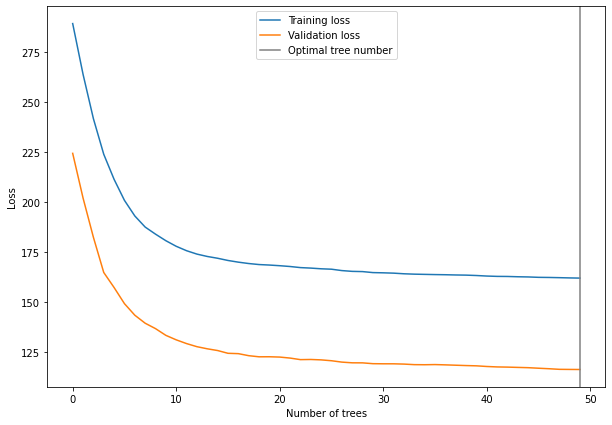

In [337]:
results = reg.evals_result()


plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["rmse"], label="Training loss")
plt.plot(results["validation_1"]["rmse"], label="Validation loss")
plt.axvline(reg.best_iteration, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

# Time Series CV

In [340]:
tss = TimeSeriesSplit(n_splits = 5)

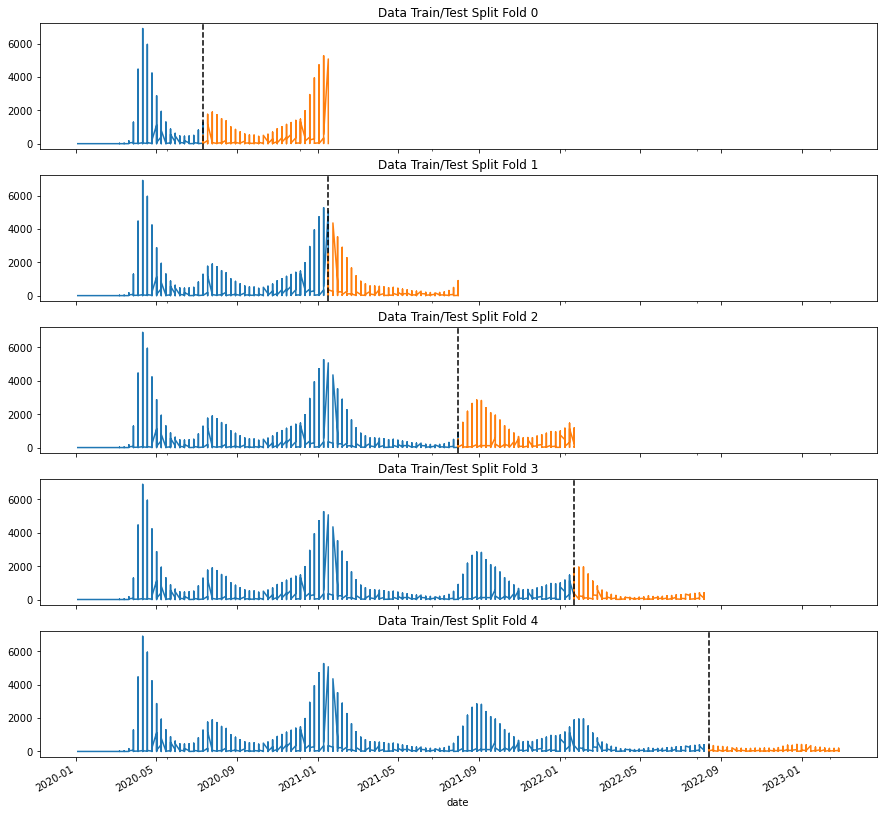

In [341]:
fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(data):
    train = data.iloc[train_idx]
    test = data.iloc[val_idx]
    train['covid_19_deaths'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['covid_19_deaths'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [342]:
fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(data):
    train = data.iloc[train_idx]
    test = data.iloc[val_idx]
    TARGET = 'covid_19_deaths'

    X_train = train.drop(['covid_19_deaths'], axis = 1)
    y_train = train[['covid_19_deaths']]

    X_test = test.drop(['covid_19_deaths'], axis = 1)
    y_test = test[['covid_19_deaths']]

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=20,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)  

[0]	validation_0-rmse:400.47755	validation_1-rmse:467.56947
[100]	validation_0-rmse:336.66564	validation_1-rmse:391.40366
[200]	validation_0-rmse:324.01021	validation_1-rmse:376.58979
[300]	validation_0-rmse:320.97785	validation_1-rmse:373.70374
[369]	validation_0-rmse:320.34354	validation_1-rmse:373.33388
[0]	validation_0-rmse:434.63077	validation_1-rmse:338.05224
[79]	validation_0-rmse:330.14794	validation_1-rmse:201.81401
[0]	validation_0-rmse:405.51816	validation_1-rmse:385.03517
[100]	validation_0-rmse:289.76845	validation_1-rmse:307.68624
[195]	validation_0-rmse:254.99453	validation_1-rmse:297.67891
[0]	validation_0-rmse:400.31489	validation_1-rmse:244.27953
[100]	validation_0-rmse:281.75358	validation_1-rmse:143.36156
[123]	validation_0-rmse:269.88964	validation_1-rmse:146.90565
[0]	validation_0-rmse:374.62556	validation_1-rmse:85.92687
[90]	validation_0-rmse:269.36105	validation_1-rmse:44.60441


In [343]:
# Retrain on all data
target = 'covid_19_deaths'

X_all = data.drop(['covid_19_deaths'], axis = 1)
y_all = data[['covid_19_deaths']]

reg = xgb.XGBRegressor(base_score=0.5,
                       booster='gbtree',    
                       n_estimators=500,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_all, y_all,
        eval_set=[(X_all, y_all)],
        verbose=100)

[0]	validation_0-rmse:343.82604
[100]	validation_0-rmse:241.53443
[200]	validation_0-rmse:210.73239
[300]	validation_0-rmse:196.67399
[400]	validation_0-rmse:187.22935
[499]	validation_0-rmse:181.27297


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [344]:
test['Prediction'] = reg.predict(X_test)
covid_deaths_all = pd.concat([test, train], sort=False)

In [345]:
model_mae = mean_absolute_error(test['covid_19_deaths'], test['Prediction'])
model_mase = MASE(test['covid_19_deaths'], test['Prediction'])
print('Test MAE: ', model_mae)
print('Test MASE: ', model_mase)

Test MAE:  18.735893503406935
Test MASE:  0.007944474736258774
